**Задание light:**

Для базы Fashion-Mnist:
1. Построить GAN c помощью глубоких полносвязных (сверточных) нейронных сетей. Добиться хорошего качества генерации изображений. Использовать различные архитектуры генератора и дискриминатора (количество слоев, фильтров в слоях, размеры ядер, слоев нормализации) для различных наборов гипермапараметров (оптимизатор, размер мини-выборки, количество эпох и т.д.). 
2. В отчете прислать примеры изображений, параметры сети.
 
**Задание pro:**

1. Для базы Cats&Dogs (или Cifar-10) построить condition GAN с хорошим качеством генерации изображений.

2. (опционно) Построить модель VAE+GAN с хорошим качеством генерации изображений.

#Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
#!mkdir images


  0%|          | 0/937 [00:00<?, ?it/s]

Epochs: 50
Batch size: 64
Batches per epoch: 937
--------------- Epoch 1 ---------------


100%|██████████| 937/937 [00:45<00:00, 20.52it/s]


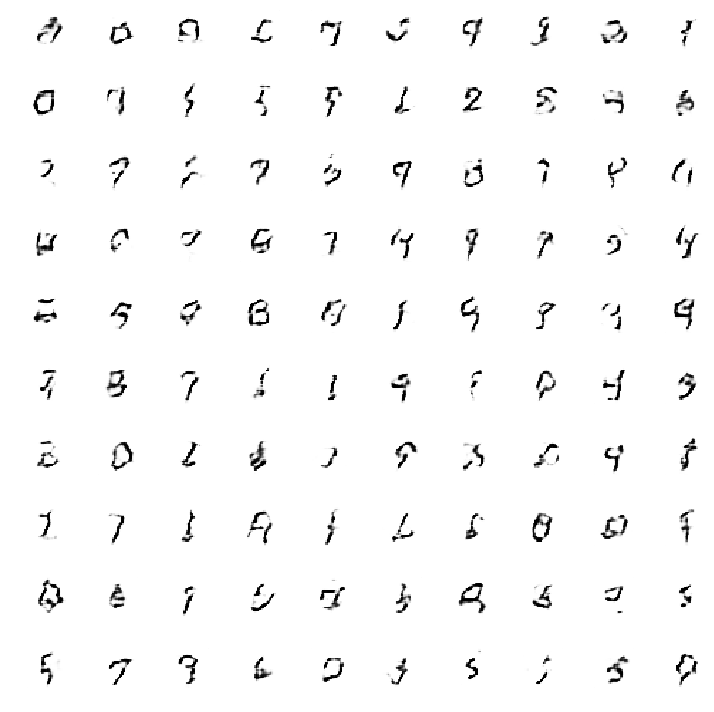

  0%|          | 2/937 [00:00<00:51, 18.15it/s]

--------------- Epoch 2 ---------------


  0%|          | 3/937 [00:00<00:38, 23.99it/s]

--------------- Epoch 3 ---------------


  0%|          | 3/937 [00:00<00:38, 24.32it/s]

--------------- Epoch 4 ---------------


  0%|          | 3/937 [00:00<00:45, 20.47it/s]

--------------- Epoch 5 ---------------


100%|██████████| 937/937 [00:44<00:00, 20.85it/s]


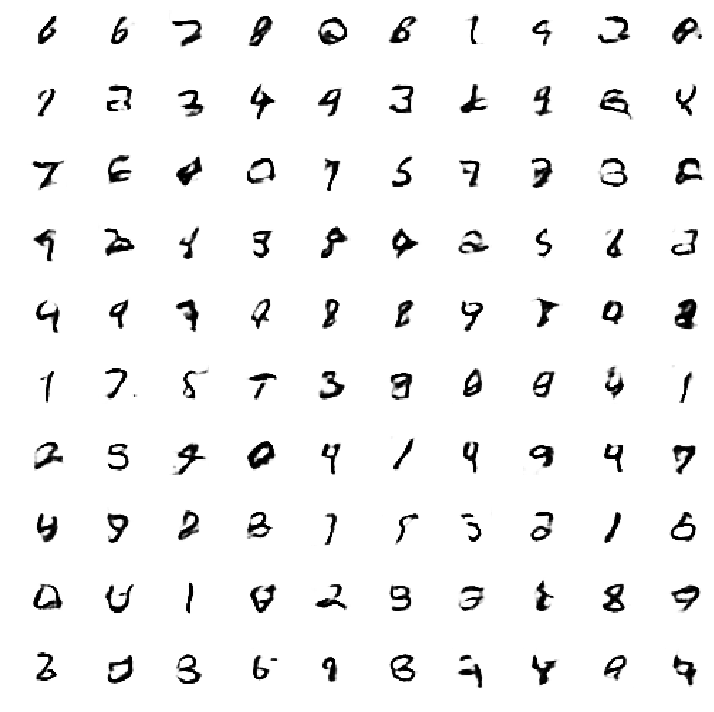

  0%|          | 2/937 [00:00<00:58, 15.99it/s]

--------------- Epoch 6 ---------------


  0%|          | 3/937 [00:00<00:39, 23.77it/s]

--------------- Epoch 7 ---------------


  0%|          | 3/937 [00:00<00:43, 21.33it/s]

--------------- Epoch 8 ---------------


  0%|          | 3/937 [00:00<00:45, 20.56it/s]

--------------- Epoch 9 ---------------


  0%|          | 1/937 [00:00<01:37,  9.63it/s]

--------------- Epoch 10 ---------------


100%|██████████| 937/937 [01:44<00:00,  8.93it/s]


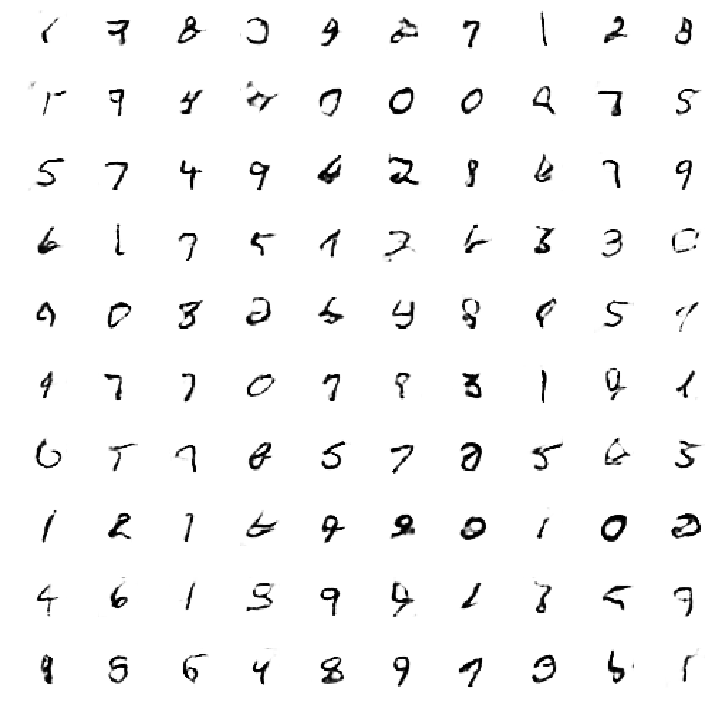

  0%|          | 0/937 [00:00<?, ?it/s]

--------------- Epoch 11 ---------------


  0%|          | 1/937 [00:00<01:50,  8.49it/s]

--------------- Epoch 12 ---------------


  0%|          | 2/937 [00:00<01:27, 10.71it/s]

--------------- Epoch 13 ---------------


  0%|          | 1/937 [00:00<02:14,  6.98it/s]

--------------- Epoch 14 ---------------


  0%|          | 2/937 [00:00<00:52, 17.65it/s]

--------------- Epoch 15 ---------------


100%|██████████| 937/937 [01:39<00:00,  9.41it/s]


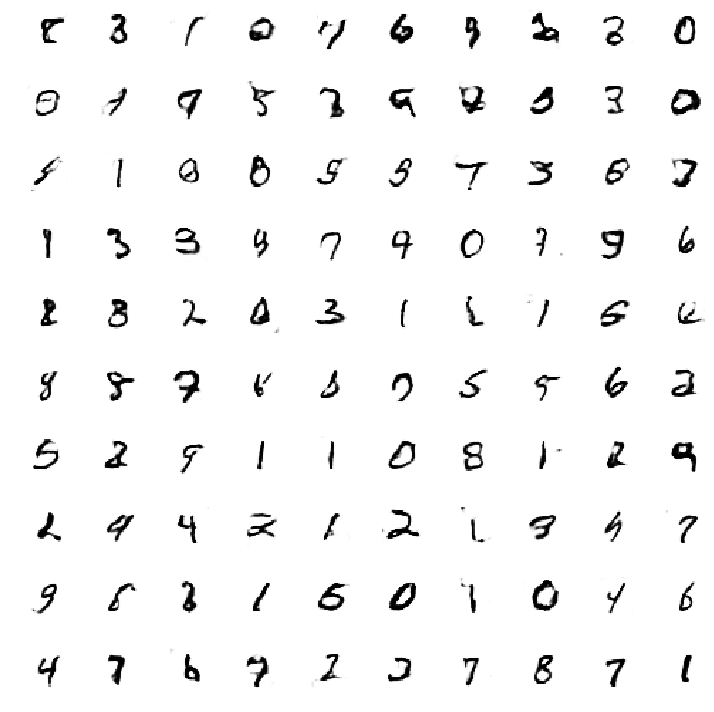

  0%|          | 1/937 [00:00<01:52,  8.32it/s]

--------------- Epoch 16 ---------------


  0%|          | 1/937 [00:00<01:39,  9.42it/s]

--------------- Epoch 17 ---------------


  0%|          | 0/937 [00:00<?, ?it/s]

--------------- Epoch 18 ---------------


  0%|          | 1/937 [00:00<01:39,  9.44it/s]

--------------- Epoch 19 ---------------


  0%|          | 1/937 [00:00<01:45,  8.90it/s]

--------------- Epoch 20 ---------------


100%|██████████| 937/937 [01:32<00:00, 10.13it/s]


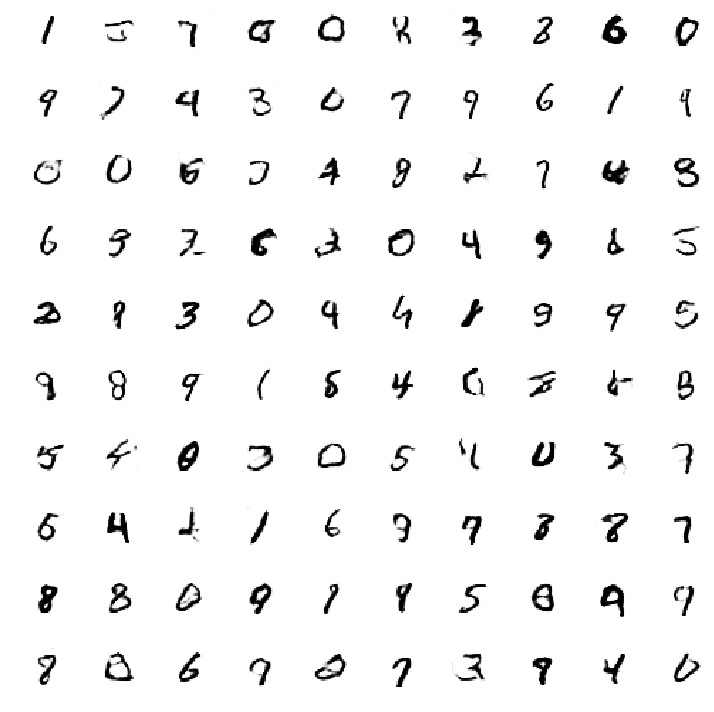

  0%|          | 1/937 [00:00<01:44,  8.95it/s]

--------------- Epoch 21 ---------------


  0%|          | 1/937 [00:00<01:59,  7.86it/s]

--------------- Epoch 22 ---------------


  0%|          | 1/937 [00:00<02:00,  7.76it/s]

--------------- Epoch 23 ---------------


  0%|          | 2/937 [00:00<00:55, 16.71it/s]

--------------- Epoch 24 ---------------


  0%|          | 1/937 [00:00<01:36,  9.74it/s]

--------------- Epoch 25 ---------------


100%|██████████| 937/937 [01:38<00:00,  9.49it/s]


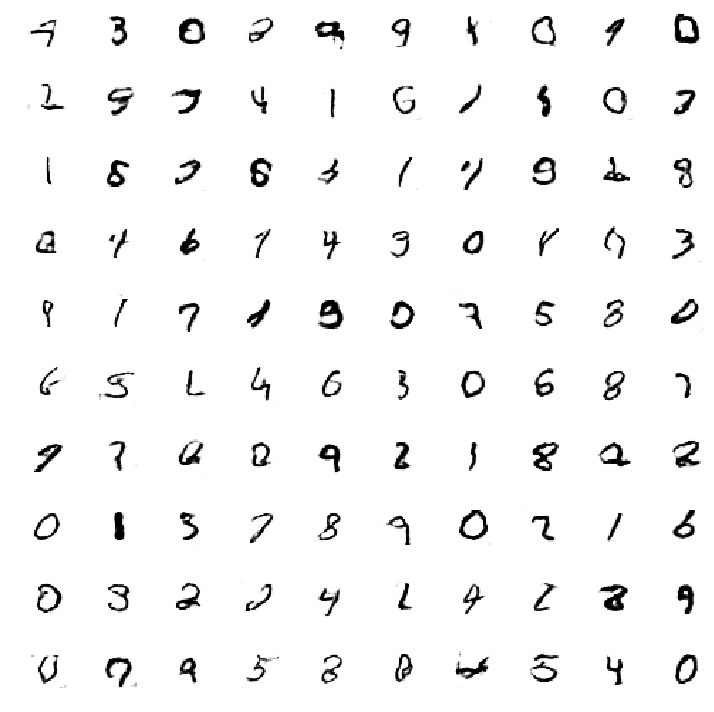

  0%|          | 1/937 [00:00<01:51,  8.39it/s]

--------------- Epoch 26 ---------------


  0%|          | 0/937 [00:00<?, ?it/s]

--------------- Epoch 27 ---------------


  0%|          | 1/937 [00:00<01:57,  7.98it/s]

--------------- Epoch 28 ---------------


  0%|          | 1/937 [00:00<01:56,  8.05it/s]

--------------- Epoch 29 ---------------


  0%|          | 1/937 [00:00<01:45,  8.89it/s]

--------------- Epoch 30 ---------------


100%|██████████| 937/937 [01:37<00:00,  8.81it/s]


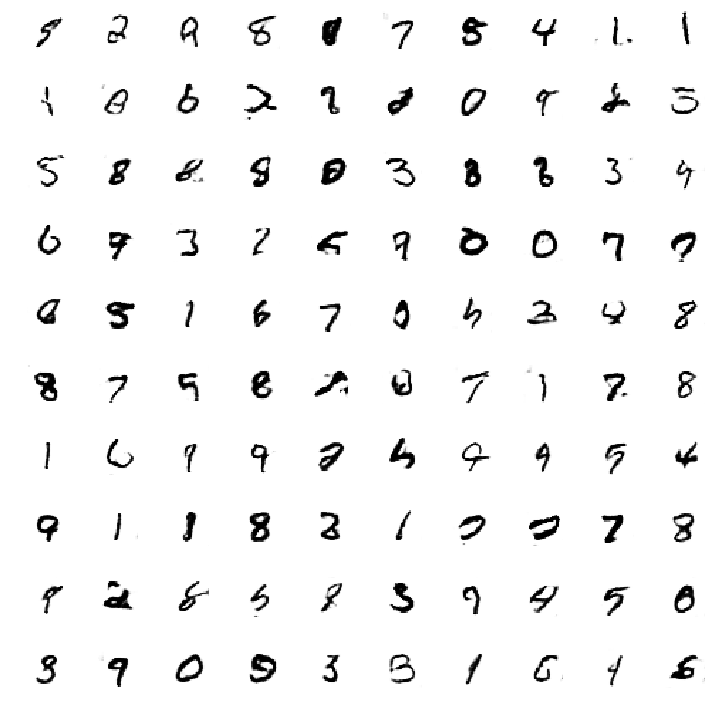

  0%|          | 1/937 [00:00<01:57,  7.97it/s]

--------------- Epoch 31 ---------------


  0%|          | 2/937 [00:00<01:26, 10.83it/s]

--------------- Epoch 32 ---------------


  0%|          | 1/937 [00:00<01:58,  7.92it/s]

--------------- Epoch 33 ---------------


  0%|          | 1/937 [00:00<01:44,  8.95it/s]

--------------- Epoch 34 ---------------


  0%|          | 1/937 [00:00<01:51,  8.37it/s]

--------------- Epoch 35 ---------------


100%|██████████| 937/937 [01:37<00:00,  7.29it/s]


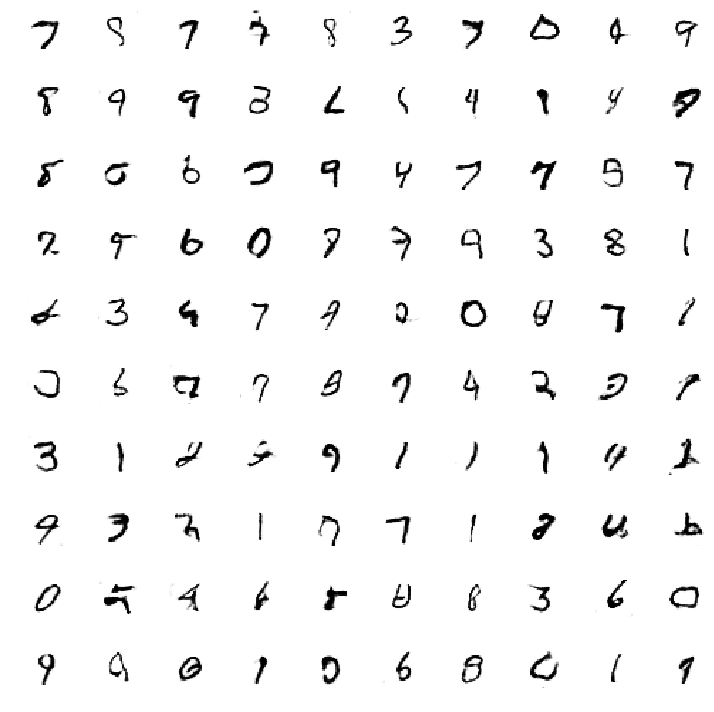

  0%|          | 2/937 [00:00<00:54, 17.06it/s]

--------------- Epoch 36 ---------------


  0%|          | 2/937 [00:00<01:27, 10.73it/s]

--------------- Epoch 37 ---------------


  0%|          | 2/937 [00:00<01:23, 11.17it/s]

--------------- Epoch 38 ---------------


  0%|          | 2/937 [00:00<01:23, 11.25it/s]

--------------- Epoch 39 ---------------


  0%|          | 2/937 [00:00<01:26, 10.77it/s]

--------------- Epoch 40 ---------------


100%|██████████| 937/937 [01:36<00:00,  9.73it/s]


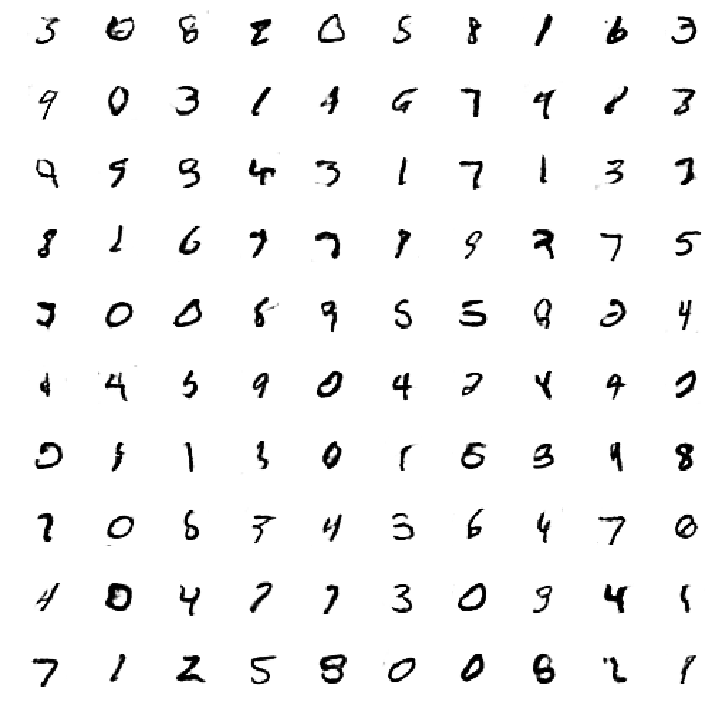

  0%|          | 1/937 [00:00<01:54,  8.15it/s]

--------------- Epoch 41 ---------------


  0%|          | 2/937 [00:00<01:24, 11.01it/s]

--------------- Epoch 42 ---------------


  0%|          | 1/937 [00:00<01:54,  8.19it/s]

--------------- Epoch 43 ---------------


  0%|          | 1/937 [00:00<01:34,  9.91it/s]

--------------- Epoch 44 ---------------


  0%|          | 1/937 [00:00<01:46,  8.82it/s]

--------------- Epoch 45 ---------------


100%|██████████| 937/937 [01:36<00:00,  8.96it/s]


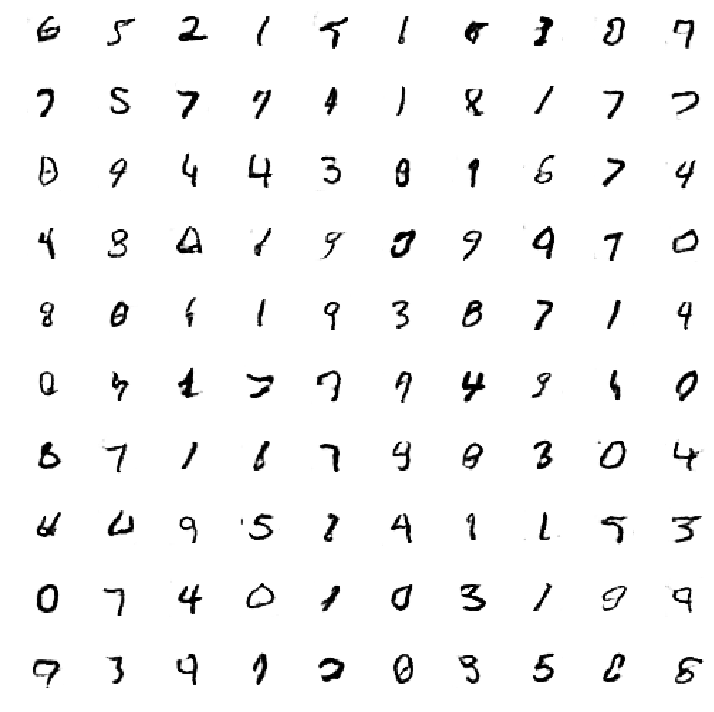

  0%|          | 1/937 [00:00<02:07,  7.34it/s]

--------------- Epoch 46 ---------------


  0%|          | 2/937 [00:00<01:26, 10.79it/s]

--------------- Epoch 47 ---------------


  0%|          | 1/937 [00:00<02:03,  7.57it/s]

--------------- Epoch 48 ---------------


  0%|          | 1/937 [00:00<01:56,  8.02it/s]

--------------- Epoch 49 ---------------


  0%|          | 1/937 [00:00<01:37,  9.58it/s]

--------------- Epoch 50 ---------------


100%|██████████| 937/937 [01:35<00:00,  9.76it/s]


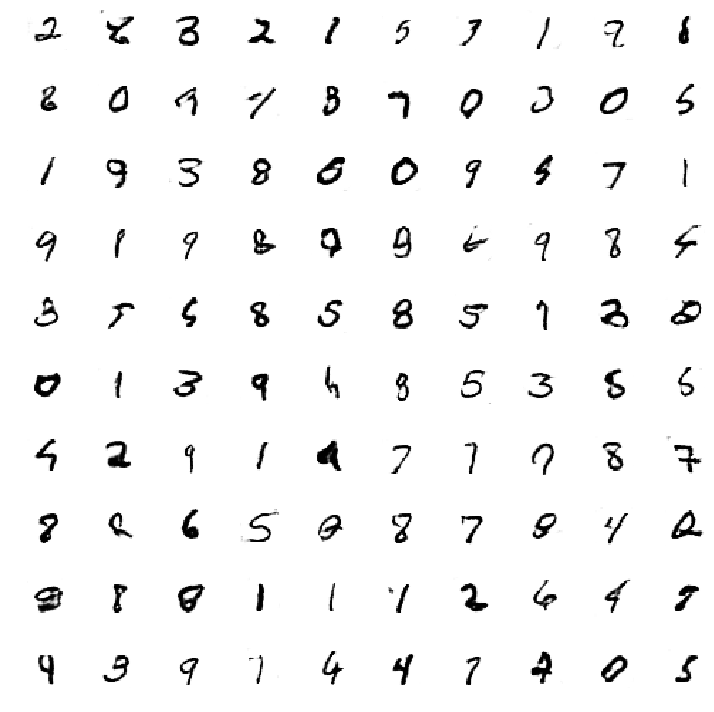

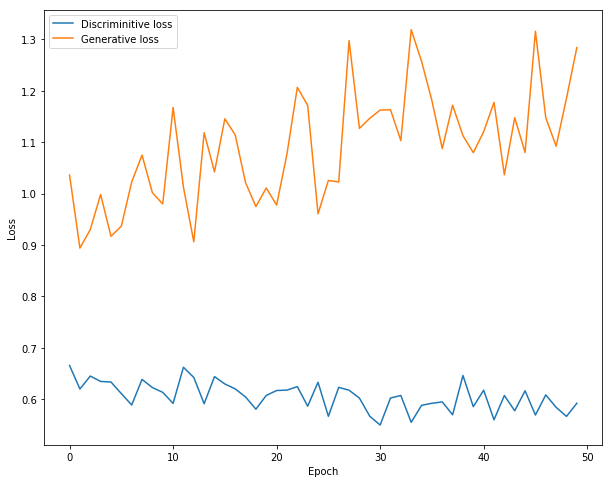

In [26]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers

K.set_image_dim_ordering('th')

np.random.seed(666)

randomDim = 100

# Load MNIST 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train[:, np.newaxis, :, :]

adam = Adam(lr=0.0002, beta_1=0.5)

# Generator
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Reshape((128, 7, 7)))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(64, kernel_size=(5, 5), padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(1, kernel_size=(5, 5), padding='same', activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer=adam)

# Discriminator
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', input_shape=(1, 28, 28), kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=(5, 5), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

# Combined network
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)

dLosses = []
gLosses = []

# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('images/dcgan_loss_epoch_%d.png' % epoch)

def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i, 0], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/dcgan_generated_image_epoch_%d.png' % epoch)
    plt.show()


def train(epochs=1, batchSize=128):
    batchCount = X_train.shape[0] // batchSize
    print ('Epochs:', epochs)
    print ('Batch size:', batchSize)
    print ('Batches per epoch:', batchCount)

    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(batchCount),position=0):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

            # Generate fake 
            generatedImages = generator.predict(noise)
            X = np.concatenate([imageBatch, generatedImages])

            # Labels for generated and real data
            yDis = np.zeros(2*batchSize)
            # One-sided label smoothing
            yDis[:batchSize] = 0.9

            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)

        if e == 1 or e % 5 == 0:
            plotGeneratedImages(e)

    # Plot losses from every epoch
    plotLoss(e)

train(50, 64)

#Вывод

In [28]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 64, 14, 14)        1664      
_________________________________________________________________
leaky_re_lu_79 (LeakyReLU)   (None, 64, 14, 14)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 64, 14, 14)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 128, 7, 7)         204928    
_________________________________________________________________
leaky_re_lu_80 (LeakyReLU)   (None, 128, 7, 7)         0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 128, 7, 7)         0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 6272)              0         
__________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [27]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_77 (LeakyReLU)   (None, 6272)              0         
_________________________________________________________________
reshape_20 (Reshape)         (None, 128, 7, 7)         0         
_________________________________________________________________
up_sampling2d_39 (UpSampling (None, 128, 14, 14)       0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 64, 14, 14)        204864    
_________________________________________________________________
leaky_re_lu_78 (LeakyReLU)   (None, 64, 14, 14)        0         
_________________________________________________________________
up_sampling2d_40 (UpSampling (None, 64, 28, 28)        0         
__________

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAsoAAALICAYAAABmXtZLAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzs3XmcjeX7wPHPObNbxpp9F9OUpCwt%0AWiQphVJSCiUl0ZevosVSligtX0WUhBCSIkohS1kiChVCssvYxozBrOc8vz+e3305hzPMMHNmzpnr%0A/Xp9X1/GLM/cPc/93Pd1X/d1OyzLQimllFJKKeXNmdcXoJRSSimlVH6kA2WllFJKKaV80IGyUkop%0ApZRSPuhAWSmllFJKKR90oKyUUkoppZQPOlBWSimllFLKBx0oK6WUUkop5YMOlJVSSimllPJBB8pK%0AKaWUUkr5EOrnn5ffjwF05OHPtlJSUgD4+OOPqVy5MgB33XUXhQoVysPLEnnaNnn4s7NC2yZz2jaZ%0A07bJXF61jbZL5rzaxu122x+0LJxOO+bmcOTl5eWftsmHtG0yd8G20YhyPuJyuXC5XOzevZtixYpR%0ArFix/DJIVgHOsiz5n3nBKaXUxXI6nTidThwOB263W/sVFbR0oKyUUkoppZQPDsvya1Q84EPwuUhS%0AL3bv3k1MTIx9QXm7lAXYke6QkBBduslcQLSNifi4XC7CwsJy7YLOEhBtk0e0bTKnqRe+6T2TOW2b%0AzGnbZO6CbaMDZW96M2UuqNrGDBrdbrfk15n/vwgB1TaWZflzAhZQbeNn2jaZ04Gyb3rPZE7bJnNB%0A2TbJycmEh4cDEBIScrHfRnOUlVJKKaWUuhj+rnqRayzL4vTp0wAkJiZSoUKFPL6i/Cs1NRWAP//8%0Akw0bNrBs2TIAatSoQa1atQDo0KHDpczQ8lxKSgpHjx4FYNasWWzYsAGAjIwMvv/+exITE+VzIyIi%0A5P9Xr14NQK1atQgNDZrHw4vD4cCsJKWnp0t0OTQ0NF+k+gSCjIwM9u/fD0DlypUD7llJS0uTSIzK%0AnEmHczgc0k8opfLOsmXLuPvuuwEIDw/n999/B6B69eq59v7ya+qF2+22zPL2/+e9XvT3siyLP/74%0Ag7vuuguAQ4cOef17t27dABg7dmx2Gi8olicsy+LkyZPExcUB9pLEnj17ALv0XNGiRQFYsWIF27dv%0A99qtHBkZCUBCQsLZL4Z83TaWZZGWlsbEiRMBePvttzlw4ABgD2qyuiM7KioKgLVr11KnTp2sXl++%0AbhtfMjIyANiyZQvFixcH7NSTihUr5nRnE3Btcz4///wzAHfccYcMokJDQ3nttdcAGDBgQHa+XZ61%0AjWdfnE/li9QLE3wJCQnJLwPloHqeDJfLRatWrQA7YPPBBx9czLfJs7axLMvK50GGgL5vzDh1x44d%0A1K1bV/resmXLsnjxYgCuuuqqi313aeqFUkoppZRSF8Pva8tmZuC5/JudWcCpU6cAOzVg3rx5mUYK%0A58yZA8CQIUO47LLLLuWSA45lWYSGhlKsWDHAbjMTUY6KipJI6d69e9mxY4dXG15xxRUA+SV6ckEm%0AheLdd99lypQp7Nu3D8DrdwoPD5dl5oyMDCpXrkz58uUBO4pavXp1AD777DOSk5MB6NevH/PmzfPb%0A7+FPycnJ8nwMGjRIossPPvgg//nPf6hUqZJ8rmnHYE1Dya5vv/0WOBORN39+++23AXj55ZcDoq1y%0AI5ps7hWn05lXFVZy3KXUsU9LS+P48eOsXbsWgIMHD3L48GHAvo9Mu8yfP5/o6OhLv9gAtmTJEkkB%0ANNFCpYxVq1YB0L59e1JSUqT/uuuuu0hLSwNyt0KYX3t0z1/kYjrq9PR0OnToAMDXX3/t9T2bNGnC%0ADTfcAMD48eM5fvw4YOendu/e/ZKuO7/YtWsXoaGhVKxYEci8DZ1OJ1FRUZJGYFmWtEfhwoVlsrFh%0AwwZcLpe0YatWrZg9e3Zu/xo5JiMjg/bt2wP27xIfHy/pPOHh4dx///0AfPTRRzLwDw0Nxel0ysP1%0A559/Sjt98803kte8bt06MjIyAmLQk11hYWGSpx4XFyd/njhxIuvWrZOJw/Lly0lPTwfs52v8+PFA%0A4EyicprnoQpRUVGcPHkSsJ8v0075fPk1V7jdbk6fPs327dsB6Ny5MwcPHgSgSJEidO7cGYCBAwfm%0A2TX6S3p6uqQQ7N69m+PHj5OQkCD/5ivVsVatWuekDhYUph8eN26c/Nm0XyC5mOfesiyZcB87doyF%0ACxcC8PvvvzNp0iSZMJQrV07eQ7Vq1ZIgR0Hph91utwQiTDppmTJlAOjRowf16tXL9Wvw6yjA5XLJ%0Ai8YzP/lCucrmJfTmm296RfmKFi1Ky5YtARg1ahSlSpUCoFOnTlx33XUAAR3NONt1111HZGSkvJBM%0ArvGFeEbvN2zYIPlfJ0+epGjRonTs2BGAwYMHB9SmJLfbTe3atQEoXrw4d999Nw899BBg51qfr/My%0AudixsbGMHj0agKNHj8rXxMbGBlRbZEdoaCj33HMPYEdAk5KSAIiPj2f58uWsWLEC8I7KT506VSI+%0Aw4YNo1OnTn6+6vyhS5cuAJw4cYKpU6cC9su+cePGQO5EavMr06esW7eOnj178scff8i/mUnqO++8%0AU6A2Vs+ePZuffvoJsO8Lt9stA5rSpUvLYDApKUmer9atW+fNxeYDZgVvx44dEr2/8sor8/KScp1Z%0ABW3VqhUrV64EvEt2hoaGypgH7AmXsWPHDtlTcuLEiaAa32QmMTGRjRs3AmdW8szetLp16/qlzy04%0AvbpSSimllFLZ4NeIstvtlmWo6OhomUFdKHJndh6PHTtWohiNGjVi+fLlMqPynFUUKVJEvufOnTtz%0A9pfIA2Z2adpu0qRJAPTs2TNLX3/69Gl69eoF2NUczPcrX7488+fPp1q1agCUKFEiJy8714WHh9Ov%0AXz/AXoYyOdnZNXnyZPmziX516NAhqJfRzdLV0KFDee6554AzS8OZVcIxVUS+//77AhlR3r9/P598%0A8gkAM2bMkBSmQoUK0a5dO6DgpF5YlsWOHTsAeOqpp9i2bZvktk+ePFnS4ApCxMtToUKFqFKlCmCv%0AWpUtW5bXX38dsPuoNm3aAHYk1eyTeOutt/LmYvMBswqxe/dueWfXqFEjLy8pV7ndblkV37VrF+XK%0AlQPgscce49FHHwXs8VBKSorcN6tWrZI2Wb9+vaRkzJ8/X1Zugtlvv/0mpTjB7mNNJoFZGc5tfh0o%0Ah4aGymAsOx2o2YhVu3ZtBg8eDEDXrl0z/fxevXpJiN5sTgtknjV/Afr06QPYGyB69+4NQP369SlS%0ApAhwplTa1q1bAbjppptkicvhcFC2bFkARo8eTe3atSlcuLBffo/cULp0aSD7S95m8tW1a1e2bdsm%0AH3/mmWcAeOSRR3LoCvMnM6Dr2rWrpN6cPHmSF154gS+++AI4U2/7bLGxsf65yHzE7XYzadIkvvnm%0AG8CetJp7rmHDhtKGBcVff/3F448/DtjLwc8++yzDhg0DzpRYLIhatmxJs2bNAPsZi4uLkwlFhw4d%0AJBfZ4XBwxx13AAW3vSzLknd7amqq7I24lA2U+d28efMYOnQoAF9++SWNGjUCfE+w586dC9gBDDOJ%0AuPPOOyUFbuzYsQVioBwXF+eVBhgRESHPjr9o6oVSSimllFI++DWibCKdkL1TwMyM22ySON/3B/tQ%0AADMrDYaNEmbznim7ZFIn5s2b57W50USUGzVqRKVKlaSCRXJysrThxx9/zL333gvYG+ACfak4q5Fk%0As8KQmJjIkiVLmDVrFgBfffWVfE7x4sUlnSWYoxpnM/dGVFQUU6ZMYciQIQAsWLBA0nxMiSvw3lxS%0AUMyZM4dx48Zx7NgxwL7vTFRjzpw5flsCzGum0sdLL70kJ2LVr1+fQYMGySrh7t27mTlzJgB9+/Yt%0AUOkXDofDq9rQP//8I2k5pvIQ2IcjvPHGG4D/lo/zG4fDIe8yy7LkVNhgrDQEyLvbvJcvdKCVeTc7%0AnU5ZAd2yZYtsDr399ttz8WrzjwYNGnj9PSMjQ9rDX+mifr0jnU6ndJq5MUAztYITExN58MEHgcDL%0Au/XF5Pt16tSJzz//PNM6k+Yl9uOPPxIWFiadUOnSpWU5vXHjxgXm6FqT/9azZ0/WrFkDnKkA4plW%0AYDrorVu3FqiqBZkxOetNmzZl2rRp8nFz35j7sSAwk++ffvqJI0eOyIQrKipKJlWBnLqUXaZCyoIF%0AC6QPv/baa/noo4+kj9m5c6c8X9u2bfPaA1AQmGXin3/+mXbt2nkNkM37b8SIEQWuvv/ZLMuSIJBl%0AWVLtIhje2b44HA5atGghAa2scrlcTJgwAbDLyD355JMAvPjiizl+jflRuXLlZDKZkpJCRkaGVB+a%0ANWtWlqt/XQodFSillFJKKeWD3w8cya1lOMuypLaey+Vi5MiRufJz8oKJco4aNYoHH3yQvn37ArBv%0A3z5cLhdwpmYn2BGNtLQ0maEvXbpUqhwUFLfddpvUqMzs9EbDpBVoNNnbzp072bx5s/zd1CYPhnSm%0ArFqyZAkAK1euJCMjQ5bVlyxZwo033piXl5YnTKpSRkaGrDx06tSJwoULc/XVVwP2Lv333nsPgC++%0A+IKJEycCF65uFCy2bNkC2NGus993pmrKXXfdFfBpb5fKsizi4+MBO92iSZMm8udgZFlWttJszGrW%0AwYMHGTRoEGCPbVq0aAEUnOfJHP7lyaThjh8/nv/+979A7r6//V4ezgzscnrA7HlMs9PpDMrlUHPA%0AipkQfPnll8yfPx+wj0T1rI4RExPD999/D1CgBskm3WL58uVZ/pqaNWsCcMcddzB9+nQgeDvrrDD7%0ACJYsWeK1bGyWik2lkYLghRdeALz3CQCsWLGiQA6UTWULQHbvm1QcM1Bu1qwZX375JWCX1DP3U0Gp%0A7mBKTJrSlaNGjQLsQJHJtywog5zzOXnypOTrFi9eXNotWCcQbrebU6dOZbmM6a5duwA7Be7EiROA%0A/V5v2rRprl1jfmIqdQ0fPvycgbKZcFSqVMkv94vfN/OZXzinBspm1rVixQoZhBcpUiTb39/zZJz8%0AzvxurVu3Zt26dYB3CbnQ0FDmzZsndU0LEtOheOZoe4qMjKRevXpep4qZqMasWbNk8PPf//43YO6H%0AnPbdd98BSFQQ7Hvq2WeflT8XBJMnT+aff/4B7Nw4h8Mhx+s+9thjeXlpeebaa68F7BrsHTp08Pk5%0ABw8e5MiRI4CdX1hQjto1SpYsCdhRd8+jqYsVKya1kws6t9vNlClTpIRply5diImJAYJ3oOxwOHj7%0A7belPGvXrl1l34fn2GjPnj0kJSXJO/3gwYPyDP30009ER0fnwdX7n9nb4CvoZdpm4cKFchpvbtK1%0AZqWUUkoppXzwe46yrxwdl8slkUDLsihWrJjklaalpcm/RUREyI5Rt9vN6dOnZfY5bdo0yaGcO3du%0AlqNeJgqdmpoaMCXBTNv8/fffTJ069Zx/f+WVV6hatWrQzszP59dffwW8o56FCxeWnPUWLVp47Tbf%0Atm0b9evXB+ylnuHDhwNw//33SwH8gsKyLAYNGiQnQnnmdr/22muS8lNQfPLJJ1KGCOySgeb+qFix%0AYl5dVp4yKRXn6yu///57qczTunXrApv773K5WLp0qUQNJ0yYELQVHbLrxIkTvP7665KW8/jjjwf9%0AykNISAiRkZG8+uqrgF21woyHIiMjJaXtnnvuoWPHjkyZMgWw++EBAwYA9mq5WQ0N5ve7y+Vi7Nix%0AgO89RqYNwsPDgy/1Anz/x3U4HPz222+APchLTU2V09I8l88LFy5M27ZtAfsI7EOHDvHjjz8CcPjw%0AYRkALVy4UEqGfPLJJ6xYsUIatkqVKlLyqk6dOjKgCpRBMsDXX38NQLdu3Th69Kh8/KqrrgLg1Vdf%0AJSQkpEA8UJ7S0tJk4lC2bFnq1q0LwLhx4+So0LPFxMQwbtw4wD6Vz3TcGzZsKDAD5Q0bNgDQu3fv%0Ac2qVm1qdr7zySoG6j4BzjvOOiooqkOlMns7XT5ql40WLFsmA0OTpFiTmnnn33XdJSkqicePGALJZ%0ArSAzbbN27VqOHTsmQYratWvn5WX5Td++fbnpppsA+PDDD6WMbYsWLWRfldPpJDExUWr9O51OSfmK%0AiIgI6n7Y3B979uzh77//Puffq1atSlxcnHyev56pgjnVV0oppZRS6gL8fuBIZj799FMANm7cSKlS%0ApWSZt27dupK8npaWJjtGx48fz+bNm73C8ocPHwbgiSeeOOf7m1lYlSpVuOaaay54PfmV2+2mR48e%0AALJhBuylm88++ww4k3ZgNkq89tpr8nlOp1OW1k21h2Axe/Zs+W86efJkrrjiCuD8VT+cTqfca2Fh%0AYZLmM3HiRO6///6AvEcuxOVy8e677wJ2VGPv3r2A7yUuc1DLxo0bZSNXMLaJJ/O8rF69Wj5WtmxZ%0Ali5dWqBOmcuOuLg4WVJetmwZHTt2BApWxR2wI2JjxowB7KogVapU4fPPPwfObPIryExf89xzz+Fw%0AOCQlrqA8VxEREVK14nzVK3788Uep+nD99dfL6mZBqZaSlJTkdbCaSct577336Nixoxxo5K90nXyx%0Afd3pdMpxjtOmTSMhIUGWGm644QY5NrZz584cOHAAsFMyHA6H5CzHxsZKR/3tt9+yatUqAGbMmMHl%0Al18uDRroyxb79u0jISFB/m5+n+uvv1465NjYWCIiIqTe8vz586WdUlJSWLhwIQBvvfUWnTt3DoqH%0A7+TJk7z66qvyYq5evXqWT74yZavMkjvY+d8ulytoBoW7d+/m+uuvB85MKLPCdNYNGjSQVJYVK1ZQ%0ApEiRoGkbT5ZlyQTTc+JQvnx5KleunFeXlW+Yl5fnXpOMjAz+97//sWLFCgDGjBnDI488AgR+f5tV%0Apu948803GT16NGCXUZw2bVqBmyxkxuVy8c033wB22cDmzZvLvqKCcp9kxenTp+ndu7dMHmbNmpXl%0AknKBztwHO3fu9Pq4SUtZs2aNnEAMsHjxYu6///5cv67ge9MppZRSSimVAxyem1X8INMfZg6KqFev%0AHmFhYbKrvE6dOlIr+PDhw5LEHRkZyYcffij1THOotmteTmuz9B8iIyOD999/H7A3ynj+9zObaRo2%0AbMisWbPo378/YFcBMbUbExISJFIWHR3N9OnT5cCAC8zq83XbbNiwgSZNmkjEq0yZMvzwww+AvWEv%0As9/Nsiw5fe6WW26RaH2JEiU4cuRIVqPt+bpttm/fTqNGjbxqbZ+PaSuHw+EzHSMyMpJq1apJVLF9%0A+/Y8//zzgM/nMF+3zdlOnz5NqVKlALyW/qKjo/n222+55ZZbcu7qAqxtTp06xZw5cwD7cB5zbzz2%0A2GP88ssv0t+8/PLLOdEf51XbZLtd3G63nMZ36623SruMHTuWRx55JMdWXtxuN06nM6DuGU+JiYlS%0Ap/7ff/9l/fr11KhRI0cu7P8FbNt4WrJkCc2bN5cVvN9++y0n7qGAapvff/+devXqyd9NcYbY2Fg5%0ASRegVq1aUvjhElYlLviF+SL1As7spo6JiSE5OVmWso4cOSI3zODBgyVP0l9lQfKb0NBQGZR06NCB%0Ab7/9FrDzKk1aytq1a6latarX15nlikKFCknbJiQksHDhQho1agQEdv5T0aJFiYyMlBzj/fv30759%0Ae8C+b/bv3w9Aq1atiIqKkpSCRYsWMXfuXODMYSVgH4Ed6KkFJu+/V69eXstVmencuTOjRo2SSjO/%0A/fYbzZs3B/CakKWkpEh6Atj5hU899RQQ+HmYISEhkv/mKT09nZUrV+b0QDmgxMfH8+KLLwJw7Ngx%0AuScKFSrE0KFDpV8K9Ocmq8xz8tdff0nOf2RkJEOGDAHg4YcfztG2CNT3nblPFi1aJP3GPffck2kl%0AooJu48aNWJbFc889BxSc58lT9erVpaxiWloaSUlJAF6DZLBTAv3xXOSbiLKZhZ88eZKMjAwZtFSq%0AVMmfJ4EF1KwLzkSRPTfQHD9+3Cvf1pM5/QjsPKCKFSuyYMGCc/7Nh3zfNl999RWPPvooYD9cpoMJ%0ADQ31ag+Hw+H1cJlnwLIsyWXftWtXdk7Rypdts379egBGjBjB4sWLZbAcFhYmz1vx4sXlhLU333zz%0AnE558eLFgP1i8yzV6HA4pK3uvvtuKfPUr1+/s79Hvmyb8zE5654RZYB7771X6gj7qgd/EQKqbb7/%0A/nvuvfde+4stS+q+btq0iTJlyuT0CytfR5SPHj0qq5kbN26Ue/6ll16iW7duQI7dI2cLqHsG7Ogx%0A2PuN9u3bB8CqVau44YYbLnkQaM5B+P8gT8C1jSfzuzRr1oyffvqJHTt2AORU1D2g2sayLCmjZzaU%0AezIBmYkTJ3Lfffdd4uVduG0K3lRFKaWUUkqpLMg3qRdmZmlKwQX6Eq6/mGj7nXfeSVxcnHz8t99+%0Ak5QKt9st0Z4HHnhAUln69OnDLbfcck6aRqBq3bo1Tz/9NGBXO4mPjwc4J7p+9kESRmRkJMOGDQMI%0AimVBk6Y0c+ZMLMuSiIXD4ZD0AqfTed7IV7NmzQDvdIuFCxeyb98+2bHeokULSdsJhmXC9957D7BT%0AVsy9ExISwksvvSTLgQXR7Nmz5c/FixeXfSVm/0OwM9WXTp8+zeOPPy6VlcLDw6U0Z6tWrYLiGchJ%0A5uCIgwcPSvWCBg0aXHI7efZpgZw2aBw6dAg4k3rheSqoJ5M2uH37dq644oqgPNHQ4XDIYXL9+vWT%0AU/qioqJ49dVXpSqav0rc5pvUi3wioJYnLvkHWlZ2lksDom3MwGbt2rWMGjUKsF9k5gTDVatWcfr0%0AaemkixcvLnVzn3zyyYs9oTEg2uaSf9D/9xVutxvLsuTlFMibQPNYQLWNGZSAXwYmeZ56YVmWpBul%0Ap6fL5mCXy8VHH33E8uXLAXvD+S+//ALk2Kby8wmoe8btdkta1saNG+UktWXLll30RZj7cP/+/bLp%0A///bPaDa5my7du0C7BN2U1JSZI9Ju3btJA1s4sSJUn6watWqfPzxx9SqVQvQfvgSaOqFUkoppZRS%0AF0Mjyt501pU5bZvMadtkTtsmc9o2mcvziHI+FVD3TEJCgpRbdLvdUn3IRIKz/IM9VrNMimGxYsXk%0AIK3/F1BtczaTDte+fXtWrVolm0WvueYaZsyYAdgn9pmThRctWpSdg0gCum1y2QXbRgfK3vRmypy2%0ATea0bTKnbZM5bZvM6UDZt4C6Z3bv3i1VGyIjIyUFLjspbqdOnZJUOc9SYRUrVjw73SCg2uZsphJR%0AfHw8lmVRokQJwN73YcZpDofjYnO7A7ptcpmmXiillFJKKXUxCnxE2WwMSE1NpVChQjrrypy2Tea0%0AbTKnbZO5At02F9hMrBFl3wrcPeNZpciyLImo+rh3ClzbZIO2TebyXeqFUkoppZRSAUFTL5RSSiml%0AlPJBB8pKKaWUUkr5oANlpZRSSimlfNCBslJKKaWUUj7oQFkppZRSSikfdKCslFJKKaWUDzpQVkop%0ApZRSygcdKCullFJKKeWDDpSVUkoppZTyQQfKSimllFJK+aADZaWUUkoppXzQgbJSSimllFI+6EBZ%0AKaWUUkopH3SgrJRSSimllA86UFZKKaWUUsoHHSgrpZRSSinlgw6UlVJKKaWU8kEHykoppZRSSvmg%0AA2WllFJKKaV80IGyUkoppZRSPuhAWSmllFJKKR90oKyUUkoppZQPOlBWSimllFLKBx0oK6WUUkop%0A5YMOlJVSSimllPJBB8pKKaWUUkr5oANlpZRSSimlfNCBslJKKaWUUj7oQFkppZRSSikfdKCslFJK%0AKaWUD6F+/nmWn39edjny8Gdr22RO2yZz2jaZ07bJnOV2u89ciMPh9f/5QF5diN4zmdO2yZy2TeYC%0Avm00oqyUUkoppZQPOlBWSqkCyOl04nQ6cTgc8j+llAokycnJJCcns3LlSlJSUkhJScnxn+Hv1Itc%0A43a7+ffffwEoVaoUUVFReXxF2eN2u3E6dd6iVH5iWWdWDZOTkwkJCQEgIiIiry4px+kAWfmLSfex%0ALIuUlBS59woVKpSXl6UCjBkM79y5k0ceeQSAP//8k2LFigFw5MgRwsLCcuzn6chMKaWUUkopHwJ6%0AoJyRkcHBgwc5ePAg/fr1IzY2ltjYWIoUKcKrr77Kq6++6hURys9yI5qclpZGWloar7/+OhEREURE%0AROBwOGTJNTU1Ncd/pvIvl8uFZVlYloXb7ZZlKJfLldeXFrBcLhcul4v27dtTqFAhChUqRMmSJSla%0AtKj8/T//+Q+pqamkpqYGTB+jVF7Yt28f+/btY8GCBbz00ku89NJLFCtWjOLFi1O4cGEKFy6M0+mk%0AUqVKVKpUiV9//TWvL1nlY263my1btrBlyxaeeeYZtm/fzvbt2wEk9WL37t14bla+VA4/d/KX9MMs%0Ay+L06dMAfPvtt0yfPp2TJ08C0Lp1a5YtWwbAN998Q+nSpQHYvHmz/DkLgmZn6NKlSxkwYAAA69at%0AIyMjQ/4tPDwcgKNHj1K0aNGsfsugaRtPaWlpXH311fLnbdu2AWfaKIvyRdtYliWTn8jIyFz/wXv2%0A7AGgb9++DB06FICYmJizPy1ftE12xMXFAVC1alXS0tIAKFasGE6nk+PHj8vnXXHFFQAMHDiQRx99%0A9GJ+VMC1jR9p1QvfAu6e+fTTTwHo3bs3iYmJ9jeyLBwOh89J5tVXX82ECRMAaNiwYXZ+VMC1TVbs%0A3LmTn3/+GYBZs2bJGGjz5s0kJCTI+Oaff/45X7pBULSNZVns2LGDe++9F/D+nZ9//nn69+8P2Kk8%0AnumsJpgESPqcB616oZRSSiml1MUIiM18Jhr6zTffMHjwYABOnTpF3bp1ee+99wCIjY2lVatWACxY%0AsEC+Jj4+PjsR5YBmlhpWrlxJly5d2Lt3r3y8cOHCAJQpU0ZmVomJidmJKAeF9PR0/v33X+6++24A%0AduzYIRtKKlasKBHDsmXL5tk1XiyHw+G3TWYZGRn89ttvAHz99dd8//33ACQlJfnl5+em9PR0wE6H%0ACg21u8h33nmH1q1bSx+zdu1atm7dCsCAAQNo3bo1AEWKFMmDK1b5iVlpadmyJdu3b5f7qUSJEnTv%0A3h2Ajh07UqtWLSD4N1OajXrlYHPQAAAgAElEQVSFCxeWFafOnTvTpEkT/vrrLwBGjhzJ77//DsDW%0ArVsZOHAgAHPnzg2qjbNZ5XK5ZGwzYsQIjh07BnhHRo19+/YB9ip7mzZt/HuhfrZ06VK6dOnCwYMH%0AAahSpQrvv/8+YD9vnimsnpHjS33GAmKgbJYdunfvLgOZ2NhYhg0bxuWXXw7YDbFmzRrAvsnMA1mx%0AYsU8uGL/S0tL45lnngHsicKhQ4fkgSpbtizz5s0DYOLEiXz22WcAjB49mhEjRuTNBfuR2+2WFJ0J%0AEybwyiuvSIqC0+mUyULZsmX9krKQm/zx0k1NTWX37t28/vrrgD1orlq1aq7/XH/xlbsfGhpKqVKl%0AmDlzJgA1a9aUiem+ffukj7rzzjuDfuADdh/7559/AvbLq1evXr6WNAuc3bt389xzzwH20rjnoCY+%0APp5hw4YB8Mknn0i60iOPPBLUE6x27doB8NBDD53zbJj3dKtWraQ9hg4dSnJyMkCO5pkGiuPHj9O9%0Ae3e+/PJLAK+0yfPp3bs39913H5A7e57ykkmB+/TTTzl06BD16tUDYP78+X4JhAbEQNmIjIykRIkS%0AALzwwgtUr15dbojDhw8zZMgQAKKjo3nnnXeA4C87YzqSIUOGyEs8JSUFy7Ikz/bzzz+nTp06gJ1/%0AaTqhr7/+OqgHyqaDWb58OT169ADsQY3nLDQ2NpZvv/0WsDuX6OjovLnYPHTixAkAtmzZQs2aNWXi%0AEB4e7pXjZe61LVu28PDDD3Po0CHAztXduHFjHlx57jAlhsLCwqQM0R133EFISAjVqlUDoEuXLpJ7%0AGRkZKfnKwTRIdrlczJgxg6+++gqw94FUqFABsFetpk6dCtire9u2bZO+JDo6Ouhe1BdiNqB17NhR%0AVhrALiNonpv09HQZOMfFxcmA+ocffmDChAlBPViG8z8bISEhEvQC5D1vVnSClVmVO3jwoOyPGTly%0AJAcOHMj0a0w7RkREeNUMLlSoUFA+d3v27JFMgoULF3LDDTdIDru/sgWCr1WVUkoppZTKAQExXatR%0AowZg5ziVK1cOgPr162NZFocPHwaga9euslu9RYsWUskgmCI8vkyfPh2AqVOnSgQ1OjqaChUqcPPN%0ANwN2WxlJSUkS4di7dy8ulysol0wTEhL48ccfAejWrZtE0bt06cIbb7whB9IkJSVJBKhdu3ZBf78Y%0A5h7YunWr5E3u2bOHW2+9VXYOV61aVVYlkpOTWbt2LQDPPfcchw4d4rHHHgPg9ddfz26VkHytVKlS%0AAFx//fWsWLECsNumcuXKJCQkAGeeO4C2bdsGZE67L3/++aekVIwYMYJNmzbJvWLSt8CO9Jk0pZMn%0AT/Lxxx9LROy2226TSNegQYMC7vCn7Dp48CAdO3YE8IomlytXjrZt28oqxOLFi1m1ahVg9zsmxWfe%0AvHn8/fffspxcUPqgs5nqBW63W3JyXS5Xjh4ckZ8sW7ZM0k1Wrlwpuexni4qKolKlSgCULFmSt956%0AC4AGDRrQqFEjNm/eDATf/gjT70yfPp3Zs2cDUL16dcaNGydjQn8JiIFy8eLFAXv50+QcHzt2jKSk%0AJMmTXLx4MY0aNQLgf//7X4HYpLZhwwZ69eoF2PlvZrDy4osv0r59e6pUqQJ4J7V/+OGHXHXVVYC9%0AnJ6enh40A2XLsvjmm28AO1/LnNQYGRkp5bueffZZLMvip59+AuzcOJP/ZJZCg5UZvDRs2FDaJikp%0ASSZYoaGh/Pzzz/ICDw8Pl5e2y+Vi7NixgD1oLFWqFB06dADszjuYmOXx6tWrs3LlSsDue5xOp9dS%0Apxkojh49OuA3HJl7oH79+pm+sC3Lkr4iPDxc2sm80MwztWrVKtmodtVVV8l9EmzLwvHx8QA88cQT%0AXgPk2rVrAzBmzBhuu+02SR/o2bOnTCYGDBjA3LlzAfu5nDRpkqQLBtOkMztMOzmdTkl/Cra2sCyL%0Axx9/HLBTbkz6mmcue1hYGOXLl6dy5cqAvZE4NjYWsAfNnhMK048DnD59Wp7FYHjW1q9fD8Cbb74p%0A76SRI0dSs2ZNv19L4LemUkoppZRSuSAgIsomctO3b18pQ/Xaa68RHx/P33//DdiJ7dOmTQMCs7RX%0AdpjZZ3x8vERDQ0NDJaL+5JNPUrZsWZ9LeKVKlfKakQbLruLU1FR+/PFHibAfOXJEZuETJkyQeyI5%0AOZlx48ZJekFKSoq00+bNm2VTVrDZv3+/pOLs27dPlsPLlSvHyy+/DMCjjz56zkYsU+7tmWee4bvv%0AvgOgcuXKjBgxghtvvNGfv4LfmGXf5cuXe0WQz2b+rVu3bkyaNAkI3M1HnhvOzmb6i2uuuUbKMh05%0AciTTviMjI4N//vkHsJeUTYpOsDERYc+T5EqXLs3zzz8PwK233uqVNhAWFib9S5MmTeR5Mm1eUFMu%0AjGuvvRawo8j79+8H7AoQJhUqGEydOpU5c+YASCUmw2xgfOutt2jatCnVq1cHMr8vDh065HUC6/XX%0AXx8091BiYiIvvPACYG82N2U5b7311jyJlgdEr25e1l988QWjR48G7EFioUKFZClw8ODBkr8cDMsO%0A57Nz504A+vfvz6lTpwA7L/mpp54C4LLLLjvngTEvNc+SRQ6Hg7S0tICtDGJZFp988glgL2UmJyfL%0Akl2/fv0k9zYiIkLy1zt37szq1atlQFO6dGlZQn3uuee45557AAI+r/L06dOyzPvoo4+ye/du+e9e%0ApkwZuVcaNGhAs2bNAPt39nx2XC4XTz/9NACzZ8+WZ61nz560bNkyaDrls5nnywz2LsSUWwSkEkSg%0AMUvcQ4cOZeTIkYA94HU6nVKN4JlnnpEKKTNmzJCc2tDQUBYsWCDPWEpKikzgp06dKt/P1HIPBm63%0Am02bNgH2fgiTetO3b19ZWveVNmCeQZPvbxw9ejRgJ1k5xaQKVqtWjS1btgD2hGLOnDleFTECVUJC%0AAqNHjz5ngAx2eqk5hjmrlRxSU1Nl7w1A+fLlc+ZC85AZ+K9atYrVq1cDdtt88cUXQN6N7YJ7RKmU%0AUkoppdRFCogprImMTZ48WZLXS5YsSbNmzWQ3aKdOnYI2wuXJsixZ6tu8ebNELR5//HHat28PnHuW%0AeUZGhkQyTpw4If8eHR0d0DuKly5dSt++fQE7gtqgQQNZ1ipdurTMPt1ut+w237BhAyEhIfTp0weA%0A5s2bS0T10KFDMqu/5ppr/Pq75BSzwvDzzz/LiU2hoaFERERIe9SqVUvqRSclJcmJWDExMURGRsrn%0AzZgxQ5aXLcuiSZMmgH1AQjCv2pjITKFChSSCWr58edq2bSvL6oULF5bNNqmpqbKJNDU1NaA39g0Y%0AMEDSkjIyMnA4HD4jnaYdDLfbLRHlevXqceTIEcDui4IxUnr8+HEWLVoE2M+GSRt4/PHHz3tokYmY%0AxcXFeR0kUadOnQLx/jofc5+8+OKLPPnkk4Bds3348OGychiI/Y5ZXWnTpg1//PGH17+ZdMnsHJxh%0A3uUulwuXyyXtFhMTE9D3kGVZ8v7u0qWLPB9t2rSRrILp06fz+++/S1s99thjXpH03FoJzvc9mGVZ%0Aknu8ZcsWabwXXniBLl26SD7h4cOHZdBXqFChgL5hzicjI4Nly5YB9kvZpJv0798/0x3Cbrdb8uBm%0AzpwpyzVOpzPTHe75lWVZ7Nq1C7AHuSalpFKlSixevFgeFIfDIR1KUlKSDAwnTZpEpUqV5EQoh8Mh%0AVRvi4uKYP38+AHXr1g3Ie8i8pG+++WbpQFu2bMmcOXOkDe6++25JUXE4HPJ7WpZFfHy8nDL3wgsv%0ASBu2aNFC8nBNLl2wMkvAw4YNY+HChYCdQlCsWDGve8JUj1m/fr105PPnz+eBBx7w8xXnLPM7ZmcS%0A7XQ6pTrR6dOn5eOeB24Ei4yMDL777jtJDwgPD5d8yjJlypz3a03ftX79enm2nE4njRs3zsUr9j/z%0Au+3YsUP6nTJlymSpTzUpPeb7REZGBmRfbJj7ZN26dTJoBvvUYLPnKquVgyzLkuera9euWJbFZZdd%0ABhDwe0aOHDkiEyTTn4J9YJo59MikrZgJ0zvvvEPTpk0BePjhhyWXOafTvPL9QHnz5s2Sn5KRkSED%0AoZ49e+J0OnnllVcAO/plBgkjR47k/vvvB4LvZL4TJ07Iy9vlcslNcr7ZaFhYmHRckZGR8mfPk6IC%0AhcPhkJeR57UnJCRw4sQJieY5nU6JBh46dIi77roLsKMWnlEJt9stm9y+/PJL9uzZI987EDtns1rg%0AObMuU6aMHG9+Pg6Hg6SkJKntmZGRwRNPPAHYG0wKyqmF5r6qWrWqRCuOHTvmVXJy3759XjnMpr3N%0ACldBdPz4ccB7oHz69Gmpy2yiZ4Fu5cqV9OvXTyYAxYoV4/bbbwfOvyHP5XLJscSmbwI7J/eGG27I%0AxSv2r7S0NKl7u3PnTll9uFB/ap67jz76SProevXqMWrUqIDsi8EOZvXs2RM4s9pn+pF58+Zlu7Rm%0AcnKylBFcsWIFDodD7p2qVavm1GXniVKlSvlcfUpNTT3nGG/z9xMnTsiq55o1a6T/bdy4cY7eM4G3%0AjqGUUkoppZQf5PuI8okTJzh69Kj8/d577wXsEPyzzz4r0WbzuWBXNjBf071796DKkXO73ZL/FxER%0AwcMPPwxcOJJhSlnFx8fLzD0kJMSrvEygMCcQzZ8/X6pUnDp1iubNm0t6wDXXXCOrCbVr1z5v+xw4%0AcED+bArAu1yugMyHuxTJyck0bdpU9gFce+21DBgwAKBARZPNaZ/Hjh2TyinVqlXzyv0vV66clK1K%0ATEyUPubKK6/08xXnH5k9L57LzcFg0KBB7N+/X/qUmJiYLC31rl+/nhkzZgDeK1ZNmzYNmoM1Dh06%0ARKdOnSQX96OPPjpvzrZhWZZUEfn8889lhWby5MkB/f4eP368nO4J9uquWd277rrrsv39Fi9ezLBh%0AwwA7qlqlShXZpxPI+43AHo+YFd1nnnlGxnA1a9akRYsWwJlcfnPAz5AhQ/jll18AO3WyU6dOgL1H%0Ax6Sl5oR8eweaAdzGjRu9ctxMjsqwYcPYu3evLMNHR0fLA3Xw4EEp2XTLLbdQu3btoClNdOLECckx%0AjoiIkPwkt9vt9aJyOBzSbnFxcXz66acAkoML9nJxVjqx/Kp58+aydJWUlMTRo0dlspTVztXtdrN7%0A9275u2mPgjRINjnJPXr0YN++fZJ7O3bs2AKXShAfHy/Lxl9//TVt27YFzt0g65nbvnPnTvlzoJcV%0AvBSJiYmA9/4AgAoVKuTVJeUos9xrUkxMnv+IESPO24+aIMWrr74qdf/Dw8N58MEHAQI6tcAw7+X2%0A7duzYsUKSQU0aW2ZMffJmDFjZBNpcnIygwYNAs7sAwhUI0aMkD87HA5q1qwpqRhZderUKSZOnAjY%0A5QfNvqLo6GhmzpxJw4YNc+6C85hJS5k+ffp5P8+kmcTGxnLTTTcB9rjP7Fnbvn17jg6UC85oQCml%0AlFJKqWzItxFlE8G5/vrrvT6+YMECwN5QMWnSJJnJli1bVpY4/ve///Hbb78B9rLWp59+yn333eev%0AS89VZcqUkSUWzzJU6enpEvH4888/SUxMlJnnp59+KqdApaamSvTiySefDOjNjiEhIbKx8T//+Q/F%0AihXLcokdIy4uTpZ4HA4HnTt3lu9dEKxcuVLSmVJTUylbtqyUvbrQDv5gNHjwYMaMGSN/37FjB3Bm%0AJ75Z6WrRooWUaXQ6nXTr1g0oOPfN2SzLYsqUKQBeK4DR0dFSRi/QmWXhrVu34nA45DCe80X0tm/f%0AzoQJEwD48ccf5ePXXXedlDwLhlUI8yyY39GUSzzfqXqpqakSYTcHRoG9smWqiARqpN1Eyk2aJNir%0Alffdd1+WDwYxB2GNGzeO4cOHA3abmfd/nz59qF+/foHsc1JTUwE7ncnz0BVTecdUtcop+XagbNSr%0AV09O5TEvLbCXeh566CH5u+cD5Zn/Vbp06aDKG/Ss37pz506pbRsTEyMP1t69e7EsK9OKFmY5q3v3%0A7gGfYtCgQQPATik5cOBAtk9w+uSTT7yOkL2YvLFAZPKQ+/TpI79/gwYN6NWrV4EcIJu0gSlTpshA%0Ar0iRIpIPb1kWGRkZfP755wBSohHsweCjjz7q5yvOXyzLksm4J8+JfaAzexnS0tKIjIyUXFPPPtSy%0ALHlxz5o1i969e0u1g7CwMDp27AjYqYOBHKQ4219//QWcKedWs2ZN+btx6tQpyf9fvHgx48ePl1Mw%0AU1NTefnllwE7RSWQ85LBe7LoORZp2rRplsolbtmyRe6VP/74Q4JgkZGRvP3224BdazhYnq3sMjXb%0AX3vtNRISEgD7OWzTpg1gB05zUmCPkpRSSimllMol+X7aFhISIqe13H777V4VMDx5zlyLFCnCW2+9%0ABdgVMAJ5w9rZnE4nL774ImDvDDXRivXr15/360xkrF27dgwcOBAI/LqLnkqWLEmJEiWyvFRn7pc1%0Aa9bIxyIjI71q5QarpKQkOZlwy5YtksIzffp0OWyjoDGbR5KSkiRC+Nhjj8mGkNOnTzNt2jRpNziz%0Ay/zDDz8scJsez3b8+HE5TAPObKYNlrQLOLOJD+x0CRMdLVu2rPQ7c+fOlWXyHTt2kJqaKm3RpUsX%0A+bdg2VxumE1UxhtvvAHA5ZdfLumS8+fPl2iq2fBp+tspU6bIQT3BkEpg7ofQ0FBZsatYsSIVKlSQ%0A9C3PVd8TJ05IdH3q1KlMmzZN2tSyLDkp9rPPPpMV4UBNS7kUbreb+Ph42rVrB8CmTZvk+YqNjZVx%0AX07L9wNlsEuCAOzfv1+KS7/88svExcXJg1e1alUp5h4TExM05XZ8MYdA/Pzzz0yePBngnDSL0NBQ%0AKlasCMDrr78uBfHLly8f8OkWmclOx2FecuvWrZOPlSxZskAsZT3//PNs2LABsDtvk5NbUAfJYC8F%0Ag/eS6ezZs6WKyq5du/jtt9/kpRcaGkqPHj0ApHpBQfbvv/965Qqal5cp3xgMzKTJ6XSSmJgo+15a%0Atmwpg5pFixZJlQvjzjvvBC5cHSOQ1ahRA7DbJiUlRdIDzmYCNpUqVaJJkyYyoDa5pcHCvGO7d+/O%0A+++/D9h53DfccIOMZ/r16yf7qjxPzE1MTMSyLBnDNGnSRE6mC6Z0nfOxLEsmWMOGDZNc9127drFt%0A2zYpORkaGsqoUaMAeOSRR3Jt3Ofw88ls+f0YuLycomW7bU6ePMl7770HwJw5c+QhatiwIS1btpTS%0APGFhYTkx+wyotjnvN7MsKQl35ZVXyoutadOmMmDKZnsFRNuY/NrOnTtLR9OjRw+plZxLuckB0Tbm%0AxW5WazJjou/t2rWTzViX0DkHRNtkxdatW6lbty5gbyw2A8Kvv/5aTsXMprxqm0zbxbwr7777btas%0AWSPPkOfg1wxywB4seUZUq1evnhPXly/vGTOBfPDBB1mwYIHXvg8TPX/ppZfo0qULYJcBi4iIyOnA%0ARL5rm4yMDOlTPvjgA2kXX8w7p1ixYrRp00aOY7777rtzYsNnvmub85k0aRJdu3YF7A3Upo81m/hM%0Ae7z55ps8++yzwCXVkb5g2wRnaFEppZRSSqlLpBFlbwE16/KzoGkby7IkHyw2NlZm+TfffDPLly8H%0Agi+ifOrUKVkCXrNmjZTR27Rpkxxak1M5b2aHdkhICI68TaTL8n1j8k8rV64sef9nK126NG+++SZg%0AL/PlQJ5pQLRNVmzatEkqxqSnp0sEaOPGjcTGxl7Mt8x3EWUjLS2NrVu3ymE0e/fulUiXp4oVKzJ3%0A7lzq16+fk9eXr+8Zy7I4deqUlG3NyMiQZfPIyMjczqvNl21j3i+vvfYaH330kVeuu0k5qVixorRT%0A//79ufHGG3N6v0y+bJvMzJgxw6uSkOlPrrrqKvr378+tt94K2H2yP1bLAyJHWamc5HA4qFatGgC9%0AevVi6dKlAHz33XdBu0Giffv2rF69Wv5uToe67LLLcvR3tiyL06dPA3bnFig5mSVKlADsDbIff/wx%0AYF//LbfcAsBTTz3FjTfeKCfwBet9crFKlCjhtffB/HcPxs2x4eHhXH311ZLaZo6lNsy90adPH669%0A9lq/X19ecjgcXmUV1ZmUgOHDh8tmTnV+Dz/8sJR9O378OM8//zxAnr1PNPVCKaWUUkopHzT1wltA%0ALU/4mbZN5vJ127hcLkqXLi0z9LCwMNmlnxsRP1M54v8jjPm6bfJY0LTNjz/+KFUgUlJSJN1i9erV%0AF7sRKd+mXhimIkq3bt2YNWsWYKcamEOgFixY4HV6ag4JmnsmF2jbZE7bJnOaeqFUQRcSEkKzZs2k%0AfGKdOnVybUnc7XYHbflBlbmrr76axo0bA/YJdpMmTQKC43jmzERHRwN2ma+NGzcCdgk5c3xzLgyS%0AlcrU2UFPz+or6tJoCyqllFJKKeWDpl540+WJzGnbZC4g2sY8637eiBYQbZNHtG0yl+9TLzyZdCPL%0AsiSCl0vPmd4zmSuQbWOqaiQlJXltdjP33/9XGymQbZNFF2wbfw+UlVJKKaWUCgiaeqGUUkoppZQP%0AOlBWSimllFLKBx0oK6WUUkop5YMOlJVSSimllPJBB8pKKaWUUkr5oANlpZRSSimlfNCBslJKKaWU%0AUj7oQFkppZRSSikfdKCslFJKKaWUDzpQVkoppZRSygcdKCullFJKKeWDDpSVUkoppZTyQQfKSiml%0AlFJK+aADZaWUUkoppXzQgbJSSimllFI+6EBZKaWUUkopH3SgrJRSSimllA86UFZKKaWUUsoHHSgr%0ApZRSSinlgw6UlVJKKaWU8kEHykoppZRSSvmgA2WllFJKKaV80IGyUkoppZRSPuhAWSmllFJKKR90%0AoKyUUkoppZQPOlBWSimllFLKBx0oK6WUUkop5YMOlJVSSimllPJBB8pKKaWUUkr5oANlpZRSSiml%0AfNCBslJKKaWUUj6E+vnnWX7+ednlyMOfrW2TOW2bzGnbZE7bJnPaNr5pu2RO2yZzlmWdaR6HIy8v%0AxSe9bzJ3wbbRiLJSSimllFI++DuirJRSSinlU0ZGBk6nHcMz/x8I8mEUWeWQwLkLsyE5ORmXy4XL%0A5crrS1FKFQCWZeG59FoQmTYo6O2gss+yLCZPnszkyZMpWrQoUVFRREVFsWXLlry+NKWCc6CslFJK%0AKaXUpQqagbJlWfTr149+/fpRsmRJ3njjDd544428viylAoZGArNu/PjxxMTEEBMTg9PplP85HA4c%0ADgfR0dFER0fzzz//5PWl+sW+ffskCujZDs2bNycuLo64uLi8vkSVD5mV3zfffJNevXrRq1cvUlJS%0ASEtLIy0tjQ4dOmi/pPJc0OQoJyQk8OeffwLQqFEjevTokcdXlHuSkpIA+P7777n11lsBSElJ4cSJ%0AEwBcddVVhISE5Nn15ZWTJ0+ydOlSAPbs2cP48eMBOHDggLRNRkYGAJGRkQCUKlWKhIQEAMLCwihb%0AtiwArVu3ZujQoURERPj1d8gLixcvBqBVq1a43W5pm+LFi1OhQgUAJk2axBVXXJFn15gfWJYlk+/X%0AXntN7iVfzDN62223sWvXLsC+v4LRr7/+Svv27UlNTT3n33744QdiY2MB2Lx5s9xPBV16enrQ3g9Z%0AlZqaSq9evQD44osvSExMPOdzihQpQnp6OuHh4f6+PJUPvfzyy7zyyisUK1bMrz83aCLKSimllFJK%0A5SSHn5c1cvyHmevfsWMHQ4cOBaBhw4Z0794dILuR1Xxda9CyLO644w5++uknANxud6afGxkZSfny%0A5QG49dZbad++PQBNmza92EhGvm6bTZs20bRpU44cOZKtbxwWFkZ6errPf6tevTrvvfceAPfee+/5%0A7qV83Ta+mI2u33//PR06dADwGdEJDbUXnW688Ua++eYbgOzO5gOubTLz1ltvMWDAAIBM75mzlStX%0Ajn379gFn2tJDQLfN3LlzAejWrVuWUis6d+7MmDFjiIqKysq3D9g6ygcPHgTsCPrmzZt5+eWXAXvV%0Az1OdOnUAWL16NUWKFMnqtw/oe8ZwuVxMmjSJIUOGAMgzYhQvXhyAv/76i3LlymX12wZF2+SSgG6b%0AtLQ0AEqWLElqaio7duwAoGrVqpf6rSELbRPwqRdmSb1Tp06y9PfCCy8EZerBzJkzWbZsmfw9PDxc%0AJgpnv7hTUlJkyXfXrl2SkjBnzhzq16/vpyv2n9mzZ3sNkqOiohg8eDAADzzwAIULFwbg6NGjXp1y%0A7dq1ZVlvyZIljB49GrA77sOHD9OzZ08AChcuTN26dQH7YQ30+2vq1KkAPPvss14vcIfD4ZUTaNIL%0A1qxZwzvvvAPAkCFDCkwpJNMWn332GcOHD8/yANlISUkJqBJXWbVmzRqeeOIJAEldMs6+h4xPP/2U%0AY8eOMW3aNIDsDA4DRnp6Oh999BEAEyZM4NChQ5mm6GzevBmAAQMGMHLkyALzTAEsXLiQPn36+Jyc%0AlyhRglGjRgFQpkwZf19anrMsy+ueSUtLk4lodHS0BLrS09MJCQmhZMmSeXKd/mSCDA0aNOCXX37x%0A+7MS8ANlM7NYv349nTt3BiAmJiYvLynHmcjxyJEjgTORiLVr18rk4KWXXpLB8LFjx0hOTvYaAJnB%0A4QMPPMDatWsBJB83GDz00EO8++67tGjRAoApU6b4zGsrV66ctN/ZnnjiCVq2bAlAs2bN2Llzp+Tl%0AxsTEULp0aSDw62UmJyczZswYwI7smAhfTEwMtWvX5ujRowDs3LmTAwcOAPaA2XxNq1ataNiwYcC3%0Aw4W43W6JIH/44Yc+X+qAbN4DO+8yNTVVJlIzZswIqoGyeT4WLlx4zgDQ3A+dOnXiiy++AOx7zbAs%0Ai3nz5skqTf/+/YPmHjp58iQAI0aMYPjw4YD9+9auXZtBgwYBePU7PXv25K+//gLsyXqwtMP5WJbF%0Al19+CcDjjz/udW+EhYXJoLhDhw5cd9118jXBIjU1lVmzZrF9+3bAXpk7duwYAH///bf8+dixYxw+%0AfFgGxCdPnpS2Cg0NlVXWdroAACAASURBVNVAl8vFZZddxttvvw1A27Ztgzbv3TxfZu+Hv3/P4OnB%0AlVJKKaWUykEBHVE2EQqwlydMqkGw7ZA9fPgwAHFxcZQuXVoix1FRUVKV4f333/eKXCUlJXHjjTcC%0AdtTdzMz37t3L2LFjARg4cKCvvMmAFBsby6RJk7j++usBn/mgF+R2u1m9ejUAhw4dokKFCjz55JOA%0AvQQYLFGf1atXs379esB+hh588EHAjppGRkZKpPDUqVOySrNkyRKZzd93332sW7eOSpUq5cHV5z7z%0ArAwePFiiNWdHT0NDQ6lWrRpgV3YoWrQoAEOHDiUpKYk+ffoASMWHYDBhwgQWLVoEnNse4eHhtGnT%0ABrAjgiZ3cPny5axZswY4k6M7cOBAAMaNG3dObmqg+vbbbwEkPQnsVLn7779fVv2SkpIkdW7Dhg3c%0AfffdALRr187PV5s3tm3bxtNPPw2cWWm46qqrAHsPyLp16wA7JcdElwM9xQ0gPj4esPsCz/RAz9/N%0A7XZLv2NZlte75nxR9aNHj8q4J1jeT76Y/vWyyy4jNTWVfv36AXY1Jn8I6FHSihUrZNDncDhkCTmY%0AljrhzIN25MgRLMvySqkwv6sp6WWUKlVKyqN16NCB/fv3y7+ZwWCwPVj33nuvLEtl53c7ffo0YKfv%0AmA58/PjxNGrUiBIlSgDBUdrLpPDMmTNH/hwRESEDF7OBxihSpIgMAJYuXSppLXFxcbzwwgt8+umn%0AAFndnBUQjh8/LqUlZ82a5TUgdDgc8gLv2rWrdNaez96gQYPYtGmTbKQNBnfeeSdgT5Z8vbSjoqL4%0A4IMPZFOo0+mUspUDBgyQ/MratWt79V379++nd+/ewJm0skCUlJQkv0dKSgpPPfUUYC+Fg31Pgd2n%0AmIlXSkqK5Gif3XcHGzMAbt68uVf6UpUqVSSda/PmzVLetUKFCuf0RYHMBO4SEhKwLEve2WXLlqVy%0A5cqAd2DH6XTSqlUr6XtNUAPsgKBnGcZGjRrJPppgCXr5Yt7nJsXNjIn8JbhGlEoppZRSSuWQgJ2C%0AuFwupk2bJjOLMmXK8Prrr+fxVeUOs4nM7XaTmprKf//7XwC++uqr837dtddeC9ht4xlRNks+wRZ5%0ADw0NlY0zISEhPPvss4AdXTebPtPS0vj666/l706nU6pZ9O7dOygix5kxs/Jt27bJx5xOp0ThfTH3%0ASIMGDbzKES5fvlxK9gRDRNlEadq0aSPlF88WEhIiEdU//vhDyqM1btxY2vapp57C4XDIpqVAl5qa%0AKgfSeHI4HGzatAmAGjVqnDcqasp7ffjhh7z//vts3LhR/u3HH3/M2QvOAydOnJANsIULF+b9998H%0A7DZKT0+XdJXJkyfLffb000/zyiuvAMFZ/cM4fvy4rDR4Vke59957GTdunKQVFi1aVN7fderUCaro%0AqPnv+++//7Js2TKqV68OwDXXXOP1DvZcBXU4HLJKcezYMdkA2LZtWw4dOiTf99133w3q++dsl19+%0AOYDfD78KuLvRvKh++eUXPvnkE3l5t23bliuvvDIvLy3XlCpVCoDy5cuze/duyXM7O5fJk2VZ7Ny5%0AE7A7Hs/lG890lWASEhLCv//+C9gnPX388ccA3HXXXZLHdezYMXbu3CkD4mHDhknN7WAeJMOZ/95d%0Au3aVwU9ycrLksv/666/ExMTI57ndblkO9TxKNiwsjO7du/v9dKTcMnfuXN59913ATufyJTw8nMKF%0AC3PbbbcB9r1mnq/PPvtMvi4xMZFy5cqd99S+QHLHHXf4/PgHH3yQ5f7WPFePPfYYzZo1o3bt2oB9%0A723dujVnLjQPeZYMHDp0qEwa4uPjqV+/vlSO8TyNr1atWkGb4w9n0rzatWsngzw4s3ReuXJlWrZs%0AKUe8X3bZZfzwww9A8KYQlCpVStJxssIEtEqVKiX30IkTJyQt5eOPP6ZBgwY5f6H5WKlSpbAsS95Z%0A/hJcIUWllFJKKaVySMBN3czGq1WrVuF2u2V3dZ8+fYIulcAwM8uBAwfSo0cPaYMxY8ZIVYaIiAj5%0A/d1uN8OHD2fKlCkAsiwIdnTn1KlT/rx8v/rggw8Ae+a9YMECAKZNm3bOJiQT2XjqqaeCPpJ8tjZt%0A2tC4cWMAVq5cKffDNddcw7XXXitRnqSkJK90CxNBXrFiRaa1qAOFuR9mzZrFwIED2b179zmfU6JE%0ACSZOnAjYJ1qaewa86wNHRkZKNAzs6FgwRJSTk5NlI5ZhNrc+88wz2f5+TqeTpKQk2ei3cOFCSd8J%0AZJUqVZJd+e+9954cdOSr7nbNmjUBuOmmm4JuRc+TSbM4O43JHBBmDmUxkpKS5CAas0lW2RwOB+PG%0AjQPslFNTJeWBBx4I6nvIk+mvTZUcUy3FXwJuoGxe4qYsSJMmTQC8XmLBqnPnzpQrV05OxHrxxRel%0AU65SpQrNmzcH4M8//2Tx4sVeu2ON9PR0brrpJsDOcTY72oOFOYFv0qRJcnTspEmT5IVsCrabycPl%0Al1/OrFmzALj55pvz4Ir9LyQkRHJDL7/8chkkpqWl8csvv3h9rjn1KSwszCuHMJBZliUv8KFDh3L4%0A8GGZBDRu3FgqE5h8OF+ioqJkEvHPP/94Dfg8K/AEsri4OMLCwrx+N7Pv4WLKdiUkJNC3b18pbwnB%0Ake4UGhrKhx9+CNgHaZh+1+FwEBERIZOmwoULS95pvXr18uZi/cRU/sjOSZYm/ally5Zynyl7cmHG%0APXXq1GHEiBFAcJTOyyozUPbcr+VPATVQPnHihAx+/vnnHxwOh3S0JtIRzBwOB3fddZfMvJ977jn+%0A/vtvwM69NZtkLnQTmVNugq3eNJzZfFa8eHF5eY0YMYLly5cD9iaAY8eO0b59e8CuK20iXLVq1ZLS%0AecF+LKjpZH/++WfZXHL2xKpatWpSB3jp0qVBMagBO8rVsWNHwO5TatSoIUeXZ2eyZMqeffnll14r%0AFiVKlAiKZ2v58uXnRMYvpSzT8ePHOXDggAyeSpcuzZAhQy7pGvMLE+XzXJG5+eabmTlzJl27dgXs%0AcmBdunQBgn+Q47l53JfChQuTlpbmNZA2EfhHHnmEX3/9FThTP7cgMhPU999/X/belC1bVoJBBYkZ%0A0xQqVAg4M2D2l+DMVVBKKaWUUuoSBVREeebMmRLxS0tLIyoqikcffRQIvgoOmQkJCZF0iRUrVsgS%0A1759+6TkWWpqKk6nU2bjGRkZXqV5zNfccsst/rx0vzP3RLFixWjVqpV8vFatWtJW7733Hv379wdg%0A+/btMlPdvXs3VapU8fMV+4+Zof/666/nPDvffPMNYB800alTJ8C+p0zlkEBlor4PP/ywlKVyOByU%0ALl0627uo//77bx577DEAKdcE9opGyZIlgyJiuG/fvnOWzs3qQ3aYZ23AgAFs2rRJThNt2rQp3bp1%0Au/QLzQfMM1S7dm1q1aoF2PfbsGHD5L4rU6ZMUNwXWTFnzhzAzsU2757ixYvLYT7du3dn6dKl3Hff%0Afed87alTpyS6XFAjypZlSUR58eLF8l666aabgmZlLzvMPTR16lQcDoffn6OAGCibzvqrr76SB8jp%0AdHLdddfJsnlBVKZMGWbOnAnYAx9TriojI4Pq1atLmZ0dO3bIkrLb7aZv375A8NVRzg7zoHXt2lXS%0Adnr06CEnhzVv3jwoSldlZsKECYC9Kcu8yMPDw1mwYAG33347YN8re/bska/ZvHmz/y80F3geIwv2%0AEfFm4nChDtjUnB42bJiUzvPUunVrPv/88xy60rxl+hNPDzzwQLa+R2JiIs8//zyAbK41J4k9+OCD%0AQRngML9TamqqpOcAkvteEFSsWBGw7yHTv7jdbtmIvmHDBv7zn//I50dERHDPPfcAdrlFs8ReUGVk%0AZMjeke3bt0sKnGmjgsaksp06dYqiRYv6Pf2k4I6UlFJKKaWUOo+AiCibE6BWrlwps9MSJUrQqVOn%0AArOUlRnP3fVXX321/Nlz6Wb//v0SPU5LS5OZqlkiLMiKFi0qVUSuu+46GjVqBHiX/wo2ixYtkg1G%0AcKbywPz587n11lvlGTt16pRX9NVsFj3fQTf5mVmZOrtU4Pbt23nkkUeA8592mZSUJO02Z84cr82P%0AporB2LFjg2IjH9jR87M3BpvI1vm43W5J33n++eelv7Esi4YNGzJw4EAgeJfVzarD9OnTSUlJkQMi%0AAr1azMXwfD9bliUpT+3atfOKtsfGxjJ58mSAAh9NtiyLHTt2yEbX48ePS8qTqVhV0Jh+KC4ujho1%0Aavj9UJqAGCibpTvPwUv//v3p3LlzXl1SvmdZluy+njhxogyaXS4X5cuXz8tLy7b4+Hgp35WbE6Pi%0AxYvLAxiMaSmm2snDDz/s9fHvvvsOsE9hc7lc8nnbt2+Xl354eDjXXXcdELj7AXxdt2VZpKSksHDh%0AQsA+UtmcmLZo0SKZRPz+++8sXbqUv/7665zvUaZMGSkxGGjP1vnUqFHjnI+ZEl6TJ0/2ypV0u91y%0Ar9xzzz1ex16bk+rGjh3LPffcE7QDZP6PvfsOj6raGjj8m2HSgIQWmnQFUYogYrnYsIOAwsUC2EAF%0AlKZiw4oigqAfCChesAsCFkRFpUoRsII0KdJ76Ol9Zs73x3EvMjghhZDMTNb7PD4qhCmLc/bZZe21%0Asa+n5cuXA/D4448D9smgQKmsVgAnBqZTpkzhiSeeAE6kP5mYvPbaayF9XRRESkoK7777rpzAGxsb%0AyyuvvAKE9nHnp7Jx40YAMjIycDgcxf4MCr3egFJKKaWUUkUg4GeU3W43q1atAuxZi2rVqgH2RpDS%0AuPszv7KysmQGvlmzZrKRJiwsLCgPZzl5uTy3nynoSDMrK0s2mHTp0kU284ViWoo5pCcjI0NmJp59%0A9lnZEGtZFrt375bZ1ddff12WRxs0aCCzicHKrBY4HI5/XU/mdMI777yTqlWrAnblE1NHOCsr619/%0AxpwKunjx4kJVgwh0/fr1Y9iwYT7pF99//z0A33zzjZwy9+GHHzJ//nyp6Z7z56Ojo+V0v0aNGoXk%0ASk1OSUlJcmiPSfUZOnQoELwrMafDsiyp+//ggw/6VFGJiIhgxIgRwIlZdwVz5sxh6tSp8vweOXJk%0ASK1UFYZpUyzL8nuK6pkW8B3lhIQEn5vLFHavU6dOSX2koPD777/LA2r27NlyodWsWVNy5oLF7t27%0ApVOS20EgaWlpPPPMM7z66qvAqZeoMjIypIC70+nkvvvuA+wcXFO6yhwZGirS09Olk+NyuSSVJS4u%0AjjFjxgB2VYtly5ZJuTPLsiT39uOPP5aUhGDXuHFjtmzZAvz7cJ7Dhw9LHqU/prP96quvyjHOJpah%0ApmLFilSrVs0nl9QcQXz77bef8s82btwYsDvU5557LhDaHUUTlw0bNsiANDU1FafTGTL3TUGYNJwF%0ACxbQu3dvwPeUPqfTyS233EK/fv1K5PMFIjNYX758OZmZmXTp0gWAu+66q9TvxTL3l8fjISMjQ66l%0A4posDfiO8o8//iizfICM1kN9ZuJ0rFu3jqefflrKmyUlJcks2XvvvRd0eU7NmzfPM3nfbCAyOaRv%0Avvkm1atXB+zjzc3ofOvWrQwcOFBKneW86WJjYyUvLNRmCJ1OJ61btwbg119/Zf/+/QByIp2R87TL%0AO+64g4kTJwKhsfHKdNQWLVokObSjRo1ix44d+dq8GR0dzdixYwH7qOLi3lBS3MLCwujZs6ccmZvX%0Aqo65bi655BI5pjpUNjbm5dtvvwXgq6++kkEY2CepmcF3aWIG2z179vR5fhu1a9fmrbfeCvl7KL/M%0Aah7YJ306nU4ZjJbG6+dkcXFxgN2emKyC4qS9TaWUUkoppfxw5Cf3swgV+M3S09MlVSA7O1sqOZyh%0AGb+SXBs87b+Id999F4AXX3yRY8eOSX5lWFiYpKyMHDmysEuBAR0by7KYMGECjz32GGDPMJvd9hde%0AeKGUNjt55tDpdEoO4ZNPPulTbq8AAjo2hkkz2LZtG+3btwfs0oGmDXC5XLRs2ZLnn38esKtgFMFs%0ARkDHxpw4aNIoNm7cKHGKiYlhwIABALRv357GjRsX9RJoQMcG7GvGXA9jx471mR00s4Hly5fnvvvu%0Ak5nnIpoBK6nYFLgd9nq9XH/99YB9WqppdyMiIvjmm2+48cYbgSJLPQn4awZOtDX333+/lH0D5HCn%0ADRs2nIm826CIjT979uyRw0T+/vtvunTpInEr5DPpZEEbG0Dyki+++GKqVKkiVTCKKLMgz9gEfEe5%0AmAXtxZSdnS0PqrFjx5KQkCCld66++mpGjhwJnFYtz4CPjWVZrFy5ErBP2TObizIyMqTmbXh4OJZl%0AcdZZZwHQu3dvhgwZApzWTRfwsSlBGhs//tl4qrHJXdB0lLOzs6UDaPJMAcaMGcPAgQOLOr0gaK+Z%0AYqi/HhSxMYPNjIwMSSn4+OOPGTduHAA1atRgyZIlsi+niARFbHJjct5vuOEG1q5dyy+//AIg+x9O%0AU56x0dQLpZRSSiml/NAZZV9BN+oyy3z79u3jiiuuAODAgQM4HA5Jt5g4caLMeJyGoItNMdLY5E5j%0Ak4OZGfknhUNjk4N5Fv0z6xhUM8qmVN7+/fvl9MK1a9eeiWoFes3kLuBjY1kWK1asAGDGjBn8+OOP%0AgG8pyhkzZtC5c+dSl+ZVgjT1ooBC4mI6Q0tcIRGbM0Rjk7tSHRuv1+v3XizhziAEQGxyyszMlNSn%0Af6pnBE1HuZjpNZO7oIuNyeUeMWIE9evXB+Duu+8usg+VQ9DFphhp6oVSSimllFKFUawzyl6v1wrw%0A+sc66sqdxiZ3GpvclcrYmBSLgwcPyhJq1apVZdZUZ5TtlAWz+S0qKkrqMP8TI51R9q9UXzN50Njk%0ATmOTu4BLvVBKKaWUUiooBPT0rlJKKaWUUiVFO8pKKaWUUkr5oR1lpZRSSiml/NCOslJKKaWUUn5o%0AR1kppZRSSik/tKOslFJKKaWUH9pRVkoppZRSyg/tKCullFJKKeWHdpSVUkoppZTyQzvKSimllFJK%0A+aEdZaWUUkoppfzQjrJSSimllFJ+aEdZKaWUUkopP7SjrJRSSimllB/aUVZKKaWUUsoP7SgrpZRS%0ASinlh3aUlVJKKaWU8kM7ykoppZRSSvmhHWWllFJKKaX80I6yUkoppZRSfmhHWSmllFJKKT+0o6yU%0AUkoppZQf2lFWSimllFLKD+0oK6WUUkop5Yd2lJVSSimllPJDO8pKKaWUUkr5oR1lpZRSSiml/NCO%0AslJKKaWUUn5oR1kppZRSSik/tKOslFJKKaWUH9pRVkoppZRSyg9XMb+fVczvV1COEnxvjU3uNDa5%0A09jkTmOTO42NfxqX3PmNTVxcHOnp6QDUrVsXl6u4uxUi4GITQEpVbCzLwuHI91fO8wd1RlkppZRS%0ASik/HJZVrJ19HXXlTmOTO41N7jQ2udPY5E5j498Zi8vRo0fZuXMnAK1ataJMmTIF+vP/zJIF3DXj%0A9XpxOgNizi3gYhNAQj422dnZjB07FoDffvuN5ORkNm3aBMBLL73Evn37AOjSpQvNmzcHMLPOecam%0A2NdITMfc4XDg9XoBAuUmU0oplU+mLT969ChXXXUVhw4dAuCOO+5g3LhxAERERJTY5wsElmXx559/%0AAvDMM8/wyiuvABS4kwwUZCm5WJjnt1IlKSUlBYBFixYxZ84cAGJjY9m7d6/0LTt06CD3T9WqVQt8%0AL2kPVSmllFJKKT9KNPUiMzMTCKhZh5BdnjCjf4fDUdiZiZCNTREI6tiYa8OyrELNdOUhqGKTlZXF%0A/v37AViwYAFvvvkmANu2bcPj8cgMRd++fRk9ejQAZcuWLeznC6rYwIlZ5M2bNzNkyBAAFi9eTEpK%0Ailw7ZcqUkTamZ8+evPPOO4V5q5BJvdi6dStg32eNGzc+3ZcLumumGAVdbMz9tGvXLvr37w/A+vXr%0ASUhIkP5RuXLl2Lt3LwDly5cv7OcLutjkh9vtZu7cuYDdDrVv3x6A66+/viAvk2dsNEfZV8hcTF6v%0Al0WLFgH2UmhycjIAbdu2leWJAu5ODpnYnAFBG5vPP/+cu+66C7AbnZiYGA4ePAhAVFTU6X+6IInN%0ATTfdBJzIbYO8l5bbtm0LwNixY2nZsmVhPl9QxCanr7/+GoB7771X4hQZGclzzz0n11G7du3YsmUL%0AYA/Ms7OzgQKnG4RER9myLLKysoDCTwjlfEYHYo5yAAmK2MTFxQEwc+ZMPvjgAwA2bNgg14nD4aBq%0A1arS/iQmJnL11VcD8Pbbb3PuuecW5vMFRWzyy8Tmhx9+YPny5QDcfffdNG3aFMh/mtI/+fVa9UIp%0ApZRSSqnCKLGCh4Xhdrv54osvAHj11Vc5duwY3bp1A+D1118vyfqNAcWyLHbt2sXAgQMBiI+PJzw8%0AHIBLL720JD9aQDt69CipqamAXQ800DbPFKWJEycC8PLLL/v8elJSEtdddx1gzzbXqlULCLyNREVp%0A48aNLF26FDiRDnaycuXK0aBBA/766y/5NVPB4Pjx42f+QwaI33//HUBmkwGuvvpqhgwZIu3v77//%0AznnnnQfAoUOH2L17NwBnn312MX/akpecnExMTMxpvYaZPTsDaVGqmGVmZtKmTRvATrcwKlasSN++%0AfQF48sknqVWrlqwktG/fnmXLlgF2WkYhZ5RDgtvtJj09nSlTpgDwySefMG3aNKBw7Ut+MyqComdp%0AGopx48YxbNgwADIyMoiMjGTevHkAfP/999xzzz0APPfcc6W6kkZycjIdOnRg27ZtgP2Qv+qqqwCo%0AVq1aqY6N1+tl//79fPzxx4A94DIPII/HQ8OGDQFYs2ZNyD6YvF4vEyZMAOxO3oMPPgjYu4FfeeUV%0AfvnlF8DO8/rxxx8BpMMcil544YVcO8i1a9cG7AFF8+bNueyyywA7hnv27AHgjTfekPsrlAfrHo+H%0AlStXyv+bDuAbb7zh870rVKjA66+/DsB9993Hhx9+CMCwYcNCesB1stTUVA4cOHDaHWUTswIeohCQ%0ATHrBypUr2b9/vwwyn3/+eUn1Wr16NVWqVCmxz3gmHT58WAaOgJQp+/HHH6lUqRLgm+MPduqFx+MB%0AoH79+sX3YQOIOdBm+fLlDB48WCpdDB48+LQG4CHVUTa5tsOHD5cv1qFDB0aNGkXNmjUB2Lt3r8yO%0A9erVS2bMypUrVwKfuGSY2IwbN47NmzfLTfXiiy/y1VdfAfDll18yYMCAkvqIJeazzz4DYODAgSQn%0AJ+N2uwGoUaMGjz32GACTJk2SDlNWVlZR5egGnCNHjrB9+3b5f1N7MiIigi+++ILNmzcD9oyHyf/q%0A0qWLrEqEEsuy+Pvvv31+zTykKlWqxHfffQfABRdcgMPhkNmczZs3y/125MgRWYmoUKFCcX30Yud2%0Au1m/fj0AYWFhvPTSSwA0adLkXz9buXJlwI7v6tWri+0zBgLzEL/iiiv4v//7P5ldLywzsVHM+4mK%0AXHp6ujx7pk6dSpUqVST3NjExkaNHjwL2s/3XX38tsc95JtWsWVP2MzRt2pQxY8YA9v1i2h3zb7Nq%0As3XrVml3TIexNDly5AhvvPEGYK9yut1uKT/ZuXPn03rt/E5slN6pRaWUUkoppU4h4GeUjxw5Qq9e%0AvQB7KWvmzJkAXHnllYSHh8us33nnncftt98O2Lsf58+fD8Cvv/5KvXr1SuCTFz+TojJlyhTKly/P%0ATz/9BMC8efNYvHgxYC8hl7bUi127dtGzZ0/AjlG3bt1kJJ9ziW/Dhg2yqz+UZ5TXrl0rM+rR0dGE%0AhYUB9kzG1KlTad26NWDn0z377LMANGjQQH491K6fnNUtXC6XzPh8+OGHNGvWzOdnFyxYAECdOnXk%0A17Zs2SIzrVdcccWZ/rglJjk5WVZcypcvL/sd/F0PZjbM4XDIsnF2dnZIrkqczDyj1q9fXxTl4ESw%0Apl0kJiYC0L17d0nlqlmzJu+99x7Vq1cH7HvIHMxy8gpPKHG5XLz77rsArFixQvYR3XvvvbRr105+%0ALjMzk6lTp8qfMaUYL7jggmL+xCXHtCFjx45l/PjxgP28evHFF2UmubieRQHbUc7IyADg8ccfl6MH%0Aa9SowY033gj4L7VjLiKXyyWnRL333ntyGlKoM0tzaWlpREdHs2LFCgBGjx7NJZdcAiAbBkoDcw31%0A69eP6OhoAMaPHy8bQA3TUZo5c6ak8oTyA33VqlVyrVSoUMGnsTm54TH3UVJSUtA+qE/F4XBwySWX%0AsGPHDgBatGgh+bUnd5LhRK52eHi45FumpKRw7NixYvrEJSc9PV2WfuvXr09sbKzfnzs5ncWkHoRq%0Azn9OmZmZPP/884Cd9nfWWWed1usFe15yfHw8N998M2Bv8rz77rsBmDx5Mi6XS77buHHjpPbttdde%0AWzIftphcdNFFgN1fMeXM4uLiZEDpcDj466+/+PLLLwH7vjMpXaeb7x4slixZIqldK1askOtk+PDh%0A9OzZs9gna0JrakgppZRSSqkiEpAzyikpKcyYMQOwN2FFRkYCMH/+/Fxn+o4ePcodd9wB2KN6M2Nm%0ANpWUBqawf3p6OvHx8VIFJDY2VuJ5Gif7BB2zSW3x4sWyYe/OO+/0+ZmsrCw5KCEpKUmWuEw6QijK%0AubnI6/XKveJwOGQVwhg0aBAArVu3DuqZrVN5+eWX5e/7oYceolWrVrn+rInBnXfeKSWKvF4vb731%0AFmDPhpnVi1Cza9cuuVaaNGlCtWrV/P6cZVmsWbMGsGNjqu+EWspOTmZV6tlnn5WTHceMGVOge8ak%0AQ/3555988skngH093XLLLUBwVVQx8di5c6dsDj777LN59dVXgRPfxaz6vfjii5LWk9t1FWrCwsLk%0A0KLp06fz22+/AdCqVSs2bdrExo0bATtWpeW5nZCQAMCECROkJB7Aww8/DMADDzxQIitTAXfneb1e%0Apk6dKrk7Xq+X77//HrB3ieZseDwej1S6ODm9wjTKZgdyaXD48GHAXp5JTk6WC+rll1+matWqJfnR%0Aip3H45Gjc6OjyW5sUwAAIABJREFUo3nmmWeAEx0d05B/9tlnkncaHR0tS4PB9FAqqEsvvVTuj7i4%0AOGmQzz//fN577z35uXr16skAo2LFisX/QYuBZVnMmjVLTss666yz8tW5ee655/j8888Be2C+du1a%0AIO/T/IKR6cyMHTtWBuP16tX7V4WPnCfwmdMd4cQJj6E60AI4cOAAYKf6tWjRArBTvnKyLEsGGjnL%0AMh46dIi+fftKbvOGDRukHbrpppuCsi0yZd969eolbce3334rz6EyZcqQnZ0tA6pdu3ZJm2QqYZQG%0A5hndvn17qat88OBBnn32WYnhCy+8IOUnQ1nOCa0NGzbI9dC3b19GjhwJ/HuwnZmZKRWHUlNTJSXX%0A6XSSlZUl6WGnm0oZukN8pZRSSimlTkPADVV/+OEHPvjgA5l9uO+++7jmmmsAe5RgZmwWLFhAnz59%0ApOg/nFguj4yMlJHayRu3QtmRI0cAO04ej0cOS7jzzjtDejYnL+XLl2fr1q2AvSrhdDplBvG5554j%0AKSkJgFtvvbVULPvFxsbK/ZGdnU337t0B+OOPP2jSpImsTCxevDjXDVuhIjExkaFDh8qy708//fSv%0A9Bx/clZzgBM7tNeuXRtysz9mxmbLli0yo9OrVy+ZHbUsi7lz58pGo9atW8v9BScOmQj2jWm52blz%0Ap2zQysrKklMew8LCyMrKktn1t99+myVLlgCwadMmn9XONWvWyGzYQw89xIsvvggE58qWZVly9sG+%0AfftYtWoVYK9CmOe31+tl2rRpUh/X4/FQtmxZwK5oVdpUqVJFqoO899577Nu3T+LRr1+/kN8Iu3Hj%0ARrp06SLPYsuypHDDkCFDpN3Jzs7m+PHjkiL4yCOPSPuUlpYmq1oOh4OIiAipx3261UIC5i40X3D4%0A8OGsXLlSdgtPnjxZLpLU1FQ6deoE2IE9fvy4NLxXXHEFffr0AezOj2mcS0PHx/j5558BexnQ6/XS%0Ao0cPALnhSpMyZcrw+OOPA/bx5mYps2nTprRv317ywfbu3Ss34ZAhQ0K62oURHh4uh9Fs3bqVLVu2%0AAPYhABs2bJAc5goVKvh0hk4uiB8K0tLS8Hg80lH+7rvvZK/Dqb7n3r17fX7fpCe89dZbIdVRtixL%0ADuvZvn27TEY0bNhQBgobN25kyZIl8v/btm2TeABSEiw+Pj6k9oyYDvBNN90kA6W2bdtKrvEvv/zC%0A0KFDpXRgYmKiXGcnHx7i8XgklaVHjx5B2UE2LMuSo95btGghJThTU1MlX33OnDnMmjVLrqd9+/ZJ%0AxaFQPZUvL3v37gXsjrJlWZKbXhoqXQwfPlwGCmC3veagogsuuEAGWJGRkcTHx0v/LjeWZZGenl5k%0AJV4D5m40Zai2bNmCZVnScXa73VIT+bbbbpPyRA6HA4fDITNe48aNk+NVDx48KKOR0nCRgd3QmllT%0Ar9eLy+XiqaeeAkJ7Y9qpmBzByMhIOWEtKioKt9st+aUOh0OObDYl9EqD1157DYDbb79dHuxPPvmk%0AzyxXzZo1fTb6mVMu27Zty4UXXigP9s6dO0td4WDrRMfFxfncHxs3bpS2x9+gycSjbNmy8v3NiWJg%0A57mH0sxpWlqa1HP1eDySb7pixQrpAH7yySekpaXJ0bw522WHwyEzPn/++aeUAAt2lmVJPuW2bdtk%0ANvjIkSNSt9/cS+Zhfemll8qkRcWKFWVip0aNGsTExBRZPmVJczgc8tyNi4ujbt26gH0tmY35TqeT%0AZs2ayYB9/fr1/PDDDwDyM6WN2bCXnJyM0+mUTcHJyclyvHWoevbZZ5k9e7YMJJ1Op7SrOQeVOTvT%0AeXE4HHzxxRfy+qdDc5SVUkoppZTyI2BmlE0h/44dOzJlyhRZyrr44oulvIzb7ZbRee3atRk0aJBP%0ASbgXXngBsPPEbrjhBiD4ZrgKKzU1VaqDZGVlUa9evVI7MjfMTGHfvn3p3bs3YM+2jxgxQkam9erV%0A4+KLLy6xz1hSzHcuW7asLJMnJSWdsmqDWe76+uuvmT17ttxbI0eOlLzeESNGBFWqT5MmTahfv77s%0Avv/rr7+kasG0adNo3ry5/Gx2drbMoppDJQyzVF69evWQmlE+fPiwVEXJzs6WWZ6OHTvKteJ2uylT%0ApoysTMTExPDRRx8B9iqgudfMLv5QkJaWJqedWpYl17zX65WVl+joaLp160ajRo0Au2ynWa1o2bKl%0AnAAZHR2N0+kMmWvG4XAwePBgAO6//355ftesWVNSKrOzs/n666/p378/YN8/pg9QWuUsqRgWFuZT%0AVefDDz8EQrc/06xZM7Zu3SqrUr/99pu0IcePH5c2JCMjwyety+VyyR62adOm8ccffwDw1VdfERYW%0AJs/90xUwHWVzAXz88cfUrl2b6dOnA3buklnW/fTTT/91bKrJi9uyZYukZbhcLjp06FCsn7+kxcXF%0A+ZRkqlOnTqlNufDHXC+WZTF58mRZ5poyZUrINj6nYk598ng8cjR13bp1+fLLL2Xpd8iQIZIS9dtv%0Av7F9+3bgRD5uzpiaDmSwxTIqKopJkyZJSSq32y0P9ssuu4zrrrsOgOuvv54pU6awYcMG+bmczP+P%0AGjUKt9stqS3BXjvY4XDIdwgLC/P5Ozd7R6Kjozn//POlQ/jKK69IGbDo6Gh5yAXbtXEqaWlpklrh%0AdDq56aabAHjwwQfl2OqMjAy+/fZb3n77bcC+1xo0aABAhw4dJHUnlOJimOukcuXKtGnT5l+/HxER%0AQZs2baQtGTJkSEjlrxeU1+uVk+gsy6J69eqSqz1//nzWrVsHIIP4UFSjRg050rxly5ZyDsRPP/0k%0A9bc3b96Mx+OR0x7feOMNGjZsKK/Rvn17n38XleBuxZVSSimllDpDAmZG2XA4HIwYMYIRI0bk6+fN%0ADM+jjz4qieBNmzaVkXtpkZKS4pP0npWVFZIzFYVlVh4GDx7M/v37ZWnw8ssvL8mPVSKys7PlpMaY%0AmBhmzZoF2GXj+vfv77MkbGbNRo0aJZu6jh07htPppEmTJoC9IfC+++4DKLJdxsXpkksu4aeffgLs%0A09TMpqKMjAyZKd+0aZMcCJCXefPmyexQMKWh+FO3bl369u0LwLnnnivpXN9++61UKRg6dOi/Dh8x%0AKxHx8fEy85xz02Owq1KlCmeffTZgP4OWL18O2BvJzaa8ZcuWcfDgQVnZ69SpE0OHDgXspebS7scf%0Af5RNfwMHDizVz6u4uDg5tCY8PJz7779fyuqtWbNGytxu3LgxpONkvltERISsbK5bt07SUsBO4TFp%0Atuecc06xfK6A6ygXRM56jX/88YfkCU6fPj3olzwLyuVy+SwHm93EymbqbU+bNo3IyEipUxrKjU5u%0A0tPTZSkvKyuLyZMnA3Y+6UMPPSQlFXv16iVxOnjwoHSSLrvsMiZOnChLXqEQQ5OzPW3aNBkcxMXF%0AyXHEY8eOZd++ff9KuTBMLvPkyZNp3bp1UJf3ysnpdMrppy6XS9pVU3s7N99++y1g51eaShkmjSUU%0AOJ1OKT95//33S2mvvXv3+tTzb9++veRaxsbGlrrn0qlMnz5dav0H4wC7KP3f//2f5PzXrl2bTp06%0AycTf3Llz2bFjB+CbihrqzGB76tSp8uzp168fTz31VLGn6ehdq5RSSimllB9BPe2RkpIio/XU1FQ5%0AVMLUsSxNoqOjZRbL7XaX+h3EJzNLoxkZGQwZMuRfS8WlidmVD/YmkuHDhwP2bOiBAwfYtGkTYG+i%0AMLPF4eHh3HXXXYC9gSLYUwpy43A4pH5pdHS0LA0nJib6nMQHJ+qejh07ll69egGE5AlaBa3r6/F4%0ApCKEx+ORQ6JMqkKoMJuNPvjgAznsyev1yr3x1ltv0aNHD51F9sPtdrNixQrZpJWzTSpNTLqkSX8D%0AePrppzn77LMlTcflckkq6n333Ser6KHs6NGjssF69+7dkko7ZMgQWaEqTkHbUc7OzuaNN96QHeox%0AMTGyuzhUH+Knkpqa6pOjHCpLv0XB7XZLo5OVlSWF/kurMmXK8O677wK+RxGbkow588S6du0K2Lnd%0A5hjQ0nRt5Ty+Oef9FRMTw9q1awF7YB4K6Se5MZUJMjIyTvmQMvFxu90+lVHMBEaoDSJMB3jJkiVy%0A4tyePXv4z3/+A5TO51B+/fnnn2RlZckgqrQy94nH45H2tUePHkRGRsr9VL16dWlzzSA+1E2ZMkVK%0AKV5yySWMGjUKoEQ6yRDEHWWw67maYPbo0aPUjkrBnq0xeV4ej4d27dqV8CcKHFu2bGHnzp2AffRu%0AaTrWPDdmdrhmzZoymxETE8OcOXOkvNXTTz8tm46CsdRgUdQzNm1KzhMKAZYuXVpq9gGYEz/79Okj%0AkxGtWrXy+ZmsrCzJKRw9ejRLly4F7M02TZs2BUIjl90fh8MhpfEaNmwYst+zKJlj0c3zu7QyHeAj%0AR46QkJAA2ANNy7JkA9vw4cOlHRo5cmTJfNBiYuog/+9//5P7aNiwYVLCtKTompBSSimllFJ+BO2M%0AckpKCtu3b5eliIcffrhU54KVKVNGRufmpKzSzswCjh07Vn7tvffe09hwYnbvuuuu86lGkN+yjMGg%0AKGb2zGEZZgd6REQEYJdKKy1MLvbmzZu54oorAHs59LLLLgPs9JTExESZeV69erXsAXjjjTfk4ITS%0AQGeT8yctLQ1AVq9KKxMHQKrtNG/enDZt2rBkyRLAnnU3+bpm5SIUpaenS95/QkICAwcOBOCqq64q%0A8b6dI2feXTE47Tczn/fZZ59l9OjRsqz3888/S4N+GkqylTut2FiWxX//+1/Azv/atGlTUefIBV1s%0AzOarFi1a+JyodgY6ykEXm2IU1LExD6+hQ4fy+eef88477wD2Ec5FIChiY8pWrVmzRnL9Fy5c6JOH%0AXKtWLW699VbAzqM0pQO7du1a2I2zJRWbgLufcuZ+h4WFBcU1kxtzP9WqVYukpCSZ3CmifQ9BFxtz%0Ab61bt07un7179+JwOKhbty5gl44z7U1BN9bmEPCxGThwIJMmTQLg5ptv5quvvgKK5XTTPGNTeqdg%0AlVJKKaWUOoWgm1E2Bf8vvfRStm3bxsKFCwFo3bp1USx7BfyoqwQFXWzMtVK1alVZbTAHAxSxoItN%0AMQqJ2Hi9XlJSUmRTTRGtSoREbM4QnVHGnk2Oi4sDoEaNGjidzqC+ZsyGterVq5OVlcXEiRMBO3Wy%0ACAR1bM6wgI9NZmamrAIXc8WYPGMTdB3lOXPmAHDLLbfQunVrqY+rD64zLmhjM2/ePK699lrgjFVv%0ACNrYFAONTe40NrnTjjL2iZimJNY/p5MF9TVjJi8qV65McnKynDK3e/duneg6szQ2udPUC6WUUkop%0ApQqjWGeUvV6vdbqJ2WZE+vzzz9OsWTPuvPNOIP8zhXnUVtVRV+40NrnT2OROY5M7jU3udEbZP71m%0AcqexyZ3GJncBl3qhlFJKKaVUUNDUC6WUUkoppfzQjrJSSimllFJ+aEdZKaWUUkopP7SjrJRSSiml%0AlB/aUVZKKaWUUsoP7SgrpZRSSinlh3aUlVJKKaWU8kM7ykoppZRSSvmhHWWllFJKKaX80I6yUkop%0ApZRSfmhHWSmllFJKKT+0o6yUUkoppZQf2lFWSimllFLKD+0oK6WUUkop5Yd2lJVSSimllPJDO8pK%0AKaWUUkr5oR1lpZRSSiml/NCOslJKKaWUUn5oR1kppZRSSik/tKOslFJKKaWUH9pRVkoppZRSyg/t%0AKCullFJKKeWHdpSVUkoppZTyQzvKSimllFJK+aEdZaWUUkoppfzQjrJSSimllFJ+aEdZKaWUUkop%0AP7SjrJRSSimllB/aUVZKKaWUUsoP7SgrpZRSSinlh3aUlVJKKaWU8sNVzO9nFfP7FZSjBN9bY5M7%0AjU3uAjY2lmXhcDg0NrnT2OSupGIjcfF6vTidATeXpNdM7jQ2udPY5C7P2ARcK6CUUkoppVQgKO4Z%0AZaUCitfrxePxAFCmTJlAnEEKWiU7mazU6dG2QCkFQTijvGnTJjZt2kSDBg1wOp3UrFmTmjVrkpiY%0AWNIfTZ0hXq8Xy7KwrKJbwcnMzCQzM5OLLrqISpUqUalSJS644AI8Ho90nJVSSqkzzePx4Ha7cbvd%0AeDwekpKSyMjIICMjA6/XW9If77QV9fO7uAVdR1kppZRSSqniEFSpF0eOHGHUqFEA7N69G8uyiI+P%0AB+D48eNER0cDumQWaor67zM1NZUJEyYAsHHjRrKysgDYunUr27dvB+Dcc88t0vdUocHtdgP2KsfB%0AgwcBiIuLo3nz5gBERUWVupST5ORkFi5cyL333gtAVlYWlStXBmDQoEE8/vjjAISHh5fYZ1Qq0Hi9%0AXr777jsAhg8fzpEjRwA4cOCAPJMAqlevzsaNGwHkvgomOWfEz2Tb+M/m8TPy2o5ing4v1JuZzvBH%0AH33EU089BdgPLIfDIYEpX748N910EwAzZswobOdKd4bmLiRi4/V6+fjjj3nxxRcB2Ldvn/yew+Fg%0A/PjxAAwYMKAgLxsSsTH3lLl3iqjRCerYmDScXbt2MWHCBD755BPgRJt0slq1arFhwwYqVKiQn5cP%0A2thkZmby5JNPAvDpp58SHx/vs7RqriGn08nNN98MwMyZM3G58j03U+JVLwJU0F4zf/75J5deeikA%0AZ599NsuXL6dq1apF8sH+EdCxSUlJYcOGDTzzzDMAbNu2TZ4/efXDHnnkEQDGjBlT6vo2mzdv5tVX%0AXwXg0UcfpUGDBhw+fBiAl19+mR9++AGA2NhY6tSpA0CFChXo27cve/bsAaBz587UqFEjt7fQqhdK%0AKaWUUkoVRlDMKC9ZsgSAbt26yfJEkyZN6NGjB4sXLwZg2bJlxMbGAvbsT5kyZQrzVkE76joVr9fL%0AsWPHAHsmKD09HYD69esTFhaW35cJ6tiYmcGPPvqIIUOGcPTo0X/9THh4ONdddx2AjFLzKehis2PH%0ADgCee+45Wf5LSUkBTiyR/+c//+Gtt94C4LzzzivIbGBOQRcbIz09nWnTpgEwatQotm7dmq8/d+WV%0AVzJ79myAvGaWgy42JgbvvPMO77zzDmC3KQ0bNpTVvrZt27Jq1SoA+vTpI7NlO3fupEqVKvl9K51R%0A9i/orhnz99+1a1dmzZolv96lSxc++ugjAGJiYk7/0wVobMysZqdOndi6das8fwvCPKc3bdrEOeec%0AU5jPF5CxyY+UlBQ6duwIwFlnnUVycjKZmZkArF+/XlLgTuZ0OuXaq1OnDjt37pRfP0mesQmKjnJc%0AXBxgd+wiIiIA2L59O+XLlyc1NRWAt956i99//x2AKVOmFKRBziloL6aTeb1eGVRcc8017N+/X37P%0AXCgxMTEkJSVRq1YtAPr27SspB36W3YM6Nq+88goAkydP9km3CA8Pp1GjRoA9+Bo9ejRgX2sFEBSx%0ASUtLA04MFsDOLz0VM/hcunQpTZo0KcznC4rY5GQa4c6dO7Nw4ULgRG6yuS8qVaoky8g//fSTtEMA%0AFStWZM6cOQBcdtllp3qroIvN008/Ddj3UUJCAmDH4uuvv+byyy8H7PbFxOOaa65h7dq1APTv358x%0AY8bkN6Un5DrKbrebpKQkwL4XzYP7l19+4ZprrqFly5b2B7CsU+VzB901c/z4ccC+F8xAKywsjMqV%0AK3PnnXcCMHTo0KLIvw242Ljdbq699loA/vjjDzIyMnx+39wLNWrUoHr16gBkZ2dTrlw5Vq5cCfjm%0A+LZr107algIKuNgUxNKlSwF48MEH2bNnj08Od3599tlnANxxxx0n/1ZodJTNZzznnHOoVKkSACtX%0ArvRpcN1uN9OnTwfs2a+LL764MG8VdBeTiU1WVhaHDh0C7FzAJUuWyMAhtxHXycLCwnjggQcAZLYo%0Ah6CLjbF582a6dOkCwN9//41lWURGRgLw888/07BhQ8Cuo1y2bNnCvEXAxyYzM5MvvvgCgCeeeEIG%0AUVFRUbIRbdCgQTRq1IgbbrgBgISEBJkR/fjjj7nllluAAucuB3xsTrZt2zYALrzwQpllr1ixIqtX%0Ar6ZatWoAREREyMxQp06dZPAVGxtLy5Ytef311wF778QpBFVsVq5cye233w7Ys2Tmuy1YsICLLrrI%0AZxXPlOvs2LEjK1asAOzZoM2bN+cVEyPgO8qm0/P3338zd+5cwH5G/ec//wHsAcPvv//OvHnzAFi+%0AfLl0FMuWLSsDstTUVKKiomRQWqZMGc4//3wApk6denIHMqiumUOHDskAOyEhQdrXRo0aceDAAYnB%0AjBkzZI/RaQi42CQkJNC4cWMAmQmNiooC4IorruDss88G4JlnnpG2xeVycfjwYdq0aQPYK+RG1apV%0A5XlewFzlgItNQezduxewV6vMauipuFwuunfvLntJ5s6dS7NmzQBYvXr1yT+uOcpKKaWUUkoVRlCU%0AhzMzWOPHj5eRu8fjweVyyZLojh07+PzzzwGIjo6W3KdQLElkZpEPHz7M/PnzAZg/f74sEx86dCjX%0AXbQul0uWcsqUKUNUVJTMBCUmJjJp0iTAXgo7xS7RoGByw2699VaZybEsi6ioKL755hsAWrZsGfLl%0AvNLT05k8eTIvvfQSYOd8mfJ333//vSz5lS1bFsuyfJb6atasCUC1atVCPk5gL3N++eWXgL08bmbU%0ADxw4IDNBhlmVeP7552XZvFKlSiFXntKk7MyfP19WIqKjo3nttdcAaNWqlc9ssmVZsmyckJAg102o%0Alc4zKw+33norBw4cAJDUQLDjltthEScvwaenp8usGZDvagiB7v3335fUi7CwMB566CEAnnzySfbt%0A28cVV1wB2Mvhy5cvB5AVrlBQtmxZhg8fDsDVV19NhQoVpL2FE3+/J98XsbGxkpc7efJkSTVITExk%0A9+7dADRo0OCMf/5AYfp2Oe8RsGfVTR+vTZs2Us2qTZs2PvuvZs+ezW233Vbo9w+KjrLRtGlTNmzY%0AANgBy3kRfvbZZ9L4NGvWjHXr1gFw0UUXhVTjDCduqtjYWLKzswH7gjH5pubmMw/2mJgYBg8eDMDg%0AwYPl9z0eD8nJybz77ruAvWHJvMb48eMZMWJEMX2jM+Oxxx4D7A1I5js7nU5uuukmrrnmGqB0HLPs%0AdrtZtGiRLIe7XC4+/vhjwN7kkLMcXHp6unSMXC4Xffv2BShsKlPQyVmr3ev1ykB8zpw5tGvXzic1%0Ax2xuNBtAQ1F2djZjxowBYOLEifL9x40bJ2XfTt7kmZKSwk8//QTYy8ams5iRkVHYDaEBJzs7m169%0AegH2IMqkR4wePVpSAH/77TfCw8MlL9ntdkt7DUhptGeeeYb169fz6aefAvZ1ZzZs5bPMYMCqUaOG%0AtC916tShQ4cOgP3sqlixorTLSUlJknvbrFmzkGmXw8PD6d27d66/n9v3dLlckmKRMx83KipKBuil%0AhWVZzJw5E7DvO6fTKalJCxYskIHHqSYoWrRoIXH87bffZH9JfoXW1IdSSimllFJFpFiH94U9OcXM%0ASBw7dkxGBQsXLmTWrFk+u9LNbIVlWaxZswawl9ZDZRbjZGXKlOH+++8HoFevXjz33HOAPWu8fPly%0A2QwwbNgwWrVqBfiOusLCwoiIiJCyTuYAAfN7wSw1NZWff/4Z8F2+bNGiBVOmTAnZa8KfyMhIypYt%0AK/ee2+3miSeeAOwC9mYzY0xMDHv27JGZroEDBzJo0CCg9Jx2eeDAAZ9lcbNh76677uKss86SmfiL%0ALrpIltlDOTYzZ85kypQpgH3IysMPPwzALbfcIteT1+slOztbSlDOmTOHDz74ALBnl83S6KxZs3xS%0AE4JZWloaf/31l/z/H3/8AdizpuaEwpwpcmBXtzAzY3369JE2OSwsjKSkJPn/66+/XirxFLLMacC4%0A55575BCn7t27y8Y2r9fL4cOHffoDFStWBErHKl9evF6vz9+9KZ+3dOlSSYcrLb766ivZgBcWFsaA%0AAQN44403gPy3vTk3EBcmtadYewuFvQHMUvAzzzwjuVvHjh2TfDnDLGutXr1alv5MoxXqHA6H5J1+%0A/fXXdO3alS1btgD4lK7y9+dCsdN46NAhn9PTzHLVp59+mt9d9yEjLCyMp556SvL7ExMTWbZsGWA/%0AlE35ou7duzNnzhzZfd2jR4+Q7gT6k5qaSnR0NGDn4Zoyk0ePHuXYsWOSblCuXDlJ0ejevXvQDyz9%0AsSyLo0ePSq5/ZmamdAh3794tVVRmzZqF2+2W499Pzr81113r1q2L66OfcTExMdLp27x5s6QE1q5d%0AW55z5t9mabhz584+lWNMbff9+/ezd+9errzySsA+tS7YO8hGWFiYXDM5nzNut5sDBw74tC95laoM%0Adea+effdd/njjz9kUAUnct/j4+MlHSwUn9s5mVKtL730ksTmggsu4LXXXivwc+nvv/+W/y5MW126%0AnoJKKaWUUkrlU1AMScxoYtWqVT6zhHBi1B4eHi4j9KysLJntqFGjBqNGjSpVyzkul4uLL75YTjQc%0AO3asJK9HRESUilj8/PPPPpsgTMUHM+te2jRv3lyWzSdNmiQ70RMTE/n6668BWLx4MZUqVaJHjx4A%0ApW6JD+xDEcyu8rCwMJm5SExMZNiwYbz99tuAPftlNjq63W569uwJhFYahsPh4Oqrr5Z21bIsn8oE%0AuVV0yMnlckld4VDicDhkprxTp05SzaFKlSoyG9ytWzeuvvpqSW3KyMigXLlygN0Om1WdlStX0r9/%0Af/m9UONvBs/pdFK2bFmZKU1NTaVt27bF/MkCx8KFC+nUqRPw7xUZwOfwMLMi+sQTTzBo0CA5WyIU%0AmOyBUaNGSVWdrKws6bM8/fTThZoRnjBhgrxGYVZrAv7AEY/HIzm0Y8eOlbyv8PBw2rVrJ+Vl7r77%0AbqnyMHjwYCknkp2dzfbt26ldu3Z+3i6oi3LLC1kWjRs3lpJo5cuXZ+LEiYBdhqeQeYJBERtzimOL%0AFi2kcXE6nfLfZqe1uWlSU1Mlh/I08ieDIjZGenq6nMz31ltv+XR4XC6XpCu99dZbEpvTWAoO6Nh4%0APJ58fzcOpHUrAAAgAElEQVTLsnj22WcBePPNN6UDGR4ezrBhwwC70koBBqIBHRuwBwRmcBkfHy8H%0ARBSEORXzmWeeKch1FPAHjphn0apVq+jXrx8Af/31lyyNm+sj58+b/P8ffvjB5yhik5+bDwF/zeSH%0Ax+Ph008/lcFmRkaGpK8U8gRQCKDYmEkaf+VpzXXx9ddfc8899wAU6lhrh8PBpZdeKmmmeXQgAyY2%0A/ni9Xh555BHef/99IPd4VKxYkQEDBsig4pJLLsn9TS1L0sbatWtH9+7dAaSEXA7BfzKfx+ORsjGv%0AvfaalKnq06cP9erVk9zTnDM5mZmZsgHl4Ycf5u6775bNJXk8xAL6YsqvOXPmcMstt0iDXb58ecmt%0AnDp1amHzKYMiNqaeaePGjeVUNThRKu7222+nUaNGUubq+++/lxF8hw4dZHQe6qfPmXzA888/3+d4%0Ac4fDId+9bNmytGjRArBLg5mTjYL9RCjLsqQG7pw5c3jooYfyXW/dtJc7duyQsnB79+6VBvunn34q%0AyP0VcLHxx5wMdvjwYTn+1cy6G9HR0Vx00UWAvdHPdI7j4+Mll/Ltt9+mT58++X3bgO8o+/yhf66L%0AxMRE2eQ3ZswYjhw5IvfQ999/Lw/u7t2788knnwDBfz8V6oUsiy+//JJu3boBdifPnCx7GiXxAiY2%0ApqMXHh4ug0PLskhPT5fvPHv27CJ5Y3OvPf/886f6sYCJTU6m3vpjjz3G6tWrZSDucDh8akybwYXX%0A6/V5NsfExMhpwiNGjJB2PDk5mS1btkh7FRERwa+//gr4vb70ZD6llFJKKaUKIyBnlLOzs2XGq3z5%0A8lK1ITIy8l+nY+XGzCZWq1aNiIgINm3aBJDXaXMBOerKLxOzG2+8kV9//VVmKgYMGCDLDWYXfyEE%0ARWzMyLNNmzb8/vvv//p9h8PhkxuXnp4uuYFXXnmlzPIUsDJGUMQmJ5OWc9555/mkXuQcyedUrVo1%0AfvnlF8A+ESqY0wtSU1OpW7cuYJ8c9+OPPxY4PzIjI4MbbrgBgOXLl1O/fn0A1q1bJ1Uz8iHgYuP3%0AB3McCmFmR3fv3i3ty5gxY+jXr5/PLnwzW9a1a1dZ2apRowYbN27Mb05lUM0o+32hf065NPfX+++/%0ALykaFStWlBnUAq7wBcU1kx+vvPKKPJcqVqwoaXOncaBGwMXm+PHjUo0rOzubdevW0aVLF8D3IJGc%0AqlatysiRIyU1p2zZsrLq9+GHH3L06FHALknodrulLX7ppZf8pRUYARebTz75hP79+wN2f83pdEpq%0A0p9//il9Ncuy5AC5e++9l6NHj8q9Y1mWXC+VKlWS/mFmZiZut1tmqJ9//nkeffRRwG8aYd6xsSyr%0AOP/J1fHjx63jx49b5513nlW3bl1r/fr11vr160/1R07p4MGD1sGDB62IiAirVq1aVmJiopWYmJjX%0AHyvueOQrNvnh8XisBx980HrwwQet8PBwC7Bq165t1a5d20pJSTndl7esIItNZmamVblyZaty5crW%0APzdqnv9ERkZahw8ftg4fPhzSsbEsyxo3bpw1btw4n+/vdDqt2267zapVq5ZVq1Ytn99zOBxWhw4d%0ArA4dOliHDh2yvF5v0MZm586dltPptJxOpwVYXbp0sbxeb76+k/m5mTNnWrGxsVZsbKwFWK1bt7Za%0At25tZWdn5zcuARkbf1JSUqyUlBSrY8eOEjeXy2V169bN6tatm98/k5CQYCUkJFiXXHKJ5XA4LIfD%0AYYWHh1vTp0/P79sGfFzyy1wzM2bMsMLDw63w8HCrcuXKVlJSkpWUlFTQlwuKayYv5nll2pcGDRpY%0AHo/H8ng8p/OyAReb//3vf1a5cuXkn8jIyH89cyIjI62oqCirY8eOVseOHa2DBw+esi0y19PcuXMt%0Ah8Mhr1W5cuWgiI3b7bbcbrflcrl8nj3nn3++tW/fPmvfvn25fol9+/ZZEyZMkHi6XC75J2dcXS6X%0AVa5cOWvMmDHWmDFjrKysrNOKjaZeKKWUUkop5U9JjiwMr9crs6EOh8O69tpr8z3D409CQoJVt25d%0Aq27dupbT6bTuueceKzs7Oz+zPQEz6sovMwqfMGGCFRUVZUVFRVkul8uqXr26tXfvXmvv3r2FfemT%0ABV1szEzYgw8+aNWvX9+qX7++Vb58eRnBR0VF+YzIIyMjZWWjgIIqNl6v12rWrJnVrFkzn1H4f//7%0AX8vr9cqIv23btj4zryZmy5Yty9fMzz8/E3CxmT59us/3rly5srV582Zr8+bNeX6nlStXWitXrrTq%0A1KkjM6VRUVHWqlWrrFWrVuX5508ScLHxp3fv3lbv3r3lOgCs+vXrW4cOHbIOHTrk98+Y9nbmzJlW%0AhQoVrAoVKlgOh8O64YYb8tu2B1Rc3G63dezYMevYsWN5fe5/Md939OjRcg+1bdvWSk1NtVJTUwv6%0AckFxzeTF4/FYLVq0kOvpvPPOO61n/j8CLjbHjx+XdiJnmwNYYWFhssJQs2ZN69dff7V+/fXXfMfA%0A6/VaL7zwgs9rxsfHW/Hx8QEdm+TkZCs5Odnnc1evXt3avn279GeysrKsefPmWfPmzbN27txpZWZm%0AWpmZmdb69eutQYMGWRUrVrQqVqxohYWFyT/8s/LpcDisihUrWr179y6yfl9A1FG2LIvp06fL/48e%0APTrfOZAm/+vw4cNS6eL111+X41RbtmzJ5MmTQ/YUm0WLFgF2VQLLslOBbr75ZiZNmpRXPnbIM5Ut%0ARo0aJX//ERERZGRk0LFjRwCpCwvQu3fvkKpJmRuPxyM5Xjn17t3b5/+HDh0q5Yv27dsn99qhQ4fy%0AdX8Gak3hk0txJScny5GokyZNyvVzp6amyjHve/fulV/v3LkzF1544Rn6tCUrNTWVBQsWAHY7bcps%0ALl68WPIJ/TF5ydWqVZP7MCkpCZfLFZR13NPS0rjgggsAuPTSS31OTcuLyZOcMWOG3EOPPPKIxKW0%0AMrXcgVNeS8GsUqVKcjLj0aNHfXLWLcuSKg133HEHZ599NpD/iksOh4P+/ftL1QvzHlCgcoPFLikp%0ASf7bfNewsDBmz55Nu3btAHj55Zd9qoKYamcbNmzgyJEj0teBE8+ZChUqcP755wP2sdfVqlUrshMu%0AA/NJppRSSimlVAkLiGlWp9NJbGwsYM/UPPbYY3KyXtWqVWUElnOm5+jRoyQnJ8sMz9y5c2UWo0yZ%0AMnIa1OzZs09nF21AW7t2Lffffz8A+/fvlxOgZsyYke/qIKHMjFbLlSsnM4B//PEHjz/+uOywhhOV%0AUEaNGlX8H7IElClTRmYczEEsAEuXLqVZs2Zyv6SkpPjUojb1Jy+//PKgnBU0rrrqKlk5iI+PJzs7%0AW9qbQYMGyQEbOWd/vvvuO958801+++03eZ0bb7wRgHHjxgV1PE4lKyuLhIQEwL6f2rdvD9gzxSY2%0AOevEmj9jTp2bOHGiXGMul4vzzjuvWD9/UYmOjpZ75ttvv6VPnz5MmDABOPVBRZZlSf3W9evXy8+a%0AGbLSyuFwcNlll0m73LBhw5C9h8wJuaNGjWLOnDmymufxeOR6WLZsGbfccgsAX3zxBWFhYTITfSon%0AV3ZavXo1gPQFAtFZZ50F2FUvzGEpH330EY8++qis/JYrV06ey3Fxcfzxxx/AiZP7TF+wadOm/O9/%0A/wOgdu3aUtWrqE+5DJjycKZhvfXWW0lISJDGt379+tIBDg8Pl4f4li1bsCxLyoFFRkbSoUMHAMaP%0AHy9LOaF4cMT69esBuO2226Twf1RUlNwkplRVEQuK2PiTmZkppWE+/PBDn9PFXC4XS5cuBeyScoUU%0AdLHZuXMnYB/MYsoXgX0fXXXVVQCsWbNGOjkRERH88MMPgH2MagEEZGzMvfLf//6X3bt3SyevQoUK%0AkoKSmpoqsfnmm284duyY/Nw999zDpEmTgNAqZ3Wy9PR0WrVqBdhtrrlHPvnkEzmI5MiRIyxatIjK%0AlSsDdmknM6BITU2V9rtevXosWrSIBg0a5OetA648nGl3W7Vqhdvtlo7Mc889J6k3tWrVkvYlOTmZ%0AefPm8frrrwN2LKdNmwbYbXchBfw1kx9er5fLL79cBhF169aVQ4AKeSAWBGhsTB/lyJEjfPHFF7z9%0A9tuAfTiNSRU4fPiwHJbVuXNnypYtK4eEtW/fXvoxOU97zMzMpEKFCnJ/ORwOKaXrZ6Is4GLj9Xrl%0AXmnQoIFPOmBYWJiUxzt69KgMLBs1asRdd90lkxkVKlQoigFW8JzMZ2Yn1q9fzw033OAz05Ubh8Mh%0AJ64NGzasKEYRAXcxncztdksN2Li4OBmB9e3bl7FjxwKn1dCcSsDHJjcZGRm0bNkSgL///tvn92Jj%0AY9mxYwdAQerfnizoYmPut27duslsqj8mh+6pp57i5ZdfBkLjJDHT7u3YsYNu3brJCVEny9kIu1wu%0A6TT+8MMP0jE8DQEZm5zcbjfDhw8HkGO6wR4cmAe0qeVq2qKc9WHDwsJo3bo1ANOnT6devXr5/XwB%0A11E2vvzyS+6++255yLtcLnn25Dx+ef/+/Rw4cEA6N5dffjmLFy+WP1NIAX/N5IfX66VevXrs27cP%0AsGNj9tvk95RMPwI+Nl6vV1bpNm/eLLOru3btYty4cQBs2rSJTZs2+aykmxMtzznnHK688krAbrvN%0AYBXsldGcK6UnCejYeDweUlJSZML06NGjdO3aFbAnaXL2ac7AyoOezKeUUkoppVRhBMyMck6pqamy%0ADDNx4kT5b6/XK8vCDz/8MNWrVy/q0UVAj7oABg8eLCNPy7Jo3LgxYFe/qFmz5pn7dEEQm9x4vV5Z%0AxjEjcJNv+/PPP/vMAhVS0MYmOztbcuMWLlyI2+2WGeNatWpJ3vZtt91W2JWKgI6NZVmkpqbywgsv%0AAHZ+f3x8PGAvbZocwvr163PxxRczfvx4gKKqjhLQsTHMqWDXXHONnOh4Kk6nU5Z+u3TpwksvvQQg%0A92A+BeyMMth7aa6//nrAblNMis7Jz9OwsDAeeOABwM5lP43ZUiMorpk8X+ifZ5e5ni644AJJ1wnl%0AVKZTMfm3aWlpXHnllbL6GR4eTp06dQDo3r279HlGjhxJdna2xOvYsWOnqqQS1LE5w4In9SJABPTF%0AlJaWRo8ePeQh9OmnnxZnCa6Ajk2eL/DPdZ6amkpYWNgpN+AUQlDHxsjKyiIrK0uuL6fTWSz5X2eQ%0Atje5y3ds0tPTATstbuHChYBdVnH79u2AvXEmOTlZUhFq1arFvffeC8ADDzxQ2M5hQHeU4UT6Ulpa%0AGm+++SZg74EwaYONGzfmscce4/bbbweKLCUuKK6Z/Jg0aRIDBw4EoEWLFvzyyy+ApqX864Vz7MXK%0Azs5m1apVAGzdupXrrrtOOtF5tNUhGZsioqkXSimllFJKFYbOKPsK6FGX2+3G6/UWxfJdYQR0bEqY%0AxiZ3GpvcaWxyF/AzyiUkZK6ZzZs3S7WQ6OhoqfqgM8pnhMYmd5p6UUB6MflhWRaOki1yGbCx+YfG%0AJncam9xpbHKnHWX/9JrJncYmdxqb3GnqhVJKKaWUUoURECfzKaVUKEpOTpZUqSLeQKqUUqoYFHfq%0AhVJKKaWUUkFBUy+UUkoppZTyQzvKSimllFJK+aEdZaWUUkoppfzQjrJSSimllFJ+aEdZKaWUUkop%0AP7SjrJRSSimllB/aUVZKKaWUUsoP7SgrpZRSSinlh3aUlVJKKaWU8kM7ykoppZRSSvmhHWWllFJK%0AKaX80I6yUkoppZRSfmhHWSmllFJKKT+0o6yUUkoppZQf2lFWSimllFLKD+0oK6WUUkop5Yd2lJVS%0ASimllPJDO8pKKaWUUkr5oR1lpZRSSiml/NCOslJKKaWUUn5oR1kppZRSSik/tKOslFJKKaWUH9pR%0AVkoppZRSyg/tKCullFJKKeWHdpSVUkoppZTyQzvKSimllFJK+aEdZaWUUkoppfzQjrJSSimllFJ+%0AaEdZKaWUUkopP7SjrJRSSimllB/aUVZKKaWUUsoPVzG/n1XM71dQjhJ8b41N7jQ2udPY5O60YpOa%0AmsrSpUsBuPTSS6lSpUqRfKgcgjY2xaCkYqNxyZ3GJncam9wFfWx0RlkppZRSSik/tKOslFJ+XHvt%0AtXTp0oUuXbqwaNGikv44SilV6u3atUvaZYfDIf8sW7YMy7KwrKKfwC7u1AuVi4yMDMLCwgAoU6ZM%0ACX8apUqvjIwMALZu3YrX6wXghhtuKMmPpJQqRTweD6mpqQD88ssvbN26FYCuXbtSo0YNAByOksym%0AKBler5d33nmHBQsWyK9VrlwZgMsvv/yUMUlISAAgPT2dmjVrFuh9dUZZKaWUUkopPwJiRtmyLJm5%0AKa2zqS6Xq9R+99NhZv927dpFz5495TqqV68ex48fB6B27docOnQIgOuuu45GjRpx+eWXA/YINTY2%0AFii9157yFRcXB9jXlsfjASAiIqIkP5IKImbpNzk5mU2bNtG3b18AduzYIe0TICuIDz30EE899RQx%0AMTEAOJ3OUv88LG0yMzM5fPgwAE8++STff/+9zChbliUzpePHj2fhwoUA1K1bt2Q+bAnas2cP8+fP%0Al9g4HA7mzp0L2PfNqVSsWNHn3wUREB1lh8OR55csLI/HExSNjctVtH8VX331FUOGDAHgzTff5Oab%0Aby7S1w8U5mGTkpJCZmamLK/s3buXY8eOAZCdnS0/P2/ePFwuF5UqVQLA7XaTlZUFQM2aNbnmmmsA%0AeOWVV6hevXqxfQ8VOPbv3w/YD6jIyEhAO8rq1EzHNikpiTfffBOA999/n/379+eZMzlq1CgmT57M%0AxRdfDMB7771H+fLlgcI91FXwWL58OQCLFi1i165dgP3szs7Ols6x0+mU51xmZmZQ9GeKmnlGT506%0AlXXr1kl/8ciRI5J6cSZp6oVSSimllFJ+OM7EDsFTKJY383g8fPPNNwA88cQT9OrVi+effx7IMwE+%0AJGoNpqenc9lll7Fu3ToA6tevz/bt24G8lydOIeBjk5KSwpw5cwB4/fXX5TsnJSXJEnp+r/fKlSuz%0AZMkSmjZtCuQZt4CPTX54vV6OHz/OkSNHAHs2y8SwevXqNGzYECjwJpKgi80XX3wBwD333CPfNTk5%0AuchXfQjC2Mgftiw6dOgAwLp162jcuDFdunQBoE+fPoSHh5/u5wuqOsp//fUXAP3795d2t3v37lSt%0AWpW0tDQA7r//fpKSkgAIDw+X//7ggw9YsGABV199NQDTpk071T0W0NdMfHw8ixYtIiUlBYDDhw8z%0Aa9YswF6pMd+5ZcuWvPrqqzRv3hyAsmXLFsVMaUDH5mTLly/njjvuAOyZUbfb7fP7JiVw/PjxdOrU%0ACbBXtszscgEFVWxy8ng8Us++e/fuJCQkSLqFWQE+TXnGJug7ymbJKyMjg23btgGwZMkSRowYAcCx%0AY8eIioqSm/W666471csF7cWU07Fjx2jVqhV79uwBoFKlSpJ3eRpLyEERG3M9JCQkSMPz999/s3bt%0AWsBe1lq9erXkAx46dEhSM3LmDzocDoYMGcLTTz8NQExMTNA+vPwxD6wtW7bw2WefAfDll1+yb98+%0Av4MKh8PBn3/+CdgPuQIIutiYRviOO+6QHPiDBw+eiSW+oIuNkZaWJtfBrl27fNKbzj//fLlWTOpK%0AIQRNRzkjI4NBgwYB8Nlnn3HbbbcBdgpFfgaVx44do3fv3vTr1w+A66+//lQ/HpDXjOkYDxgwgG+/%0A/Zb09HT7D1iWtCder9enjQUoV64cYD+XRo4cCcADDzxQ2E5zQMbmZOZZ1KpVq3/FA+yY9OjRg549%0AewJw2WWXFUVqalDEJicTm6lTp/LII48A9gTWjz/+SP369YvswxGMHWWv10vXrl1lBFG2bFkJygMP%0APCANb5UqVZg1axbz5s0DoGrVqtIxTEtLkwdcVlYWDodD8k1///136tSpk9vbB93F5PMC//xdLliw%0AgM6dO0tHsWnTpvzyyy9AUD64oIgHWDlrLXq9Xsl/2rZtG0888QQACxcuxOFwcO655wLw9ttv07Zt%0AW8Dv7HJQxMY8vOLi4qTc2a5du/w21v4MGDAAsGc4CjCrHBSxyen1118H4Nlnn5X7JSEh4UzkBgZd%0AbMx9M3PmTLp37w7YMz4xMTEy+LIsS+6bNWvWEBUVVZi3CpqO8vHjx7nwwgsBSExMlAkbMyOYl9mz%0AZ+NyuWjXrh0QnKue3333HWDv7Vi/fr3cN+eeey4NGjQA7BUas6l65MiRlC1blsTERMDepGVmSm+8%0A8UY+/fRTwH5e5VzJCcbY+PyQZdGkSRMANm/e7Pdnli1bRq1atWSz3um2O/9sBgz42JzM9F/69+8v%0Aq3xLly6lWbNmRV0aT0/mU0oppZRSqjACoupFTgkJCSxatEhmJ+Lj42UX+ooVK+TnwsPDsSxLlvx2%0A7tyZ62talsXBgwcB+Pzzz3n88cfP1McvUZmZmYC9gzYiIkJmf2JiYs5EfmXQMif5gO/scN26dSXn%0AacGCBViWJdeVKfIezP6fvfMOj7LK/vhnJp0QivSiqEsHAVEEXRsIoivFvmDBsjYQF5HfgiiKUqyo%0A4NpARUAWFBRYXAR1AQXpVYqASC+hJZBAAklm5v7+ePceZnACSQjJzOR8nsfHkGRm3vfkvveee865%0A32OjPn//+9/leTiV+Ph4SZX6p9MBkeSJZIwxLF++HAhURFEcDh8+DMAjjzwiEZ9mzZoxZ84cmVc/%0A++wzduzYAThzUgEjymHD9u3b2bt3L+BkNsuWLZun19nnrHbt2jRo0OCcXV9R0KFDBwBuvvlmvF5v%0A0Dpal8sla1KXLl1IT0/ngQceAJyIsn3WfvjhB4YMGQLAJZdcwuWXX0716tUBpywhnFUftmzZImMl%0AN+bNm0e/fv0K7T7DsTHJ8ePHpanIv/71L8aNGwdwLqLJeSLkvKf169dLivh05OTkFKhVoT2cFClY%0AG5w4cYKRI0cCzmbA5/OJ45yZmXlO2jqGM3aR2rJli8g5zZo1SxZ4i53wN2/eLOnkcyVleK6xTr/V%0A67TYNGmZMmUYNWqUjCN7MNKydetWIFDXM9Lw+Xz89ttv8m+7WEXq/eaXb7/9FnBq3K0DPGHCBMqU%0AKSMSlJ999pnYyz5nkcxXX30lMm4bN27M02Er//k43J1kf6Kiok7r4NlxcfDgQW699VZWr14NOPaw%0AJZY9e/akd+/eQPjOtcHw+Xy8+eabEgQ83e+F82agMNi9e7fU+htj5GxZcc3DkTMKFUVRFEVRFKUQ%0ACbmI8syZM/+Q8vXH7igSExMDmok89NBD/OlPfwJgxIgR0nji6NGjAbIrSUlJ5+rSiwX/yI2N+F14%0A4YXs3btXohZPPvlkiS+9sAfWjh07xrx583jnnXcA5wCfVQTxH3fR0dHUqVNHTtt26NAh7Hf5NgLo%0Af3iva9eufPTRR/LzrKwsnnzyyaCv79u3LxBZUZ5T8Xg8IvwPJxU+3G73H1RAShrZ2dl0794dcKI8%0A999/P+BIB6ampjJ48GD5Xft1UTQDKC527doFwD//+U+JeMXHx0smpkePHqSkpMjzUq1aNSlReOml%0Al0TxoSRhMwyffPIJW7ZskfV48ODBPPXUU0DkPlvGGKpUqSL3l1uW18oJlkTs+Pjyyy9lPe7SpYuo%0AVBUXIeM92UHz448/nvb3rrnmGsBJAeY20dxyyy20adMGQE7VWmz6PFKwdlu6dKmcto6JiSErK0se%0AyEsvvTRiJ5/TYR3Ctm3bSn27y+UiJydHFq/o6GhxIEuXLk2tWrUAeOaZZ+jUqZM8oJFgv2nTpv3h%0Aey+++KJ0AXO73SxZskTOBPhTo0aNM8lWRQRRUVFSsgSBbWJTUlJEn/3hhx+OiDGRHzwej8iAJSUl%0A8f7778vP+vXrx4YNGwBnrFiFlEi1kTGGzp07A87m27YVrlChgtgIAjdYaWlpEsxIS0sT+xVQFzfs%0ASE9Pl3T6smXLKFOmDKNHjwYc2dZIHSuWqKgoBg4cKOV9kydPDlpmOmvWLAYNGlQig1tWrezzzz+X%0ANTouLk6CnfZ58g9aFcW4idzQkKIoiqIoiqKcBSGzZbHdjKzerz82PfPyyy9Lkf/pGDRokOxMLE2b%0ANgXgrrvuOttLDUkqVarE008/DTgap4DsSAuhS1bYkZqayuWXXw4EV0Sx0eYyZcowcOBAALp16yY7%0A1cTExIgrMQiWgenRo4dolqalpUkHqFMppM5ZIc+p92izDcYYFi1aJNGgY8eOSaQwISGhREQF/VPC%0AZcqUkX+PHz+e4cOHiz3atWsX8WPFv9TN7XZLh7mLLrpIFHJ69epFhQoVpLTr/ffflwjqxx9/LNqw%0Ae/fujWhlEDvXNmnSJOCwdFpaGvfeey8Abdq04cMPPwScBlmRSlRUFGPGjAHguuuu45FHHgECyzD2%0A7dtHnz59pPfD1VdfLTrdkVY6eiqlSpUC4NZbb+Xdd98FnMPCEydOBJzyL7fbLWtZxYoVpSTw7rvv%0APmelXiHTcOTll18GnNotf5o0acI333wDBKZBg2HbiF566aUBdclxcXGMGjUKcJyh0xB2otz273fs%0A2DGp7+nVqxfjxo2TU8QrVqwojAEUFrZZunQp4IjWHz16FOC0DTXKlSvHvHnzAOf0eQFVDsLCNnPm%0AzAEcR8baxO12i0RTTEwMY8aMCZBEs6f5f/rpJ5o0aVKQ6wsL2/hz8803A04K1HZcGzp0KG3bthXF%0AkKSkJBkrffv2pUuXLgX5qLCyjc/no0aNGoBThmLxeDwYY6TrZ4sWLUTaKQwbHOXJLjt37qRevXqA%0A4xwvXLgQcDYQp9tg2+fusssukw5tn376KQ899FBery+sxgwgTUZq1aolZU3B6nTtZnPQoEEFPQ8R%0AVrYxxvDpp58CjjNoJfC2bt3K+vXrJdhXqlQp6tSpAziBDbu5yOfmPKxs4/F4pO5/8eLF4s/Z58eO%0AH5fLJWvUlVdeyfjx44GT61YeCY/OfDk5OdK959T6yJ49e8rO4nTOizFG6peXLFkihnW5XDz//PMS%0ANZvui60AACAASURBVDxD3U9YDSZ/0tPTmT17NuAcbExLS5NDWe+++26JaIF58OBBhg4dCjiTjf1b%0AHzx4UPRfvV4vLpdLDmxlZWVJ7e2XX36Z3wfMEvK2AaSG9K677mL9+vVn/H2Xy8VVV10FONqeBRxD%0AYWEbf6yEZO3atWUxql+/Pps2bZI5KCcnR372l7/8hUmTJgFnnF9OJexsYzN+1157rcyxCQkJdO3a%0AVWSvvvvuO1588UUA+vTpU9AawpB2lLOysqS+tCBzxoEDB8TR7tatGyNGjMjrS4ttzBhjzNnUgx45%0AckTqtzMzM0lJSRF5uBEjRgRIt/7tb38DYPjw4fnZbIXd82TtMW3aNNHfXrVqFW+++WZArbslOjqa%0Afv36AfD0009z3nnn5XVeDjvbrFy5EnCkWa1vl56ezrp16yQzMW7cOFnXjDG89957ADz22GOF2j02%0AsnLLiqIoiqIoilJIhERE2ePxSI2W/+lGgPvuu4+xY8ee8Y379+8vu3L/k6T169dnxowZXHzxxXm5%0AvrDbdVmOHz8u0kNz587FGMPcuXMBpxaqEE6GhoxtbPpl//79ErnaunUrb7zxBueffz4AlStXDv5G%0A/xvvzzzzDBAYsZg/f77UNeeTkLHNaX/xf/eekpIip89/+umn076mYsWKgHNK3Zby5JOwsE0w6tSp%0Aw86dOwFHySE6OprGjRsDzjNmIz6JiYnS6TCfpQZha5s+ffrw+eefA9CyZUveffddUU9p3ry52GPW%0ArFmSQs0nIR1R9vl8Z5WlO3bsGK1atQKcFPrSpUvzmkovtjGTnZ1t7DUWttKAMUY61tWvX1/mqhUr%0AVkjkPQ+E3fNkI6NPPfUU/fv3B6B69erMnz9fnq9Vq1ZJtiY7O1uyVomJiSxYsICGDRvm5aPCzjaH%0ADh0CnIiyfVZcLhc+n0/GR0ZGhpTHTZgwQerbt27dmif5xf81zzqzbYwxRflfUDwej4mOjjbR0dHm%0Af0Y1LpfLuFwuU7NmTePxeIzH4wn62tTUVJOammoqVqworwVMpUqVTKVKlczXX39tfD5fbh99KkVt%0AjzPaJq94vV7Tu3dv07t3b+N2u43b7TY7d+40O3fuPNu3thSrbbxer/F6vcbn85lu3bqZbt26mXLl%0Ayplq1aqZatWqmWeffTbXMXIqPp/P1K9f39SvXz9grL300kthaZuCYJ+bXr16iS3q1q1r7rrrroBn%0AMSEhwSQkJJjRo0cX9KPCzjaW7Oxs06hRI9OoUSNz8803m//+97/m6NGj5ujRo2b69OkmPj7exMfH%0Am5iYGHPkyBFz5MiR/H5E2Npm3rx55pJLLjGXXHKJmTp1qsnKyjI+n8/4fD7z1ltvyTM1dOjQgn5E%0AyNpl9uzZ5sCBAwW9L2OMMYcPHzbly5c35cuXN40aNQqLNcrr9QZdi/Nx7afFjp833njDxMTEmJiY%0AGNO1a9f8vEVYPU/Hjx833bt3N927dzdVqlQx48aNM+PGjTPp6ekmJydH1rxNmzaZDh06mA4dOpha%0AtWrJvAOYW2+9VewWSbYxxpjMzEyTmZlpPvroo1x/x+fzmeTkZJOcnGzKlStn4uLiTFxcnPnuu+/y%0A81FnvActvVAURVEURVGUIISEPFxUVJSkdW3TDGOc0Pru3bvlRPnAgQPl9KfP52PmzJlyYM2G6cE5%0AXPHVV18B8Oc//znihczBKVW5/vrrAXjvvfdwuVxBxczDFZvm9Hg8rFixAnAOh9iUlH8nwtPh8XiY%0APHkymzZtku/ZVJYt2ygJ2BSVv6yXz+fj+PHj0jzh8OHDcko92MGSSCcmJkYOAf/tb3+jXLlycrix%0AdevWUpaye/duOSxqD+REOtWrV+eTTz4B4Iorrgj4WUJCgowpq0QUSfTu3Zvnn3+eu+++O9+vtXb5%0A9NNPpXtsjx49wmKNOrXUxJYlvfLKK1ICZ5UbCoJVbYqNjZWvV61aVeD3C1Vseel3333HZ599Bjg+%0AkC0pLF26dMB4qFu3rkh4+h9YHzNmDGvWrBFbRVqDEns/CxYs4NFHHwX+OAaNMSKzmJGRQaNGjYA/%0AzklnfS2F+m5ngXVcGjZsyG+//Rbg9Find8qUKfK96OhoPB5PgPSXrXOeMGGCnJIMhwmoMDDGiA2N%0AMcTHx0fkoh0dHS3dG6tUqSJ////85z9s3LiR+vXry+/5Y6Xibr31Vqnhtr9nVS/uueeeoriFkMM+%0AI1FRUbjdbulGePjwYfn66quvLrbrK07atWsHOE5zamqq1JEmJCSI5vSHH37I1KlTAfKk8x4JeL1e%0A2Sicin9toFU1iATsnBEXF8e4ceNEkz+va4zX6xXVkJdfflleZ2ssww0rxTlp0iSRlBw8eLBICOaH%0A9PR0cRqHDh0qYygfaiBhg23NPHbsWAlElC5dmmbNmgHBx5OVojx48KDY3RhD7dq1I1az3Npp0qRJ%0AbN68Gfhjn43du3fLJs0YQ9euXQEKveW1ll4oiqIoiqIoShBCJqJsQ+pz5szh9ttvZ9myZUBgswj/%0Ar/2bIoCTrnn11VeBktE3/lRcLpdE1KOjoylXrpycQj9bjDEhZU8byWrXrh3fffcd4HTis90XIVCM%0A3ev1SnrKRoWsOsFHH33E/fffD+Rb3D4iiY+Pl45Q/k0VKlWqVJyXVWxYjdyff/6ZmjVrBmQqbCbi%0Aww8/lKYKkY59frp168bHH38c9HcuueQSsVMBVWRCmvj4eObPny+lB7Vq1Trt79u554orrpAOtD6f%0AT1SKclPoCXXsHJqWliY64vHx8fTq1UvmkNM1YPH5fBw8eBCAVq1asXv3bsCZu20jDpvRiSTsOt23%0Ab19mzpwJOOu3/bpu3bqkp6eLcszhw4dF+es///mPNPtJSEjgueeeC6m1uTCxXfqqV68uJTgjRozg%0AyJEj0n1448aNMic1aNCAO+64Ayj8tTxkHGVL9erV+fnnn+nZsycAo0ePlhB8MOzDOnHiREmFRmoq%0A4kz42ykjI4OMjAwgeOvi/BCqD+KUKVNEmH7SpEkBGymb0gLn+q3jnJiYSKtWrXjjjTcARO4rv/iX%0ABoWqfQqC2+0WWxljpDY5Est48kODBg2Ak393l8sVkAa0XekiHev0XXDBBX94dqxtDh8+LM9EmzZt%0AivYCzyH2nmrVqsXixYulDvLzzz+XutOVK1eK9OKmTZsYMGCApI1zcnLEKf7Pf/5D8+bNi/oWCpXa%0AtWsDjmNr25l/8sknjBs3TjaY9erVo27duoAjI2jHzK5du9iwYYO0rT5w4ICcm/jkk0/o1KlTkd5L%0AcVCjRg3xVTIzM6X22O124/V6ZfOxZ88e0tLSAGdzYdtYjx8/nmuvvbYYrrxoWbp0qYy13r17B6y9%0AMTExUr/86quvnrN1KiR0lE/HihUrxAFOSUkJqBOrWLGiDJThw4cXRo/4sNMa9Gf69OkA3HvvvWRm%0AZjJhwgQA/vrXv57tW0OI2sYuUJs3b+bFF1+Ubj7JyckyVurUqcNjjz0GQPv27alcufJZP1DWYXC7%0A3XnTYTx3FPoDfPvttwMwdepUWcwXLFhQ0HbEEWUbeWNjpJXsxIkTue2224DAcxR5IOxss3XrVsDR%0AZrcRVTv87Ua1QoUKsrD//vvvedWwP5WQ1VHesmUL7dq1Y9u2bXl6Qxtdv/3226UO10bLCkDIjBn/%0AjdHatWsB+OKLL5g2bZocVMzKygpwbGykz3/DCU5U3R7KOosD+CFjm7zg9Xpp3bo14GSs/LOdMTEx%0AEujy+XwBm7Rp06YBTuYmH5HTsLLNqdiN2Ntvv83nn3/OSy+9BEDnzp0lQn8Wy7B25lMURVEURVGU%0AghBypRenctlll7F9+3bA6cRmU8EXXHAB8fHxsqOKpPR3QbFKH7Vq1WL9+vUB5QeRio3WNGjQgMmT%0AJ0vtelpaGidOnACc+lqbGi+scRIq4+5sO4QFo0mTJoATUbYRxF27dok0o+LY3V9hJZKkGE+HlXvb%0As2cPEydOBE6qxViFi/T0dDmJftFFFxXDVZ5bLr74YlavXs1bb70FwLhx42R+OXHihJTp1K5dm6Sk%0AJP7xj38AFEbGM6Swc995553HddddB8C1117LoEGDWL58OQCjRo0SlaLMzEw5N1O6dGluuOEGnnji%0ACcDJ+kWafc5EVFSUSCx26tRJVKtOnDjBiRMnxL5JSUlSitqzZ0+qVasGFP/aU5TYDMyAAQMYMGBA%0AkX9+yJdeFDFhnZ44x6htcqfYbGOMMYU9Yc6fPx9wFj27EVm8eDGXXXZZQd4uYseNLb9ZtGhRQeXz%0Aws429p79yyvAqRW0a0lSUhLJycnAWdVuh2zpRTETdmOmCAlb2xhj2LhxIwDPPPMMl19+ubR+r1ev%0AnhyOPIugSNjapgjQ0gtFURRFURRFKQgaUQ5Ed125o7bJnYiyjS1Zufvuu6Xb4zPPPFPQt4so2xQy%0AYWsbY4ykytPS0oiJiaFVq1aAc7ixIE0nTkEjysEJ2zFTBKhtckdtkztntI06yoHoYModtU3uqG1y%0AR22TO2qb3FFH+X+cohChYyZ31Da5o7bJHS29UBRFURRFUZSCEPKqF4oSikRqwxFFUYofO7/k5OTI%0A4drrr7++xDbTUpTipKhLLxRFURRFURQlLNDSC0VRFEVRFEUJgjrKiqIoiqIoihIEdZQVRVEURVEU%0AJQjqKCuKoiiKoihKENRRVhRFURRFUZQgqKOsKIqiKIqiKEFQR1lRFEVRFEVRgqCOsqIoiqIoiqIE%0AQR1lRVEURVEURQmCOsqKoiiKoiiKEgR1lBVFURRFURQlCOooK4qiKIqiKEoQ1FFWFEVRFEVRlCCo%0Ao6woiqIoiqIoQVBHWVEURVEURVGCoI6yoiiKoiiKogRBHWVFURRFURRFCYI6yoqiKIqiKIoSBHWU%0AFUVRFEVRFCUI6igriqIoiqIoShDUUVYURVEURVGUIKijrCiKoiiKoihBUEdZURRFURRFUYKgjrKi%0AKIqiKIqiBEEdZUVRFEVRFEUJgjrKiqIoiqIoihIEdZQVRVEURVEUJQjqKCuKoiiKoihKENRRVhRF%0AURRFUZQgqKOsKIqiKIqiKEFQR1lRFEVRFEVRghBdxJ9nivjz8ourGD9bbZM7apvcUdvkjtomd9Q2%0AwVG75I7aJneM1+t1LsLlwu0OuRhksdnGGGO2bNkCwOrVq6lYsSIA119/fXFd0qmc0TYh99dUFEVR%0AFEVRlFCgqCPK5xRjnA1veno6ZcuWLearURRFURSlJBAVFVXclxCSGGNISEgAIDY2lubNmxfzFeUf%0Al3UuiwKfzycfVlipiRMnTgAwbNgwXnnlFQBycnL4+eefAWjZsmV+3k7TWrmjtskdtU3uRIxtvF4v%0Ae/bsAeD48eNUqFABQFKJBaDYbOPz+Yz/HOzz+ZwLcrlwuYrzTyZo6UVwIuZ5OgeobXKnWG2Tk5MD%0AwMGDB6levXoxXkpQtPRCURRFURRFUQpCkUaUKeRdV3JyMjfccAMAGzZsCPhZrVq1APj999+Jjs5z%0AhUlY7EjtoYHs7GwWL14MwLfffsuyZcsAiImJISMjg6NHjwJw4YUX0r9/f8CJsBcwRRQWtikm1Da5%0AExG28Xq9/OlPf5KIckxMDEOGDAGgd+/eBY3ChkxEOQQJ+4iyMYasrCxiY2OBQsuiRsTzdI5Q2+SO%0A2iZ3zmibsK1RXrJkCX379mXjxo3yPVuXXL9+fZ555hkg8uqGDhw4wN///ncAFi9ezOHDhwHHabZl%0AKKeybt06vv/+ewB69OjBW2+9BRRe+YsSWdg0/Msvv8ybb74JOKUGU6dOBaBz586hkp4vMtauXcv+%0A/fvxeDyAY6Mff/wRcJ6p+Pj4Yry6/FPS/n7nEp/PJ3PvN998I6U4WVlZDB48WBzlfv36ceONNwLk%0AJ3gTsXi9Xg4ePAjAnj17aNy4MQBxcXHFeVnnlIyMDCZMmADABx98IAE+r9cr864xBmOM2KFp06Y8%0A8sgjANxzzz0kJiYWw5WXbNRTUhRFURRFUZQghF3pxdq1awF4+OGHWb16tUR4mjdvzqxZswAoU6aM%0A7OLzGTkJyfSE3Wm2aNGCtWvXYgvj4WRUuFSpUqL6kZOTQ2xsLNnZ2fJv+7Po6Gi++uorwIkM5oOQ%0AtE2e3+B/95+amkqZMmWYP38+AH/+858LI4IR1rY5ldWrVwPw9NNPs2jRIsAZZ9u2bQOgatWq+Xm7%0AsLaNHSe33347hw4dku+7XC7q1KkDwKJFizjvvPMK8vZhbZtzTMiXXti1p1OnTqxbtw5wIoZ2LNxy%0Ayy2kp6czZcoU+f2dO3cCFHS8QBiPGZ/Px5w5cwD417/+xcSJE8nKypKf27WsTJkyMu/Uq1cvP2t4%0ASNvm66+/5v777+f48eP5fvNWrVoB8Omnn9KwYcP8X12I26aYiazSi5UrV/LQQw8BTjmB2+2mXbt2%0AgDMIk5KSivPyzhnz5s0DYNWqVRhjZOJITEykdu3aADz44IOS/t21axcxMTE0atQIgMzMTEnd5OTk%0AMG7cOADatWtHqVKlivReigu7afB6vVx00UUcO3YMgFGjRnHXXXcBmo4Gxz4vvPACAL/88ots0j77%0A7DOqVKlSnJdW5OzatYubb74ZcBwgf0qXLi2OspU+inSSk5OZPHkyAOvXr5eNU0pKCsnJyWRmZgJO%0AyYGdi//5z39y6623ApGXUk9PTwccW9iT/FlZWezbtw9wnqU2bdrw3//+F4Ddu3ezfPlyACnBKAnY%0ADcXQoUP5+OOPAdi7dy/GGHGOo6OjZY4+cuQIN910EwA//vgjF154YdFfdCFiHeMnn3wywEmuWLEi%0A3bt3B6B69eosWLAAcGxRtWpV0tLSAJg6dSq//vor4JReLF26FECCgZHAc889x2uvvSZrcExMDDEx%0AMQBcffXVci7L4/HQtm1bmjRpAsD5558vZ7Guuuqqc1ZOGhaOsjXEkCFDZOfu8/m4+OKLee+99wAi%0A1kkGmDt3LuDUWyckJPDJJ58AULduXanLrlGjhgwSW5dto6hZWVn06tULcCah1NRUgIDIdCTj8/n4%0A4YcfALjzzjspU6YMI0eOBODNN9/k6quvBghF2ZoiJzMzU+oGjx07xuWXXw7AbbfdVmI2EnYxu+66%0A6/7gIFsqVaokk/eBAwfk8HCkYYzh+eefB+Ddd9/N1R6nYmt2u3btKhusLVu2RNTG3EaFN27cKM5g%0AdHS0zKsxMTG4XC5xlMeOHcvAgQMBaNu2bYk4I2KMYeLEiQB88cUX7N+/H3DsdMcdd8iGIS4uThzA%0ATz75RDYbPXr0YMaMGWE99xw4cABw5taYmBg6dOgAOFF1G9xyuVw89thj8rXL5ZL1+8Ybb6RPnz4A%0ApKWlybmkSApcrFu3TmqzwfFZbLbBVgpYrD90Ks8++yyvvvrqObm+yH9SFUVRFEVRFKUAhHxEOTU1%0AldGjRwMwc+ZMSQXXrl2bX375JaIiFLlh079ZWVn07NmTmjVr5ul1dheekZEh0S9AUhqRpgiSGwsX%0ALuSOO+6Qf//888+kpKQATs27jZh99tlnxXJ9oURWVpbs6n0+H/feey9wcsxEKjaK/OWXX0r2xabW%0A/bEZnKysLEmjf/XVVxLxiTTWrFnDzJkzAWc+sfeflJQkJRV169alfPnyouSQlZXFpk2bACdjY2u7%0ADxw4EPZp9GCcWnrj/29jTMAa9fjjjwMlR3Ho888/p3fv3oDzPF188cWAE/1r3769KIS43W6uv/56%0AANq0acMDDzwAwJw5c8jIyKB06dJFf/GFxAUXXADAtGnTWLhwocypxhgpV0pISJD12kaTf//9d8Ap%0AD7Rr0xVXXBF2Cjt5YciQIcyaNUuyMdHR0QHKMNY2xhiioqJkvrb+IMBbb71F69atAWcMFaayTMg6%0AyjaV1aZNG6nPycnJkZsfP358iXCSAS655BLAqcepVq1anl9nHZ558+ZJTS5A+fLlASLygfPH1rzd%0Aeeed8vX06dOpXLmyyJ5lZ2eL/rTX6y0xm4dg5OTk8PHHH7N+/XrAOVTTvn17IHLlrIwxLFq0iAcf%0AfBCAzZs35/q7sbGxsuG0esrgpFCtHGU4p4iDceDAAamF7Nmzp2wqExISTvus2LTpO++8I+coSmJp%0Ak8fjERlBQKS9/M+aRCL+B4JtqUB8fDwzZswAHG3/U+cUOz5uuukmOnbsCDiO9tSpU7n//vuL6tIL%0AHft3vv7662nUqJHMMT/99BO7d+8GoH379rLOx8bGsnXrVoYNGwbAU089xTXXXBPwXpFGnTp1aNiw%0Aocw1Y8aMoUaNGoBTbmL9l6pVq5KQkMCaNWsAuPvuu+WAbE5ODnv37j0n11cytrWKoiiKoiiKkk9C%0AMkzk9Xr597//DcBvv/0m4fiyZcuycOFCwEn3Rfqu3GIj56VKlcrX/dpTs7NmzcJfBvBPf/oTELlR%0AQouN/u3fv1+i5+3btyc5OVmUROLi4uRwZEmOJoOjavDhhx9KNPCGG244GxmrkGXnzp1Mnz4dgNGj%0AR7N27VrJYOVGfHw85cuXD5CIs9StWzdi56F27drRtm1bIH/RLBtx93q9DB8+HIj88p1gZGZmcuTI%0AEcCJFFppxUgdLwDbt29nwIABgHN43KqdjB8/Xtae091/VFSUlGiAk7Gx5QrhXLLidrupUqWKrDNv%0AvPGGyOW99tprnH/++QC0bt2aqVOnihpT+/btI3q8gJOhWrlyZUD5icWWe/ljx9ELL7wgY+3gwYOU%0AKVMGcOadiC69SE1N5dJLL5VTr9nZ2fKgvfLKKxKOP3jwILt37xaZkJSUFEkZN2nShEqVKgHh/WBZ%0A8vuQGGPYu3evpLm++OIL+Zl9WEsC/vI5doGKjo4mKipKTl/7fD4uu+yyYrm+UCM5OZmDBw/KeKtc%0AubJMPJGA3Th9/PHHvPPOO4DjyOSmJe9yuShXrhzg6LlWrlxZHGx/rDJIpJLf+ScnJ0fUHWrVqkWL%0AFi0K9D6RwKRJk0RF5uKLLxaFnUglMzOTF198UTrBJiUl8c033wCOZn1exoAxJkBGzW40IgVbl92t%0AWzdRY/J4PGzZsgWA33//nejoaB599FEgMnyYvJCf+6xQoQLgKM/Y+TsqKuqcdXcsGX8BRVEURVEU%0ARcknIRdR/uKLL9i3b1+AFqXdaQwYMEBO0NrDWTal7vF4ZLdaoUIF7rnnHgD+8Y9/5LeTWFhhd1PZ%0A2dmyC09OTmbFihVMmzYNOKlDDU6U0J5Wj3RsiispKYnt27cD0L9/f/bs2SM6r+edd16JTAn7Y0st%0AFixYEFCC4PV6I8o2dh5ZunSpnDY/XWfS2NhYUWnweDzSLcxi5558driMeLZt2ybZrDfffDOiNe5P%0Ah8/nY+zYsfJM5TWiGs7Mnj2bJUuWSDbvX//6Fy1btgTyXtp2+PBhibSC0xUzEqOqf/nLX6S84rvv%0AvhO9ZXDmm0hqKFLY+Ktg2IyNv+a7bYxUWISEo2yMYfbs2QAMHjxYnGBw0njWaQ7W+tE6PP7s27eP%0A999/H3A6aA0cODBiHjSfzyeSKCdOnAiQObOTy6pVqyhVqhQbNmz4w+ubNm2aZ3m5SKFHjx68/vrr%0AAAwfPpzExERJw993333FeWkhgX02bF2gtY3dXEQK9rmZN2/eaR1ka48GDRpIu9hFixYFbDjhZGlP%0A5cqVz8Xlhh3Wvl26dJG5uiQ4h7nh8/lYuXKl/Pvuu+8uxqs5t9jn6ddff2XPnj1SstSyZct8O3wL%0AFy4UpSuI3Nr2UqVK8e677wLwzDPPMGbMGOCkLa+44grAWbM6deoEnCw5UBw2bNgg9kpMTBQ1q8Im%0AJBxln88n0Zkrr7ySH374IaADlN2JJiQkiCbhtddey4YNG1i8eDHgLFp2Qk5LS5Mo2bx58yJmojbG%0AkJGRwW+//QbA8uXLpdZ28eLFouvq8XioXr16gA6sXfzj4uIixh555bXXXuPZZ58FHC3PxYsX07Vr%0AVwCpcS/J2M3munXr8Hg8Mlaeeuqp4rysQsfOI2c65GEjoM2aNZN5ZP/+/QEbeDhZB+ev5VlSMcZI%0AS+sjR47Ion/xxRcHbEpK0tyTnZ0t4weQTVckYgM2X3/9NZmZmdJxr2LFinn+m9uA2E8//SR2c7vd%0AoqkcidiDajfddBM///wzADVr1uSXX36RrFf37t3Fof7pp58i6tzIqfj3ezhdBsL+Xp06dURWb9Wq%0AVefsQH5khFkVRVEURVEUpZAJiYhyVFQUV155JeAI1C9YsECioS1atKB+/fqAEym1OwYr/m93sunp%0A6UyZMgWAgQMHSpTnvPPOi5gohsfjYezYsYwYMQJwJJjszsq/T7qNGvtHM2z66/7774+YMpT8YFOB%0A5cqVo1y5cjI+3nvvvbAWsy8MduzYATjRCjh5Ktt2hCxp2GzWxo0bJWqcnZ39h8ixjYBt2rSJVq1a%0AFe1Fhhjdu3eXKHL//v2lzCBS5t78YOdhW2dqx00k15zajHBUVBRRUVG88MILQN7//h6Ph08//RSA%0Ajz76SL7fqVMnaZAViVh1r/vvv1/UqCZPnozb7Wbw4MGAs0bZBhs33XSTyJk2aNAg4p4v++zcd999%0AIuF6xRVXSNQ4ISGBY8eOSVng119/LZ0wZ8yYIVK6//d//0ezZs147bXXADh27Jg0LYmOjpbsTl59%0AoZBwlOFkmP2CCy7gggsuyPMAsPW26enpUufs8/kCDvZFClu3buXzzz+XQXKq9qv9o3u9XkqXLi0S%0AecnJydId66KLLpLBGGkPWV7x70gYTKOxpGElF+3/rVxepC7spUqVCuhUeSp28xkfH8+ll14KwJIl%0AS8QxtljZqrFjx0o9YUnchKalpTFv3jyaNWsGOI5ySZ1b4GQpjtfrJTs7W56jSFqLTsVuKI0xxMTE%0ASMtpn8+Xp2di48aNjBw5EnBKwWxgY/DgwRE7ltLT08Vhy87O5u233wZOjhNbHmgFDsA5K2F1g7/8%0A8suIq9+2ZXEDBw6UdWjGjBnSVyMYtiTu1EPVv/zyC0uXLgVg165dIln5wAMP5HtMlbxZXVEUNU0y%0AfgAAIABJREFURVEURVHyQMhElC0F3T1mZ2ezZMkS+bfd0T7++OOFcl2hQEpKCjt37sy1i5i/GsbK%0AlStlt+nxeKQfepcuXaR0o3bt2vz73/+mefPmgNOJrSRgjJEox++//17MV1O8GGOk25yV9LKlKJEa%0AHf3tt98kYhUMm3HZuHGjRJTj4uKCll8AfP/993Ig0qb+SgJWzmrw4MHExMRIRi9SMxF5xWZH3W43%0APp9P5tVI7vxp16T4+HhiY2OlyciDDz4opRPB1va9e/cCMGTIEGkYFhMTI02yGjVqdM6vvbhYtWqV%0AZLYuuOAC7rjjjoCf20ZGM2bMoE2bNoCTxbIylZEaaQenrMTOJ6tWrZKvS5cuTcWKFfn4448B/qBE%0AdCr+yl9vvfUWANdcc41k2/NKyDnKBWX27NkB8nEdOnQAHDm0SCE9PV1Owp6J7OzsgFP6tuY7PT2d%0Ajh07Aicda5ty37p1a4lY5KKiouQ+I3myyQsej4cnn3wSgEOHDhEdHc0111xTzFd1bilbtiw//vgj%0A4GwcDxw4ENQBrlmzJt26dQPgxhtvZMSIEcyaNesPv+f1eiPaCQqGx+OR7mvLly/nww8/JDExsZiv%0AKjSwG61du3YBSAvwSN14wslyttdff52nn35a1Kiuvvpq6cwYjNTUVADmzJkjdnvyyScL1DY93KhV%0Aq1bAvGFLvmz5gb33Bg0ayDz00UcfiZ127NghrZwjEXtu7corr6RHjx4BP7NnIK655hrx9Z588kkZ%0AawMGDGDixIncfvvtgBMQGzduHECB+mpE7pOrKIqiKIqiKGdB2EeU7QGbYcOGyfdcLhe9evUCzqyZ%0AGk40b96ca665RlLkBeXU6Jm1kb+GYSTjH9nJrYylpLB582bmz58POM9N48aNI7qTpeW6664DHOWY%0AzMxMOSAbHR0tZVs1atQIiGhde+21kqHyL9nZt2+fZGzym9ILN+wccejQIYYMGQLAvffeK+Vbysk5%0A5auvvsLlcpUIRRT7nLRo0YLp06fLM2QVCYLh8XiYNGkS4HTjs2OoZ8+eJSJDc/7550t55IEDByTi%0A+fDDDwMEHLrv3r07AD/88AO7d+8GYO7cuREdUT4dmzdvBpwxZP2hli1byrw+fPhw0Z4uDMLei7Q1%0AKrbxBjh1LI0bNy6uSzpnVKpUiX79+knXouPHjwc8aBav14vX6z1t9zFLdHS0PISRdoI2N/w3Cv7j%0ApiSyZMkSkRGMiorigQceiKjN5Zlwu915ni/i4+OlQ9Y777wjz1dWVhZ//etfASeFHMlYpY+5c+dy%0A+PBhALp16xagJFPSsY7M6NGjiYuLk9K2koDb7c7zZvGdd94R+S6v1yuqBLZDaKQTFRUlalQbN26U%0AgMUdd9zB/v375VmrUaOGlKjs2rVLNqvt2rXL0+cYYyKuhMVKmLpcLikxXbt2rWywCvt+w35FtIdo%0A/Iu6mzRpEpGHalwuF1deeSXTpk0DnKiW1VfcuXOn1JZamSZbvL5gwQJ50DIzM+XhfP7552ndujXV%0Aq1eX9y8J+Hw+OcxVUqLoudGxY0epLT1x4sQfJNCUk7jdbh566CEAPvjgA5l7AFasWAE4ZwNiYmIi%0A8lnat28ff//73wHnAGPdunWBk4uW4nDPPfcAjlPTqFEjmV+VQJKTk2W+KVeunNSkRuKzkxt2c3D7%0A7beLDvm3335LpUqVJDMRGxtLWloa4ERQX375ZQDpUnwmItGe9pB148aNxQdavnz5ObtXrVFWFEVR%0AFEVRlCCEfUTZqhf4K15cfvnlEbmLAqdUokmTJoATObenOoMxfvx4+dqmiX0+X4mo/zodPp9Puq9F%0AYuYhP5QvX57zzjsPcCJgLVu2LOYrCm0aNGgAQO/evXn99dcBZzzZjFa3bt3o06fPaU/6hxtWvaFf%0Av36idBEVFcXQoUMBVO3CD5/PR3Jysvy7d+/eJX6+zY0dO3bIOv3SSy9FdAe+3LjxxhsBp7zCluwc%0AOHCAQ4cOSSmky+WSJiSdOnWiZ8+e8v2Sii2f3LZtm3xv06ZNclakTJkyhfp5Ye8oW4O53W6prezf%0Av39xXlJIYh8qnbSdzZWdlAcNGlTMV1O8REVFiX7p0aNHqVatWjFfUWhjn5+hQ4fKQRpb4w+wfv36%0AiKv1t7WT06dPlw3mjh07OP/884vzskISr9cb4MDY7mJKID6fTzZdQIndoNtAzc6dO0VT+q677mLt%0A2rXyOzVq1OC+++4D4IknnijxwR2ApKQkwNmk+5fdBpP5LAy09EJRFEVRFEVRghD2EeXKlSsDkJGR%0AUaJTEUreOXToECkpKQCS0irJWCkn+3/lzLhcLv72t78ByP8jDWMMBw8e5MsvvwSQaDLk/SBRSSMz%0AM1NS6HAy8qUE4nK5iI+Pl5LASJdVPBMul0vUURYuXFjMVxP62HKviRMnivqH1+tly5YtQOFncsLe%0AUbaok6zklUqVKokiiNVdVBTFWWysXOAHH3zA119/LV3WACZMmFBclxYWJCYmSglgdHR0xJXhFBYZ%0AGRl4vV7ZSFSpUqWYr0gJJ6y/d/3114um/d69e89ZJ2YtvVAURVEURVGUILjy0pSiECnSDysAxRmW%0AVtvkjtomd9Q2uaO2yR21TXDULrlTaLY5duwYl19+OZdccgngpNALodFRRNjmHKG2yZ0z2qaoHWVF%0AURRFURRFCQu09EJRFEVRFEVRgqCOsqIoiqIoiqIEQR1lRVEURVEURQmCOsqKoiiKoiiKEgR1lBVF%0AURRFURQlCOooK4qiKIqiKEoQ1FFWFEVRFEVRlCCoo6woiqIoiqIoQVBHWVEURVEURVGCoI6yoiiK%0AoiiKogRBHWVFURRFURRFCYI6yoqiKIqiKIoSBHWUFUVRFEVRFCUI6igriqIoiqIoShDUUVYURVEU%0ARVGUIKijrCiKoiiKoihBUEdZURRFURRFUYKgjrKiKIqiKIqiBEEdZUVRFEVRFEUJgjrKiqIoiqIo%0AihIEdZQVRVEURVEUJQjqKCuKoiiKoihKENRRVhRFURRFUZQgqKOsKIqiKIqiKEFQR1lRFEVRFEVR%0AgqCOsqIoiqIoiqIEQR1lRVEURVEURQmCOsqKoiiKoiiKEgR1lBVFURRFURQlCOooK4qiKIqiKEoQ%0A1FFWFEVRFEVRlCBEF/HnmSL+vPziKsbPVtvkjtomd0LCNsY4l+Fy/cEUJd42p0FtkzvFZRu1S+6o%0AbXInqG1OnDiBx+MBoHTp0kV6QV6vF4CoqCgIQduEEGe0jUaUFUVRFEVRFCUILhsJKiLCfmdxDlHb%0A5M45s82yZctYs2YNAKNGjeLll18GoH379sGio7kRkbbJ8wUYw/LlywHYt28fHTp0ACS6XKJtcwbU%0ANrmjEeXg6JjJnZCzjTEmP+vIuSTkbBNCnNE26igHooMpdyLKNv/+978BePjhh0lNTZXvn3/++QAs%0AX76cypUr5/XtIso2+cXr9ZKWlgbAsWPHqFmzJgButxtKuG3OgNomd9RRDo6OmdwpVtvYEovo6OjT%0AlaIVF8V2IT6fz/xvLSgUjDGkp6cDsGrVKrp16wbAI488wosvvliQt9TSC0VRFEVRFEUpCBpRDiSs%0Ad+t2R/vUU08B8N577wFSzH+2hLVt/Jk0aRIDBw4EYOPGjfL90qVL8/333wNw5ZVX5uctI8Y2eeXI%0AkSNs3rwZgOnTp/PDDz8A0KpVKypUqADAc889R1RUVImzTT5Q2+SORpSDE5Fjxhgjh8/8fZKYmJj8%0AvE2x2qa4o8g+n4/TRG6LzTbGGFOYNlm3bh29evUC4OeffyY7OxtwMph2Pa9du3ahlk6GraN84MAB%0ApkyZwvbt2wGYMGGCpNC9Xi+tW7cGYPTo0VStWjWvbxt2k1BOTg4AI0eOZMCAAQCSBq9UqRLg1OHW%0AqlXrbK8v7GwTjF9//ZUuXbqwfv16wJlcYmNjARg2bBiPPvooAPHx8fl524iwTVZWFlOmTKFv376A%0A84xZ3G63lKK0bt2abdu20aZNGwDKly8vk1XXrl2ZOXMmAPfddx/x8fERYZtzRNjaJjk5meeeew6A%0AvXv3smjRInFwPB4P0dGOoNKJEydITEwEYMmSJdSrVy+vH6GOcnDCdswEvJExJCcn89prrwEwefJk%0AcZRzcnLIzMwEHKfzoosu4v333weQOScXIsI2ecXn89GmTRvmz58PQI0aNdiyZQsQdIMREbYZNmwY%0AgwcP5ujRo0DgpsTn80mAa/bs2SQkJOT1bbX0QlEURVEURVEKQlhFlBctWsTcuXMBGD9+PFu3biUr%0AK+u0rzn//PNZu3YtZcuWzctHhNWuy+fz8fDDDwNO+vvEiRPy/bi4OLFNp06dmDRp0tleX1jZ5lQW%0ALVoEwN/+9jc2bNgg309ISOD//u//AOjfv39+dqH+hJ1tfD4fANnZ2ZKuat26NUeOHAn4PRsZBChV%0AqhQAr7/+Oq1bt6ZOnToAp0v3QRjaxh/7DM2ZM4evvvqKKVOmAJCeni5Rm5tuuol//vOfANSsWTOi%0A1FK8Xq9kCLZu3SqZqZEjR7J48WIAYmNjSU1NlezWqdjxsXnzZi6++OK8Xl/IRpS9Xi9Hjx6VNSU/%0AaWX/9baA6eiQHzOnY9++fQC88cYbTJw4USKD0dHRHD9+HHAyEv5lDLGxsTRs2BCAn3766XR6xGFt%0Am/zy9ddf07VrV7HHr7/+errseVjbZuzYsQB0795dxglAkyZNSEpKAmDBggWyfh86dEjWqzxwRtsU%0AdcORfJORkcFNN90EwOLFi6UON6/s3r071wk8XLGTyM6dO5k+fTrglFs0btwYgI8//pgxY8bw4Ycf%0AAjBt2jRJjdsyg5LEpk2buOeeewDHZoA8UN9++y3XXnstcEaHL6LYv38/AC+//DKjR48GnEWpXr16%0AUr994403yljzer0yIeVjAgprTpw4wfDhwwGnhGv79u0BIv72mfrmm29ISUkBYOrUqVSsWLF4Lvgc%0A8I9//IOPP/4YgHvuuYe6desCJ5sZgPPctGrViq1btwLOItWkSRPAGVPLli0DoF+/fkyePLkoL79Q%0Asc/CSy+9xCuvvCIOyquvviobzy+++IJ169YBzhg5duyYzCvZ2dnyey6XS56nH374gSuuuKJI76U4%0AyM7O5h//+AfglFrk5OTIRtx/Xa9Xr56UwLVs2ZLVq1eLStFvv/1Gs2bNgMiarw8fPkz58uXz9Lub%0ANm0C4LHHHiMuLo6FCxcC5KfENKzIzs5mzJgxwMnAhfVjJk2aJM/hhRdeKE70mDFj6N69e+HVixtj%0AivK/POP1eo3X6zVdu3Y1SUlJJikpyeDsTAL+c7lcxuVymZiYGFO1alVTtWpVk5CQEPA7y5Yty+vH%0AFrU9CmSb2bNnm9mzZ5tbbrnFREdHm+joaJOUlGT27dtn9u3bZ4wxJj093cTGxprY2FgTFxdnMjIy%0ATEZGRn4+5lTCwjbBaN68uXG73cbtdsuYaNWqlWnVqpU5fvz42b69MWFiG5/PZ3w+n0lNTTV33XWX%0Aueuuu0x0dLSpWLGiqVixolm8eLHJycmR3/N6vfL1WRAWtrH4fD6zYcMGs2HDBvPXv/5VbJOQkGCa%0ANWtmvv/+e/P999+bhQsXmvr165v69esbQJ7DOXPmRJRtXn/9dZOYmGgSExPN1q1bTU5OjsnJyTH7%0A9u0zixcvNosXLzb79++XceLz+UxGRoZ8vW/fPhMfH2/i4+PNbbfdFg62OSPLli0zLpdL5pTmzZvL%0A3z/YGnWm/5KSksyePXtC3S4Fep6MOTnvjB49WsZSfHy8qVq1qunSpYvp0qWL2b17t0lNTTWpqanG%0A6/UGvDYlJcU0atTINGrUyPTt21fGYCTYZvny5Wb58uXG5XKZzp07m86dO5/297OysszVV19trr76%0AauN2u821115rjh8/npd1LOxsY//Ozz//vPgyLpfLVKtWTezm8XhkfHXt2lWeqXLlypm9e/fm9aPO%0AeA+RsyVTFEVRFEVRlEIkZEsvbEnBN998w7Fjx+T7Vo3giSeeoFWrVpQpUwZw0ly2WURKSgrt2rUD%0AnPTpK6+8wldffQWEf7rGGMOQIUMApybHpq6eeeaZgAYZSUlJksrJzMyU2tOSkjYHOHjwIADbtm2T%0AlCdA06ZN+eyzz4B8q1uENVbpo0uXLlKC0qhRI/773/8C/KFkIITE8ouM9evXS9p348aN1KhRA3DS%0A7R07dpSUn9frlTmqRYsWojTTu3dvVq1aFTG22759u6QzK1euLPNNlSpVqFKlStDX+Nf5r127FmOc%0AkgV7niLcadq0KQ0bNpT7eeyxxxg0aBDgnJ2xyh6PPvooM2fOFHvcdtttTJgwAXBSxrZ05+jRoyxb%0AtozOnTsX9a0UCfYMxHPPPSf3fM8999CvXz/q168P5D7XuFwuVq9eza5duwBHttP/3EQ4Y4xhxIgR%0A8rUtqTDmj9387DP0/fff88svvwCOwtD7778fsWuYnV9Hjhwp5bP16tVj4cKFAWUq1jYJCQlit8zM%0ATObOnUvXrl2Bs1/LQnbE2Xobf8fW5XLJILG1cv5Ygx0+fJg//elPgLPw+UsXhTtHjx5l5cqVgFO7%0AYxere++99w+Dwf67VKlSxMXFFe2FhgBPPvkk4IwHf26++eb8yFRFBIsWLeL2228HoFy5cjIJNWnS%0AJM+1cZGMXYifeOIJ+bpnz570798f+OMGMzo6mosuugiAbt26yWG+DRs24PV6I2IxN8Ywfvx42WSu%0AXLmSa665Jk+vtRuxTp06yaG3Sy+99NxcaBFz8OBBduzYIWtQ6dKleeONNwDk/xZ7NsLSvn17AMqW%0ALcsHH3wg39+7d++5vORiIzs7m1deeQVwatdtPelHH32UJwfv2LFjdOvWTRzsQpA5DRkWLVrEtGnT%0AAGc+sXNyMCfZyr7ddttt8vMuXbqc7mBjWLN69WqefvppAFJTUyUgOnHixFzXq5ycnAA/r379+oUW%0AsAjv8KqiKIqiKIqinCNCNuyxdu1agICUuTGGli1bys9r1qwZ8Borj/bEE08ESIBdccUVYV9yYfHv%0ARANIathGt/y59dZbAUcRoyRGDa0knD9ut5tevXpFTGr8DN2YAOe5aN26tTxLW7ZsKVElOGfiwIED%0AUqqVmprK559/DkDbtm1P29XSP9Jq8Ze2igRatmwppTkPPvggq1evBhDFhmCkp6dLJN7j8YiMXPXq%0A1c/x1RYN8fHxxMbGUq1atXy/1qqFLF26VL73yCOP8Pjjjxfa9YUSs2bNYsaMGYBz7y1atAA4Y4Yz%0APT0dcJ7BgwcPijxcgwYNzuHVFg1WuWHIkCFkZGQAUKZMmVxLmbxerzxDHo9HIq2XXnppYXXdDRls%0AieiAAQOk4VWZMmX49NNPAURNJxgXXnihfG2MKdSsccg6yvaBGjx4sGjobdu2TeqVr7rqKknvARw/%0Afly6sqxZs0YWq7i4OLp16xYxjtHMmTNlQwAnO/MFS9csWLAAcGoDI2WjkFcOHz4sNcr+XHjhhblO%0ASOFIenp6UD1XY4x0txo6dChZWVmUK1cOoKBa0RFJTk4ODz/8MNu2bQMcnW3b1fN0i1B2dra0irfy%0ATODU7kbKs+ZyuXjnnXfEHtnZ2bJQrVq1SsbTqcybN4+pU6cCjlNpHcpImYPLly/PiBEjaNq0ab5e%0Al5WVJWNl1apVkjYfMWJExIwZi63ZHz58uDg/ZcuWZfz48bm+xm48Fy9ezL333gs48q4VK1Zk1KhR%0AQPifKcnKypKeBnPnzpW1aM6cOVJecCorV67kscceA5wSjeeffx7445mScCc7O5sePXoAjj1s+dqU%0AKVOk5CvYc2I3HvbcETgbKtsRtDCIrKdTURRFURRFUQqJkI0oW1HxZs2aSeQmJSWFJ554AoD58+ez%0AcuVK2VW1b99eBO+NMZIanDp1KjfccENRX/4549FHH5UGAFlZWfz++++AI0Ju01Iul4vt27fLaePZ%0As2dLuqak8N133wXt2tixY0fg5MHPnJwc6bAWjhGv3FKYLpdLfnZqlHP58uVyEMntdktTjW+++Yb4%0A+HhROXj88cd54IEHAMRGkYL9+//444/8/PPPonTx7rvvBtjK/p7H4+H3339n9uzZALz99tsShYaT%0AHQwnTZoUUenQ+vXr8+KLLwJO1s42p2nSpImUZNixZJtGjBo1SsrD7rzzzog7SOxyuQIOVZ0JW24x%0AYsQIiXqVL19eShIiMcMzZ84cgICD9P4RPqvs4F++ZMtPNm3aJCUJ8fHxPPjgg1x22WVFefnnBGMM%0AkydPlqYr2dnZdOnSBSBoltPaZvbs2TInx8XFSUmhXcsigZycHF588UXpfJqdnS33d9lll+V6ONpf%0ALWT37t3yfRt1LyzCqoU1nBw83377Lb/99htvv/024HQa8+/uYzv5dOzYMaJayhpjuOWWWwCno5Pl%0A8ssvl4UrMTGRHTt28Pe//x2ATz75hEqVKp3t9YW8beDkYn3JJZfIRgFOOjLz5s2jbt26UsP+9ttv%0AS+1kpUqVePbZZ4Ez19CdQrHZxufzmTOlbffs2cOdd97J8uXLgcAuWG63O+AcwKlYB/m5556Tjn35%0A3FCE5LixrXOvvPJK9uzZI6114+LiZGHfs2ePOMZffvkls2fPDjgf4I+1ybXXXsukSZNkAx8J7b2t%0APbxeL6mpqQC89tprYrMBAwZQpUoVWeQef/xxKQdasmRJUIWiPBCyLazzi60vvfnmm+XZe+655+jb%0Aty9w+hKfIITFmHnmmWcAZ3Pg343QyivWrl2bmjVrsnnzZsB51vwDG7bEYvr06bRt2zavc05I28YY%0AQ9++faXLXHR0tKhzuVwuvv76a8ApqTDGSPlKpUqVxIbDhg0T20bCPGz58ccfeeyxx2Q8xMfH89NP%0APwGOo5zbM5KTk8Pll18OOCW3dp3fvn27nN/KA+HfwvpU7MLTunVrNm3aJAXfHo9HHsIOHTqIMxmO%0AUcLT4XK5RBP6/fffp1+/foAzGf/lL38BnE1EVFQU7733HgAVKlQonostBqzMUnJycsD3reMyZcoU%0ARo4cKY4SnBwjNWrUkOxDixYtwiISlpfaxho1arBgwQKJBr7xxhvy3JQrV04klypUqEDHjh3lvvv0%0A6SPO0ODBg6WmslevXmEfYZ47dy4AO3bsICkpKWAiHjp0KACvv/663OfRo0cDNhinYueeRYsW0bRp%0AU3GOIkHOyj4f0dHRotX+9ttvy+K9f/9+XnvtNclMREVFyaJvHYGSyvHjx0X2KzMzU1pVX3fddRGV%0AeTgVqzE9Z84cCUpkZ2eLM7x+/XrRdT8Vt9vNrFmzAMdOkYLL5eLVV18VuTxwMp/g6CPb7PDx48fJ%0AyMiQe/f5fNSpUweAhx56KKJ8Ght4WLp0qUjggRPAsGcbTl3jfD6fZBxuvfVWEX5ISEhgzZo1APlx%0AkvOE1igriqIoiqIoShDCrvTCRnWGDx/OCy+8EKAAcdtttwHw6aefFlQOLaTTE6fi8XhEwN7WhIEj%0AFRcVFSW796ZNm0q65qqrrpLoVySlbiw2UtywYcOAmiUrJZieni7SQ6ficrmkZqxHjx78+c9/joiU%0AX9AX+aXT/Xfs/qUYGRkZ9OnTB3DKd+xrmjVrxqpVq/L6USFpm5kzZwJOmUDbtm15/fXXAUcezp6P%0AOHHihETRY2JiaNq0qSiJ+Mt73XzzzXKO4ptvvmHevHkiMXeGJhshaZv8MnHiRB566CGZbz755BMe%0Aeugh4Kw6oYZ96YUxhj59+kj3tdKlS0vDrFq1ahU0MhgWY2b79u2Acx7CRgqHDRvGoUOHcn2NbTI2%0AadIk/vznPwN5Hz//q3kOC9vkhlWwyszMpHPnzsyfPx9wOmLaqHxuSjN5ICRtYzO/d999Nz///LOU%0ATtx7772ylt9xxx2itnPkyBE8Ho/MLzt27JDSyTlz5pyzMq+wcpT9JZnGjh0bUNPkcrnkMF+kT0L+%0A2Drchg0bBui3nioVZlPIF198saR+OnbsmJ8UeljYxjp5H3zwgYwVOGmPU8f7qTW6diL67LPPuOWW%0AW/Jqn7CwTUGwB5F++uknKWfyeDx88803skk7w7MWkraxKfCUlBT69u0rutKrVq0SzU44WYbRqlUr%0Avv/+e3Gojx49KunQVatWSU1lPh3DkLRNnl5sDK+++ioAL7zwQoCed0pKytks6Jawd5R37NhBgwYN%0A5CDWLbfcEtCJrYCE/Jg5fPiwdKrs1q2bBCnS0tLk/gcNGsSuXbtkPna5XHI+5MUXX5Tyr2Bzi133%0AU1JS5NB+TEwM8fHxIW+b02Ed5ZkzZ3L33Xdz3nnnATBmzBhuvPHGs337kLONMUYO3Q0bNoycnByZ%0AN6ZMmSJlpStWrDjtORpLTEwM119/PeB0VT3vvPNkXl6xYoVs2Fq0aCFdav9X/nRG22jphaIoiqIo%0AiqIEwxhTlP8ViEOHDplDhw6ZmjVrGpzdyR/+u/XWW43P5zM+n6+gH2MK6R6L1DabNm0ymzZtMomJ%0AiSYmJsbExMQYl8tlKlWqZBo3bmwaN25s4uPjTXR0tImOjjaAiY+PN/Hx8ebZZ581R48eNTk5OSYn%0AJyeibJOZmWliY2NNbGxs0PFSunRpU7p0afPXv/414Psul8u4XC7Tr18/k52dndePCyvbFJTBgweb%0AwYMHG7fbbdq3b2+8Xq/xer1nelnI2eb48ePy9x8wYIDJzs42qampJjU11ezcuVPmm71795q0tDST%0AlpZmli1bZhITE2V8VK1a1axZs8asWbMmv2YMaduciRMnTpgTJ06Y7t27G7fbHfCftc2cOXMK+vb+%0AhJVd/LHj58477zSAiYuLM3FxcWbnzp2F8fYhPWZSU1NN8+bNTevWrU3r1q0D1hWfz2cyMjJMRkaG%0AeeWVV4zL5QqYezt37mw6d+5sjh07FrCW2699Pp85fvy4SU9PN+np6SY7O1vWrv99Tkjb5kzMmzfP%0AzJs3z1StWtXExMSY3r17m969e+dljs0LIWeb/fv3m7Jly5qyZcsawLjdbrNgwQKzYMGtgTsqAAAg%0AAElEQVQC4/V6zdtvv23efvvtXH2+/PwXExNjEhMTTWJioqlfv75ZsWKFWbFihbXtGe8h5FUvsrOz%0A6dChAxCok2ex6b7y5ctH1GnQvGLTv7NmzeKOO+4AnDrc+Ph4acvboUMHqa1cu3atdIcaNmwYs2fP%0AFom9Bg0aSLon3G0ZFxcnp4b9ZfQsNn1n1QksxjhZou3bt59NejQiufPOOwEnNepyucK2m1hsbKyo%0AoDz55JPExMRIyq9cuXIy9rOzs6VObty4cWRlZUmqd+TIkVxyySXFcPXFhzGGu+++G0CUHAA6d+7M%0A77//LioGN9xwg3RQLWmt0vfu3ct9990HnFRWsd3ozj///GK7rqJi/vz5rFmzRkon0tLSZE05evSo%0AzMm//PKLzLUAN910E5MnTwb+qNnuvxbFx8cH7c7n/17hSEpKioybAwcOcP311/PSSy8BZ1XnH9Is%0AWLBAypIAkpKSpO10dnY2gwYNCvq66OhoqUt2u93s2LEDOP0YyMnJETteeuml8vq8+jmR+RdQFEVR%0AFEVRlLMkZENmtnj73nvvDThhbomJiWHSpEki3j137lzZUYR7NDQ/2Hu9+uqrRZPxyy+/5Ndff5WC%0A9VatWgWcqP3www8B50DFL7/8Qs+ePQEnOm2bSjRu3LhI76OwcbvdTJgwAXAiOf7qKHDy4ITdjZ5K%0At27dStQ4ygv2FHZ0dHRYd3p0u92MGzcOgIMHD5KUlCRzR2xsrCjrbN68mbFjxwLw+eefk5CQQK9e%0AvQBH6aKksWDBgoBIcuvWrQGYNm0axhjKlCkDwLFjx/j222+Bk1mIksKePXskYwfOOtW2bdtivKKi%0ApVmzZrhcLtG5veKKK0Tff+TIkTLvgrN22cNcAwcOPKsMXrjP1TNnzmTnzp2AMweNGjVKnqdIZdmy%0AZQHjIS0tTTJ9p2KjwdWrV+emm26SZj0XXXSRZIeTk5NFpej9998P6JeQnZ0tHTCHDx8uevB5JWRV%0AL+wNXnDBBRw5cuQPP09ISGDs2LFyKn3r1q0iPWPlzwpAyJ0MLQher5cff/xR0gv169cX9QJ/kftt%0A27YxevRoPvjgA8CZbKyKRpBOfmFrm3Xr1kk7TCtblBu2zequXbvyIzFYbLZJT0839m/WokWLQl8w%0A7PyQmZnJBRdcADiTzpYtW/I62YTkuLEb8UceeYQZM2ZQv359AO677z655/nz5/P9998Dzj336tWL%0A/v37A/nu3JgbIWmbU7Ebh8suu0wE/UuXLk1KSgpwcr594oknAMchspv0f/3rX0FT5XkgrFQvrORk%0A69atWblypXy/X79+og5SSM9mSI8Zr9fL1VdfLcGt3NQKqlWrxpAhQ0TmqyTYJuiL/jfXPPTQQ7Ip%0A79y5M19//XVhN6QJOds8+OCDcs+no2zZsnz00UcAtGzZkurVq59x/jXGBHRRXbhwoTyjnTt3PvXX%0Aw1cezt5U9erVZXcaDPuAlS9fnv379wORLb2TVzwejwwUu5OCP05IxhjWrVsHwKFDhyRKFISwto21%0AxaZNm3jsscfknqOjo0XmrGHDhlLXfeWVV+bn7YvNNllZWca2Os3vLjkY/gtbSkoKjz/+OAAzZsyQ%0An7355pv06tUrIjSmt2/fTvPmzWXBuvDCC6WePz09XRarO+64g1deeUU2UoVESNvGYh3i2rVry7z8%0AwAMP8M477wDOXNOnTx++/PJLwBlDV111FQBffPEFVapUKcj1hZWjbLMtHTp0EBvFx8eTnJxcGFJ5%0A/oT8mMnJyWHevHmAs3natWsX4ARfrKZ0hw4dziaglRshb5tTsZmXjh07yvy6du3ac5HRDTnbHDp0%0AiAYNGgCOZr/b7Zb69KeffpoePXoAQYN2hY3KwymKoiiKoihKQQjZiLKtXSlfvvxpI8o2rTdq1Cju%0Av//+s7y80Nt1hRBqm9wp1oiyLb1o3LixnCI+fvy4pIBXrlzJpEmTpJSkXr16IszeqlUrSWP9+OOP%0AfPDBB5KZ2bp1q6TdXS4X3bp1A5zOa/nI2oT8uBk+fDifffYZ4MwnNqLctGlTBg8eDDh17udABSXk%0AbQPIeGjYsCGHDx8GnOyFVTPYuXNnwBxduXJlGSuDBg0KyGjlg7CJKGdkZEgE0L+0q0yZMmzevLlQ%0AMj1+/H97dx4eVZHucfzbne4sIiQqYYssgiiCCyqDuCGKXlFRB5RhRBnFcZtRUfA6ghuoKO64rygO%0AzqgoOrihIorKoDIKoqAgMILsCLKYvTvd5/5xbhXdoRsI2bpPfp/n8THphM5J5Zw676l66620OGfq%0ASVq1jeM4dO7cGXA3DjMj7GVlZbWRc52SbWPuL+CmhdZTrvlOf2jKLuYzQ/Bjxoxh2LBhCb+na9eu%0Aduvm3dyyWiStVVRU2K1fS0tLbT5/7Dbd3bt357333uOrr74C3EVZzzzzDJA8hxDcBRQmoH7ttdeS%0ALrRId+edd57tsE888URboignJ6em8wTTkulb8/Ly2LRpE+AugtywYYP9nkAgYAPnRx55xC7iawjt%0At2zZsoSlS08//XTdlySp4uJili5daj8fOnQokP4LE6siXUqwKvVCRERERCSBlE29iGUKtl999dUU%0AFBQA7jRxbm7udsXJqyklpydShNomuXptm9hr2KReBINB+7RezyMUOm+SS6u2Wb9+vR1tLy0ttelx%0ArVu3ZtKkSXTv3h2osQ0S0ib1IhwO23ZZtmyZfX38+PGce+655Obm1tzRpdk5U8dSoh/e1f42FArF%0AVYQxaTumulAN03mTXPpWvagnOpmSU9sklxJtY7bbhJTazSkl2iZFqW2SS5tAOVY4HGb16tWAW7Ep%0AEAjU9LWocya5tGubefPmAW4JtP32269GD6iStGubOqSqFyIiIiIiu0MjyvH01JWc2ia5lJjyg3pP%0As0hE501yapvk0nJEuQ7onElObZNcvbWN4zhOCt6XYqVc6oWIiIiISFpQ6oWIiIiISAIKlEVERERE%0AElCgLCIiIiKSgAJlEREREZEEFCiLiIiIiCSgQFlEREREJAEFyiIiIiIiCShQFhERERFJQIGyiIiI%0AiEgCCpRFRERERBJQoCwiIiIikoACZRERERGRBBQoi4iIiIgkoEBZRERERCQBBcoiIiIiIgkoUBYR%0AERERSUCBsoiIiIhIAgqURUREREQSUKAsIiIiIpKAAmURERERkQQUKIuIiIiIJKBAWUREREQkAQXK%0AIiIiIiIJKFAWEREREUlAgbKIiIiISAIKlEVEREREElCgLCIiIiKSgAJlEREREZEEFCiLiIiIiCSg%0AQFlEREREJIFAHf88p45/XlX56vFnq22SU9skt9O2iUQiZGRk1MWxJJLSbVPP1DbJ1VfbONFo1H5i%0APs7IyMDnq88/l6VzJjm1TXJqm+R22jZ1HSinBNP5+f0aUBfvMud5OByuz0BZJK1UVFQAEAwGCQQa%0A5C2yzjmOkyoPImkrGo2ydetWAPbcc0+CwWA9H5F3KFIUEREREUnA5zh1Oiqe9kPwtUhtk5zaJrmk%0AbWNGlH0+X32O1qRk26QItU1y9ZZ6UU8/d1d55pwpLCzk2WefBWDMmDH07t0bgJdffnl3R/I90zZV%0A8cwzzwAwY8YM1qxZA8D48ePZf//9AUzf3yDbZhelVupFKBQiMzOzLn+kSIOl1CIRSVVbt27lu+++%0AA9zYYMSIEQBKd9lFy5Yto3v37pSVlQEwa9YsGxzvscce9XlonqM7qYiIiIhIAnX66KbRZJHU9eWX%0AX1JYWMgpp5xS34eSslavXg3AaaedxjfffAOghZJCJBIB4M033+Tuu+8G4OCDD2bcuHHk5ubW56Gl%0ApGg0yvLly5k9ezYAp5xyCkceeWQ9H1Xq27JlCwMHDgTcVItIJMJ9990HwKGHHlqfh+ZpylGOl7Z5%0APJ07d2bp0qWAe+MOBoO24+nVqxddu3YFoGPHjrRp0wZwV8ZWQdq2TWXRaJS1a9cC7hSVuQaWL19u%0AA6EJEybwyy+/8OuvvwIwadKkHXVEad02ZqV0Xl4eAJ06dQJg/vz5NTENmtZtU9mYMWMAePrpp1m5%0AcmV1385TbWP88ssvtGjRAoDDDjvMPlBUUcrnKH/77bcADBkyhGXLlgFQVFRkq2YANG3alAkTJgBw%0A8sknk52dXd3j88Q5s2DBAvr378+xxx4LYNuomjzRNokUFhYCcN555/HBBx8A7sNZ06ZNWbVqFbDT%0AgUhPtY3JxX7vvfdsbNOhQwcaNWoEUNWKHzttG6VeiIiIiIgkkPYjyub4w+EwixcvBmDevHl21LR7%0A9+5kZWXt6qr/tHvq2rRpEwAtWrQgHA4n/T7ztNm8eXOOO+44AJ5//vmqjHCkXdsY4XCYL7/8EoCx%0AY8fyxRdfUFJSAkC7du1Yv349ACUlJfZ8MhUjzP/33HNPO2rUtGnTyj8ibdsGtl1DgUCAaDRqz4kF%0ACxbQoUOH6r59WrdNZX/6058AWLlyJTNmzKju26Vc20Sj0WovAs3Ozqa8vNx+bPqonJycqrxNSo8o%0Af/fdd3Tv3h3A/q7JmN/7ySeftOdPNarQpNw5UxWbN28G4LrrrqO0tJR//vOfQI0tPE7rtkkmHA7z%0AwAMPADB69Gh7nz/llFN44403dnXhnifa5tNPP+Xaa6/lv//9L+Bee+ZaCgaDtm0ikQg9e/bkscce%0AA9xZ0h1cczttm7QKlAsLC/ntt98AN0AcPHiwTTeIDXL8fr+dMt5jjz04+uijefnllwFo3Ljxji7K%0AtDqZHMdh48aNABQUFGwXKJvfM3anKdi2qnjatGmceOKJu/rj0qptIpEI06dPB+CSSy7hl19+AdzV%0A1bvC7/eTk5NDcXGxfe1//ud/AOzUV4y0aptkcnJy7ApqgFtvvZVbb70VqFYerifaBtxO2ZwDPXr0%0A4J577qnuW6ZM25g+4pVXXrHTl2eccUaVUm+GDx8OwLhx4+yD+d13382wYcN25/hSNlC+5557eOCB%0AB9iwYcN2X/P5fDRu3Bhw0zBi+94DDzyQr7/+Gqhy2lvcj9jdf1gDqnU9FRcX23Phhx9+4K233mLv%0AvfeukQP7f2nbNtu9mePYe9Xrr7/OtddeC7hpcu3btwfc1J8qrPtK27ZxHIdZs2YBbvrSzh5MY5ng%0AeNy4cVxzzTVJv21n75PydVgikQgLFiwAYNiwYXz//fcAbNiwgWRBfjQatSdZKBTi/fff58wzzwTc%0AG0GrVq3q4Mhrn8/nswtF/vCHP/DSSy/Z19u3b88TTzwBuPlfr7zyCuCedCbo2bJli+d2RDKjvhdf%0AfDFz5swBtuV37QqTW3nCCSfQp08fLr74YsBttxoYXU1pwWAwLlB+4403uOWWW+rxiFLL+vXr7bVz%0A0UUX1e/B1DDzUN2+fXuefPJJABYvXsy11167S/l+oVCI8ePH28/32WcfAHv9eEFRURHg5qnHPkDD%0Atn7jkUcesX3y1KlTeeSRR+x9avXq1WzZsgWoVqCcdszv/9lnn/HZZ58BcOONN7LXXnvV52GlrMLC%0AQr766iveffddwO2HTTxz2GGH2drTXi+OYM6b5557jqFDhwI7n71J9h4PPfSQfY/diXeUoywiIiIi%0AkkDKjiibFIu///3vNj9n7dq1dkWxz+cjMzPTTm0ly8/1+/107dqVLl26AO4oasuWLe17pDsz2vPg%0Agw/y9ttvA+7vfOedd9pc5E6dOtmvVVRU2FHCM844wxNtYCxdupR+/foB2FmIyvx+P40bN6Z169YA%0A9O/f35ZD22effWyKxsaNG3nqqafsCOKgQYN4/PHHa/tXqFfZ2dlxo++JppYbsscff5z58+cD2PPH%0Aa8LhsE0tmj17Ns888wwzZ84Eto2aJvKf//zHzkYEg0EuuOACAE+VRjO/X35+Pn6/3+by+3w+Ro8e%0ADcBZZ51l+4yuXbvy9NNP239XUlJiR6UbirKyMrt26G9/+5utGuO1e091OY5j7z1PP/00//rXv+yI%0Ae7t27TjggAMAt8KKiWW87scffwTgpptuorS0dLfew8yUtW7d2o4u7855l5KB8ldffcUf/vAHAFat%0AWmU7njZt2jB48GAALrvsMvbZZx9WrFgBwPXXX29vYqeddpoNmI444ggqKio44ogjAHjxxRdtOZF/%0A//vfdfdL1RLzR8/Pz7eLRjZt2sTMmTPtxbVo0SK7Y09BQQHXXXcd4K2pm0gkwnnnnZcwQPb7/bYM%0A0QUXXED//v1tKbSMjAzbhuFw2N7IHnvsMT755BP7HoMGDfJsx27Kw5n/G8XFxUnTmxqa8vJy5s+f%0Az7777gt4d/ewHj16MGjQIMANjH/88UeaNGmyw3+zatUqrrrqKjtYkZmZaftvLzGLeL/88kvmzZvH%0AYYcdBrgPA4kWRe+111506NDBpgtGo1FbKs+UYPS6t956i/POOw+Avffemx49egBVLt/lWSYVZ+TI%0AkTZ1sqysjEaNGtGtWzfALbdogsatW7c2iLrtmzdvpmfPnkDiARuzjqJnz54sXLgQcOMes7Bx8ODB%0AXHDBBba/btKkSbUWjCr1QkREREQkgZQZFjEpFHfffTe33XabTV5v3bo1H330EeAWlK78VGDKwI0c%0AOdKuKD766KNtekVFRQUvvPCCHXkGmDt3rv2ZNVSWpt75fD7y8/MBd9HR448/zsSJEwHo168fb7zx%0ABgD77bdfvR1jbXruuefs4j3DLJh58MEH7aKiHT2NFxUVcckllwDY2YmsrCwAOxLiRVOnTgXcUZ7Y%0AqiA33HCDRn7+XzQaZdOmTXYHtnA4XBObR6ScYDDI2LFjAXdVfZs2bXZafmrq1Kl2VAfcqVIzGuZF%0AzZo1s9VPdiQjI4MDDjjAjijH3mu8toi6sp9//hmAK664wvYhX3/9tb0vV+6Ho9GoXSAZe115uf/Z%0AsmULd955JwDjx4+3aaXZ2dm0bdvWttXMmTNtv3P88cd7+rwxM5hTpkxJmvp37LHH2pgwEonYNK/W%0ArVvbtNJ99tmnRtspZQJlE8jdcccdhEIhOzW+cOFCO8xemeM4tjFvuOEGGyhHo1EKCgoAt1EXLFhg%0AL77GjRtz+eWXAzVWuzFlXH311QB2GtRMhR5zzDG0bdu2Pg+t1j300ENxaQKBQIBPP/0UcFcK78p0%0A1d/+9je+++67uNfOP/98gJ1OP6czUxGl8opiU2ta3Ieo2bNn2wdzL09/mofD3/3ud7ZW8I5MnjyZ%0AUChk+1OT9tbQbdmyhXnz5tnPHcexFZe8HOysXr2aU089FXCn0O+44w7AHdSq/HubAHDmzJk2z7uw%0AsNAOVITDYbKysjjqqKMAd4twExukK5OzPXr0aCZPngy4sci4ceMA6Nu3L99//739viOOOIJzzz0X%0AwPOVl8yAaX5+vi0dWFRUZM+bvfbai7PPPtvemy677DLee+89wN0y3uQy1/T15a1IUURERESkhqTE%0AiHJsJYaysjKysrLsRiLJRpMrKipYtGgRffr0Adyn2Fhm9X5BQQG5ubl2b/ABAwZw880318rvUd/W%0ArVsHbKsAYkZB+/bt67nRc8OkCqxduzbu9caNG9vFNzv73d9//30Au0uUkZeXZwvke3kEyIyOmqk/%0AY9GiRfVxOClp1apVALYeuxfTLirb1XPeLDQytZMPPPDAWjumdGBGxaZPn27PG3BHlKu4O2FaWrx4%0Ase2PA4EAp59+esLvW7dunU09mDBhgk29CAQCcX1ReXm5rb/88ccf079//9o8/FoVCoW47777gG2z%0A6OCmDpoFsKFQiMmTJ9s6ypdeeqmNc8xsj1eZe1Hfvn3tZmqO49jKMevXr+eNN96wm6789ttvtjjD%0A3//+91qrRpQSgTJsC2xN2TezReHee+9tp9RLS0v54osvALjtttv4+uuv4zZIMFq2bMm9994LuNMW%0A999/vy29MmvWLE9Ve4hlVtAaJ598MuDm1HmV+VtecMEFdrtKcC8ucw61atUqrkpB7IW3du1annnm%0AGfu6+b7GjRtz++23N4hSPMkCm4YQDO6MqYLy6KOPAtipPa8+eO4O0xamoL9X+9ddUVZWxtNPPw3A%0AU089FVe2NC8vz1Yf8qpwOMzdd99ty7u2adOGQw89FHDv7WbKPCMjg19++YUXX3wRIG4Dl0AgYHOT%0AKyoq4tpwzJgxnH322fY90s2cOXNsABwKhWzg+8QTT9jzZtGiRTZIBFi5cqWt2tWlSxdPD9rEMr+n%0Az+ez6yRyc3N5+OGHbazj8/k44YQTgNp9QE+JQDkQCNicpBEjRvDmm29y2mmnAW5JHjMaXF5ebnOa%0AzFO7GXGODagPOeQQ+3phYSFlZWW287744os9eaJFIpG4BTWAzcX2aimrWP379+eZZ56JW4w2YcIE%0AwD0HTA3YhQsXMmnSJLu4s3nz5rbdsrKy6N27N+AGRu3atfPkuRLLcZy4h9TYPO90zwWsCSYING1x%0A1VVX1efhpJQrrrgCwPbPphRTQ2SuoRNOOME+XC1fvjzue5o3b+75vjgjIyNubcPee+8d9zub/nTL%0Ali2MGTPGlqT0+Xx07NgRcEtzmtnRZ599lsWLF9vA24yspqvi4uK4wN8M2JgBwETWr1/PP/7xDwC7%0A0LahMTMzxxxzDCtXrrSvd+rUiVGjRgG1++CkYRERERERkQRS5vHW7EJz//33k5uba1eDBoNBm68U%0AiUTs06nf76djx442h3T58uW2YkGvXr3s6EZ+fj4HH3ywLQnnxUL44E4Jm1F5cNutefPm9XhEdatr%0A1660b9/e5rY7jmPz5G688Ub7sdlUxIycLl682H4cCATstF6LFi08P5oM7kiOyZusPKK8KyWwvM5M%0AAX/yySdkZmba3DhxKxDAtnUCpqJDQxONRrnxxhsBt6xkbH5tMBi0OZQDBw70fI6y3+9n8ODB/Oc/%0A/7Gvmdlfv99vr6eff/6ZmTNn2tSDM844g+effx5wZ4nNupFly5ZRUFBgUzR69+6d1mlPvXv3tvnW%0AQ4cOtbOZGRkZHHLIIQD88MMPLFu2zP6bdu3aceWVVwLeXiuTzEcffWTXhpjUN1PVzMSLtc1Xxztv%0A7dIPq6ioYPPmzYAbvEybNg1waw2a6ZnOnTtzyCGH2Fq533//vS0nUlBQYAPlPffckylTpjBy5EjA%0A3Znv+OOPT/aj6/MsrNYf4ueff7Y5OuXl5WRnZ9s8p2QLIqsopdsmGo3y0ksvcemllwLuQ9VBBx0E%0AwIoVK+wUX1ZWFpFIxE5/xQaHfr/fbtd7zDHHVOX4Urptduacc84B3NqV0WjU3szWrVtnr6lqSOu2%0AMdPIBQUFlJaW2in2GqrvmrZtM3/+fFsrORQK0bFjR7uor4Zu5vXVNlVul7ffftvuPhebawvu+hAT%0A2DVv3tzmoXbp0sWeQ+Xl5XG1qv1+/46CwZQ/ZzZu3GjLCq5cudLW9z/wwANZv3494AY8+fn5nHXW%0AWYDbBgcffDAABxxwgC1ZuXbtWm6//XbatWu3Kz865dsmmWg0aq+bjRs30qpVK3v/mjNnTk30N2nV%0ANhUVFVx77bWAG/fFli4NBoP2Ib1Pnz410d/s9A3S99FMRERERKQWpUzqRaxAIGBLm0WjUY4++mjA%0AXTRi0gk2btzIXXfdZZ80evToYVcUf/XVV7YkTaNGjXjttdfsKslRo0bZAtVeKLVipvmuuuqquKcu%0Ax3Hs71xDI8opL7asUEVFha100qRJE7sY69VXXyUvL89uzvLxxx/b0eWGlq4C7vVlNkUwU6RmUUR1%0Aq15EIpG0XJkeK3bhTaNGjTy9U1hVDB8+PG7hbP/+/RvctLBZiDVu3Likm/OYPgjcGRpzLwsGg/b6%0AKisrw+fz2XMtMzPTVuIZNGhQ2l1DTZs2tZtl3HvvvXYjjU8++cR+j9/vJy8vz5bk/PHHH+21NWjQ%0AIFu1qmnTpg3ivPL7/fbvP2zYMCKRiJ2xaQh9juM4lJSU8O9//xuAa665xs5QxfL5fAwePNgu6qyr%0AcyMlA+UlS5bw4IMPAm6pN7N6eMaMGfZmXl5ezpYtW2w1ixUrVtgOpVGjRnbKeNWqVSxbtsxO3Vxw%0AwQWeCJANk7NjdqEDN2CMRCIMGDAAgM8//7xejq0uRaPRuBXWFRUV9uPu3btz6623Am5FlGg0SuPG%0Aje33Gccee6zNfWooioqKbCUZw1xjhYWFO92+eEcqKirS7iZfmVn3UFRUpCogbKvusGDBAvtaTk4O%0At912W30dUr0xfW84HE5ai7wyk+YVCoXiHjRilZWV8de//hVw+yuT45xOTN87YsQILr74YgD+9a9/%0A8dprrwFuFZnNmzfbe1NWVhZjxowB3NzdhhAcVmbq1k+ZMoVAIMApp5xSz0dUdxzHYcmSJVx00UXA%0Atj0hKmvRogXXXnttnT88KfVCRERERCSBlBxRXrFihV3lGgqF7FN4oqd187V169bZkTG/329HOEpL%0AS2nSpAkjRowA3GkdL5k1axbgjkKYEa+pU6dy3XXX2cUAXpgC35lAIECvXr3o3LkzAPPmzePXX38F%0AYOnSpXZxaDgcZvr06XZXJMdx7BTohRde6KnZhl3x6aef2gU2hhlFNgtld5cXzrmWLVsCbt+zdetW%0A2980hOngRMyuprEpBUceeWSDHAE0/e3kyZM58cQTAXdUMHaBfNOmTe3M3qRJk2w94J2NPJsFcGaz%0AjnTl9/ttDfu//OUvDBkyBIDNmzfTo0cPO6o+ePBgW6O8IZ5LAPfccw/gxizt27e3Cx0bgvXr13Pz%0AzTcnHUmOVR/36JQMlI8++mh7s47dZCSWuVGZ1cGVv8d83rFjR6699louvPBCwBs371gmv9Tv93PY%0AYYcB7m5Iv/32Gy+//DIA+++/v6364WWZmZl2k5VrrrnGTo3OmzfPdjr5+fmsWLHCphfAtptRv379%0AGlwAtHTp0u12tzSVZXY3t91LwWTsTTt2l7CGuvucSQMIBoN2TUSrVq088beuKvM7N2/enLfffhuA%0A22+/3X5cUlJCVlaW3YCkvLw8YYCcmZlJbm5u3NoAU840nUuhJWIGJVq2bMnzz+P1xPUAAB7FSURB%0AVD9vy3H26tWrwQbIAFu3brWVHADOPfdcz5cSjLVmzRo++uijpF8318FRRx1F06ZN6+qwrJQMlDMz%0AM21NwTlz5sTtHGY6k8zMTEKhUFzAYxYAHnjggTbZe9CgQbRt29ZzAbIRO2psdvfp1q1b3JPZZ599%0AZutNe31b4vPPPx+ADz/8kNdffx1wAzdTHs7832jSpIkNrk3eckNgglmz41EsMyq/u0wA4YVrzjxs%0AgdtmkyZNAtwRsIYmGo1yyy23AMQtHB44cGCDDJRjdejQAYDnn3/eLkIaPHgwCxcutAMWlYNkc/PP%0AycnhxBNP5I477gCgffv2nt/BD+KD4+nTp9tc5obou+++swMWWVlZDB482HMPSTvSoUMHkpUqDgQC%0AdqDrn//8Z73EMA3nLyEiIiIiUgUp+diakZFBv379AHdnHjOq4/f7bUrGSSedxC+//GLL7fTu3ZvW%0ArVsD7k42Jo/F6yMdZmOMYDBo28mMJpscumHDhjWY3FszXfXYY4/Z1IGXXnoprswXbNvZZ9iwYTZv%0AriEx10Xv3r1thRlwd8h84okn6uuwUo5JQ2nTpg2rVq2Kq/bQ0Ph8Pju7F+vUU0+th6NJTRkZGXaW%0A7+WXX+bCCy/k66+/tl83I6gFBQV2Bis/P58RI0bYc83r9ywjIyPDphukY2WPmlRWVmZnxxs3blwT%0AGz2llSZNmtCxY0fbv/p8Ppunf/PNN3PZZZcB9VfSNyV35oNtU57jx4+3KQX77rsvxx57LAB9+/bF%0A7/fXdKeSVrvXxHrssccYOnSo/fzAAw+0JeOaNWtWvSNzpV3bmHNo/vz5dlpvy5YtDBw40E6dH3ro%0AoTUxxZV2bZPwjRynNm7SnmibWpJ2bXPFFVcA2B3mwM3FrYV8yrTZmW9nzIK1ZcuW2e1299prL5ua%0AlJGRUZXrLu3OmTqUtm2zePFiTj75ZACmTZtGp06dauSgYqRt29QB7cwnIiIiIrI7UnZEuZ7oqSs5%0AtU1yapvk1DbJqW2S88yIcg3TOZNcvbWNExNIpWjqjM6b5HbaNimZoywiIiKSDmIHHFM0UJZqUOqF%0AiIiIiEgCCpRFRERERBKo6xxlEREREZG0oBFlEREREZEEFCiLiIiIiCSgQFlEREREJAEFyiIiIiIi%0ACShQFhERERFJQIGyiIiIiEgCCpRFRERERBJQoCwiIiIikoACZRERERGRBBQoi4iIiIgkoEBZRERE%0ARCQBBcoiIiIiIgkoUBYRERERSUCBsoiIiIhIAgqURUREREQSUKAsIiIiIpKAAmURERERkQQUKIuI%0AiIiIJKBAWUREREQkAQXKIiIiIiIJKFAWEREREUlAgbKIiIiISAIKlEVEREREElCgLCIiIiKSgAJl%0AEREREZEEFCiLiIiIiCSgQFlEREREJAEFyiIiIiIiCShQFhERERFJQIGyiIiIiEgCgTr+eU4d/7yq%0A8tXjz1bbJKe2SS5h2ziOQ3FxMQBZWVlkZGTg99fLc3HKtU0KUdskV19to3ZJTm2TnNomubRvm7oO%0AlEWkDvh8PrKysgAIBoP1fDQiItLQhcNh+3E63ZeUeiEiIiIikoACZRGPCgaDafXUnurGjh1r27RZ%0As2b8+OOP/Pjjj/V9WCJpIxqNEo1G2bBhAw888ACrV69m9erV9X1YUkcCgYD9L534HKdO00fSPlel%0AFqltklPbJKe2Sa7G2mbNmjV06tSJwsJCANq2bcsXX3wBQMuWLXf3bT3RNrVEOcqJpfU5s3HjRgAO%0APvhg1q9fb1/v0aMHTz75JABdu3bd3bdP67apZWqb5HbaNhpRFhERERFJQCPK8Tzz1BWNRvH5tv91%0AEr22izzTNrVAbZNcWrdNaWkpAB06dGDt2rXsvffeACxYsIDc3FwA9thjj919+7Rum11RVlbGZZdd%0ABsCXX37JzTffzODBg4Gd9kUaUU4s5c4Zx3F2+b6yZs0aADp37szWrVvjvlZQUADAxx9/zAEHHLA7%0Ax5dybZNC1DbJ7bRtUjZQLi8vB+Dwww9nw4YNABxxxBFccsklABx11FF88803XHHFFQBs3ryZKVOm%0AANCnT5/dPb60Ppk2b94MwKhRo3j11VdtR+Q4DpFIBICcnBw++ugjALp161aVwDmt26aWeaJt3nrr%0ALQYOHGinRJs0aVITb5vWbfPBBx8AcNppp7HHHnvw22+/AdRUqb20bpsdMX3RH//4R6ZNm2Zfz8vL%0AY+nSpQDss88+O3oLBcqJpfU589hjjwEwfPjwuAoIsdq1a8d///tfoMrXWVq3TWUmTeXJJ5/k5Zdf%0Atq9dfPHFAIwZM6Yqub6eahsTz3z++ee8++67gNtOZWVl9nvatm3LueeeC8Cdd965o1hHqRciIiIi%0AIrsjZUeUn3jiCQCuueYa+9rEiRP5/e9/D0BmZiaO49CmTRsA1q5dy0knnQTA+++/v7ur/dP6qcss%0Ahrj//vtZsWIFFRUVCb/PTBnfdNNNXH755bs6cpjWbbPDN///a8CraSkVFRVs2LDB/p3NBiQAoVDI%0Ajuz079+f6dOn89e//hWARx99tDptYqR02+zIxo0bOfPMMwGYN28e33//Pe3bt6+RA/t/ads24KZ3%0AgXvd+Hw+ex0tXLiQcePGATBp0iS7ABLchVqzZ88G3D58B9J2RNm0QzgcprS0lPvuuw9w++dNmzbZ%0A77vtttsAuPXWW6vy9ml7zlRUVNiFrxs3biQQCCS8R/l8PrZs2QJUeVYrbdumsh9++IHzzz8fgO++%0A+85ea7BtlP3UU0/lhRdeoGnTpnGvJ+GZtgFYtWoVAFdffbWd9TNpckYgEKBRo0YArFy5ksaNGyd7%0Au/TdcOTFF18E3CF2c7H06dOHnJycuO875JBDADdQ/vzzzwF455136NevXx0ebf2LRCJ8+umngHtS%0AVO6ATMDjOI5NyRg1ahR//OMfa2qKPS2EQiGmT5/OpEmTAPfhy8jJyeHoo48G4N133yU7O7tejrGm%0AHX744Sxfvpx9990XgMsvv9ymMJWUlPDTTz8B0LNnT5YsWbJd7mBDY66dhx9+mG+++QZwp/HMQ3lD%0AZh6qBg8ebEvj3X777fTt29f2MWVlZXzyyScAFBUV2X+bmZnJqFGjdhYgp7VIJMKrr74KwKeffspb%0Ab73F2rVrE37v+++/D8DIkSM9XcbRPDi8++67Np0AoH379jbNK7bPcRzHTqE3pHuTMXfuXP785z8z%0Ab968hF83QfN7771H//79mTx5MgD5+fl2AMTLHMfhvffeA+Czzz7bLkCGbQ8NZk1JNdaRACkcKJuL%0AKxgMcuKJJwIkDFxiRyvMDS42T6WhcByHn3/+GXBHjI855hhatWoFwPnnn88RRxwBuDeuTp06AW4e%0A4axZsxg4cCBQrRHVlFZYWMhrr70GwHXXXUdZWVncOZKXlwfAb7/9xscffwy4+V9jxoyp+4OtBffc%0Acw9dunShdevWQPzIw5577mlzRbt160anTp3sQ0RVFul4iblpT5gwwQZ155xzznb5gDUwE5F2xo8f%0AD2CDQYDXXnuNvn372s8zMzPtyGnsjGXbtm057bTT6uhI69b06dMBGDZsGIsXLwbch3LAjvhdeuml%0AfPjhh4A76m4GcyKRiKcDZfOwdNFFF8W93rNnT5trOmHChLivmVzm22+/vfYPMEWYPOThw4fHlc4D%0At58GNwb69ddfAffamjVrlj2Pnn32WQ4++OA6POL6sXLlSptxEPsgDrDXXnsB7szVrbfeynHHHQdQ%0A7QcI5SiLiIiIiCSQsiPKsRUbzFNCohHloUOHAti8N3DLEP3xj38EGs5oTygUsiNer776Kj179rRT%0ANH6/344iZmVl2dI7s2fPZuzYsQwYMACo/lNXKolEInZ0+Oyzz7ZVVPbcc0/uuusuOzU8YsQIW+De%0APLUDnHXWWXV7wLXo9NNP3+HXY//uhx12GMOHDwfcKb4aqu6QNioqKuzo1q+//sqf//xnwD1PKjPT%0AyEuWLLEpO17ub6LRKDfeeCPg9stmtP3ZZ5+N+72zsrIoLi62n5uvnX/++WRlZdXhEdcNx3F45JFH%0AADe31PQjf/jDH7jmmmvsbJ7P56NXr16AWw2kS5cuQOL7mpc8//zzALZiDLj5o8OHD6dDhw4AfPHF%0AFyxatMh+3cwAjh49ukH0Qd988w0jR44EYP369TiOY6+VYcOG2a9lZGTYtNShQ4cSDodteticOXMa%0AxIjyjBkz7LkSCoVs//LnP/+Z6667DnDTemoyxStlA2WT9P/TTz/Zhkh0EzJ5l2ZrTHDz6Lx8w0pk%0A0aJF/O53vwPg+OOPJyMjwwZAhYWFtiRTYWEh3377rf13XuuEzFTv008/bTsX2Nbx9u3bl2AwaBeJ%0ARqNRnnvuOfuxSUsxN7eGxHEcPv74Y5vzVVJS0uByBNesWcPo0aMBt78xD0yJFoKYAGDy5MlMnToV%0AcPMEvWr06NF2kRW4KT2AvaGbafRLLrnEPpiC+/AF7g3fi3w+HzfddBPg5peaMqVHHnlk3H2osLCQ%0ACy+8EHDTU4455pi6P9g6Fo1GWbJkCeBeQ+Ye3a1bN/bff3+bcnLWWWfFBcqmD/L6w3psSuDKlSvt%0A67m5uTbN6Zxzzok7j/r37w+419/y5cttik/ldA0vKikpYdy4cXGpk+bh8+mnn661c8W7Z6CIiIiI%0ASDWk7IjyX/7yF8B9QjfVLEKh0HbD6WYUI7Y80bJly+rwSOuX2Yzl+uuvp23btoDbTn6/nx9++AGA%0Ak046yU57NW/e3D6BAowdO9YzKReO4/Doo48CMG7cODuy06tXr+1mGMzIxsSJE+3ocjAYtOdaFQq5%0Ae4bjOEyZMsWOEHp9SjiW6Tt+/PFHOypx5pln2lG/yudPJBKxhe6XLFliR3O8OKJs2qbygqvPPvsM%0AgAEDBpCfn29Hm2PT4GBbiU8vz050794dcBfpmb7DcRxKS0vtbnS9e/e2C7Heeecdu4jYy3w+n62w%0Ac/LJJ9uF+U2aNIm7pipXBjHXUzgc9mxfPGXKFJvaFVuUoEuXLrzxxhtJdyc0m/lUrk7k5Woy69at%0AA9xKXd9//719/dhjj+XNN98Eand2PGXPQFPWo6yszK4i/uc//8mQIUPs90SjUebMmQPEr65et25d%0Ag1mR/tZbbwEwa9Ysm6s0Y8YMVq1aFVcizrTDmjVrbKmU559/vjq7GKac4uJi7rjjDgCOO+44OyWT%0A6BwwU3tjxoyxDw69evWyNaYbolAoxKxZs2w6k9evnVjmpjN37lz7oNCtW7e4vPVYRUVFtsMOhUI2%0AQPZipRCTf2tqlxrmQfTrr7/mnXfesedNIBCwqRdNmza1ayC8zPzNY9MLysrKWLt2rU0BW7t2rV0P%0A4fW0C9MGq1atsmXO+vbtu13/ar4vNh0QtpXz8mJO+4wZMwAYMmRIXIBsUpTmzJmzw8ErUznF3N9N%0AgHzUUUfVyvGmAlPbf/r06VRUVNjz6JVXXtlRfeQao9QLEREREZEEUnZE2TwdNWvWzCa5Dx061K7q%0A7Nq1K1u3bt1ulAPcIfiGMqJsqjeEQiE7imOmZmKZp85QKESzZs0Ad5GAl2zcuNFuiHD44Ycn/dtH%0Ao1FeeOEFwJ19MFN7p5xyiqcXjuyMKfRvauJ6dcozEVOPc/bs2TadK1HNXzP7cNVVV9lawTk5OUyb%0ANg1wN0XaZ599PHMeRaNRxo4dm/Brpo9duXIlPXr0sBuyxFa8OO+886pd7D/dxPY7X3zxhZ31a9So%0AES+99BJA0pmKdFdeXs5PP/1kdxv84osv7NfWrFnDBRdcALipF4FAwFaOMZvXGGZ01SvXkbFixQq7%0A22fsdZKdnW3bZkejyStXruTvf/87sG2/CHPdJUvVSHehUIgvv/wS2Jai0rx5c4C4HQtrU8reCU3n%0Auv/++9tAuaioyAbQrVq1YsiQIXZFbaz169fHlUbzMlOdYcqUKXbjiGbNmnHMMcfYzjg3N5f99tsP%0AcIu+mwu0rKzMUzexJk2a2JSKhx9+mFtuuQXY/mGpsLCQBx54AHBTME455RTA3Q6zIYtEIoTDYTvd%0A6fWHTMNxHF5//XXA3S3N5Pp36NAh7oE7Eonw0EMPAdiAB9xz6E9/+pP93Ofz2fKUsd+Xjj777DOb%0AV7sjpaWl2wU74AYDDeU8Msy9Z/Xq1TY/G2DgwIH23PIaE7QdddRRLFy40A5YxLrppptsdRCIf1iI%0ArZLi8/mSPpyls6eeeorrr78+LkA2gxHNmjWzbVhWVha3PsRxHP7xj38AcMstt9h87oqKCpo2bWpT%0AMUy6qtds3rx5u52GCwoKAHeNlkn5apA5yqZzvfTSS+3TRGlpqb1xrV69mieeeCJh43Ts2NEzC9R2%0AxgR3J5xwgi1tlp2dHTeqHo1G48qpmHzMkpISTwXKpt42wKZNm2ynPGbMmLjFWm+99VbcVqrXX389%0A4N1Rnl1lZmfOO++8ej6SuhWNRu2CkLKyMjvTkpGRYUeXAaZNm2Z3Cks2kuH3+xk6dCgPPvhgLR91%0A7XMchy1bttgb0aZNm+x1VFBQYD9evnw50Wg0YXBkHtAbEjOjd91111FYWMi5554LuA/vXt2Bz+QY%0Af/fdd7v8byrvqmYcfvjhdkTZC8z5YOoexzJxyiGHHGJHlAsLCyktLbUPqBdddBFz584F3ODYXHfN%0Amzfn8ccftzuuevWBNBQKxQ3eZGRk8NNPPwFw7733MnHiRKB289m9PdwqIiIiIrKbUn5E+dxzz+Xw%0Aww8H4IYbbmDmzJmAO/ITCoXipjFMHm6icmBeZaZuEm2QYdogdmQsdhMJr426+3w+Xn31VQD69etn%0Ap+/MxgjgloBr3bq1fSpv0aIFnTt3rvuDTUGTJ08G6i7vK1XE7jLn8/n4+eefgfjdLmfOnMmZZ56Z%0AsG18Ph/dunWz3+eVlfo+n4+TTz6Z//znP4A7PW5mbXJycmz/UlRUxJtvvmnTTxzHse3Wrl27uj/w%0AembKBn744Yf4fD6bAubV0WTYvrxbdcydO5crr7wSwG4Glc5MTnLl0eTs7Gx7fYwfP96uHSouLuYf%0A//iH3Q20sLDQ3quzs7Pp2LEj4O6IecQRR3g+1mnatCmDBg0C3NS4VatW8csvvwAwdepUW+2rR48e%0AtXcQjuPU5X/VEg6HneLiYqe4uNiZO3euc+GFFzp+v9/x+/0OYP/r06fP7v6Ium6PGmubHYlEIs6E%0ACROcCRMmOH6/3xkwYIAzYMAAJxqNVuVt0qptHn30UScQCDiBQMDx+/1Odna2k52d7QwZMsS57bbb%0AnMzMTCczM9MZOHCgE41Gq9oWlaVV21RWXl7ulJeXOyNGjHCys7Pt5zUk5dsmEok4DzzwgPPAAw/E%0AnSu5ublOs2bNnGbNmjnZ2dkO4GRlZTlZWVlxfc7YsWOdiooKp6KiwnNts6s2btxorzfAXl+vv/76%0A7r5lWrZLUVGR06lTJ6dTp04O4OTn5ztlZWVOWVlZdd/aSMlzZsaMGc6MGTPi7sPmP5/P5/h8Picn%0AJ8dp0aKF06JFCycvLy/h95r/zDW4YsWKtG6baDRq+wzzu+Xl5Tl5eXnO9OnTnXA47ITDYcdxHNuH%0ALFy40GnTpk1ce7Rr185p166d89JLLzlFRUVOUVFRVdolJdtmV1VUVDjLly93li9f7qxevdp58cUX%0AbRv6/X6nT58+1Yn5nF35HZR6ISIiIiKSQMqmXiQSCATslN7hhx/OM888Y4uZf/vtt3ZqywvF3B1n%0AW+klkyqRm5tbpWkWUwFi7NixNv0gEAjYNA0vT9lcddVVXH755YC7AML8rllZWUyaNMmW+WrVqpWn%0A22FXmA19JkyYQJs2bTy9w1Mifr+fq666CnDbwuw4t2jRInsd5uXlcdddd9mFfl26dKFp06YAXHnl%0AlZ5LY6qqpUuXxqWlNGrUCMAuMG4opk+fbq8ngDvuuKNBXE/mnhsMBgmHw/Z33nvvve0i6eHDh9s0%0Ayj/96U92J0dwF+2ff/75gFvytEuXLgA2HSFdRSKRuJ1wYdti6RNOOMHGM+Fw2C4ovv/+++PK3ubl%0A5dlypscff7znK3kZsRv3mAXFGRkZDBo0iOnTpwPuzrpm07lwOFxr6U1pFShXFggE7DagPp/P1ta7%0A9NJL6/Owqs1xHHsinH766faP//7779OzZ89deo+SkhK7c9Z9991nL66RI0dyww031MJRpx7TbrEX%0ATyQS4a677rLtYfLAGrLVq1cD7oPV+PHjq/1+ZjV7OlURMTf2p556ygbHRUVF9vVgMIjP57MVeEpK%0ASmwQ6JWc5N3lOA4PP/xwXKBsdvzcf//96+uw6pRZAzJx4kTbDtnZ2Vx00UUN4kHcXCdlZWX8+uuv%0Ats8tKSmx2w+b3FrYVg/X3L8fffRR+x7HHXec7Z/Tve0CgYCtS//OO++Qm5vLCSecALjXjQmiL7vs%0AMnu/Li4uJhqN2vUAd911F8cffzzg/XK35tqJRCIsWrQIgJYtW9pyeSYVwlTrchzHPnCVlZXVWqDs%0A7VYXEREREdlNaT2iDNjNSDIyMuyq0pycnPo8pGrz+Xx285CKigo7WjFt2jQKCgpo2bIlwHY1kM3v%0AP378eN5++207hQzYqZt+/fql/VN6daxevZrvv//eprOYdm6oKioqbPpSmzZt7IY+1WFGBRzHSctz%0AzRxz48aN414vKiqym9MEg0Huu+8+gAYxtb4jZWVlfPDBB/bzYDDI6aefDjSc3R0XLlwIbNspFWDY%0AsGEN7tzw+/3k5+fbz/Py8mjVqpX93NzLgsEgfr+fE088EYiflfFaGtO//vUvAE4++WR++ukn7r77%0AbsCNU0zd6UmTJsXtdZCdnc29994LwJAhQ6o1kpwu/fCGDRsYMGAAAD///LOtCDJ69Gi798OWLVvY%0AvHkzr7zyiv13ZgZw7ty5drS+pqV9L1ZSUgK4F6CZ8jUNl84OOuggwL1gzAU0duxYHnzwQQ499FDA%0ALQ9jOuL777/fluj59ttv2bx5s/3axIkTOeOMM4D0n8qqLjOdc/PNNwPe65SrasOGDdx1112AmwNv%0A8tqrwwSYXjvXJk+ebMtR5ubm0qJFi3o+otSwfPlyfvvtN/t5p06dOOusswDvTxUb77//PkBcOxxy%0AyCGeuwaqy6yVWblyJX6/v0GU5jT3mHfeeYfrr7/e7tZ5zTXX2E1FYoPkQCBAv379bLnF6t6jIpFI%0AWjyw3nDDDXz66af2c1Om8/e//71tn4qKirhd+nw+n03vqs1zKfVbbyfMiOC6detsA8Zuh5muzKj4%0ApEmTbA3B4uJiSktLmT17NgCHHnqovRE5zrZasFlZWZx00kk2AOrcuXOD77DNuTFy5EjA3e1I3K3P%0AzQPmkUceGTf6s7u8eq5t2rTJfnzAAQc0+NkI45NPPtnu5tWQ8rYdx2HWrFkAce1w5JFH1tchpaRI%0AJMKoUaPiXqvuzo1mUCwd+pxGjRpx00038fLLLwPuTqix54u5Zq6++mpGjRpVY7MR6dA2QNyeGLDt%0Abxu76LOyPfbYg8ceewwgbiajpjWMx30RERERkSpK6xFlv9/PkCFDAPjf//1fm6O7fv16WwEj3Z1x%0AxhksWLAAcHN13nzzTZtuEo1G4/Ip77//fsDNQ65qKTmvM7nsixcvJhgM2tXWDV2nTp1sTnFeXl6D%0AT0XZka+++squqh42bFiDv77MeWN2SzVKS0s9vQtdZeXl5fz73//e7vV0XytT02JnZIwVK1ZU6z3N%0A7HFs6dhUlp+fT5s2bQBYsmSJ7W99Pp/dwe/222+vkXMnnUbbwR1Jnzp1KuD+XSvvZAjb1m+ZikoP%0APfQQvXv3rvVjS/0zaycOPPBA+7HpuDdv3lxfh1PjMjIybFK7WZAnVTd//nzAzQU76KCDGkzu5M7s%0Atddedspv4sSJadOp1rVoNMo777xjPze5hQ1Z7KJN2HZDPuecc3br+kq3G7sRDAa3mzaGhrOQcVfl%0A5+fbYHDZsmUcdNBBdnvv3WX6rtjt5lNZZmYm3377bZ38LHMdpcv1dNxxx9mygalG0YKIiIiISAKp%0A/wi2E6aY9/z581myZAmALc4tAu5I1eeffw64oz+nnXZa2o5e1bSuXbvGrbiWxPx+Px988AFvv/02%0A4O7G19CZUl+tW7cmOzvbbsBy55137tb7peu1mJGRYe85H374oS09aXZulG3eeOONGn2/2B1XRWqL%0Ar45LqaV63bb67KnVNsmpbZJT2ySntkmuxtrG7JZVw+lM9dU2OmeSU9skp7ZJLu3bRqkXIiIiIiIJ%0ApH3qhVSf0hBEGpaa3K3L5/Op7xCpZ47j2AW2ql5Us+o69UJEREREJC0o9UJEREREJAEFyiIiIiIi%0ACShQFhERERFJQIGyiIiIiEgCCpRFRERERBJQoCwiIiIikoACZRERERGRBBQoi4iIiIgkoEBZRERE%0ARCQBBcoiIiIiIgkoUBYRERERSUCBsoiIiIhIAgqURUREREQSUKAsIiIiIpKAAmURERERkQQUKIuI%0AiIiIJKBAWUREREQkAQXKIiIiIiIJKFAWEREREUlAgbKIiIiISAIKlEVEREREElCgLCIiIiKSgAJl%0AEREREZEE/g9wROSfM5V2/QAAAABJRU5ErkJggg==)